<center> <h1> <b> Digital Signal Processing (EE2800) </b> </h1> </center>


<dt> <h4>
 <b> Programming Assignment (02) : Discrete-Time Systems (Unit sample response) </b> </h4> </dt> 
 
<dt> <h4> Welcome to the second programming assignment (PA) on Digital Signal Processing (EE2800) course. The objective of this PA is to develop discrete-time systems, verify their properties and study their frequency domain characteristics. The major objectives of this PA are as follows:: </h4> </dt> 

<dd> <h4> 1. Developing discrete-time systems for specified tasks. </dd> </h4>

<dd> <h4> 2. Verifying linearity and time-invariant properties of an arbitrary discrete-time system. </dd> </h4>

<dd> <h4> 3. Verifying the operations of discrete time LTI systems on natural signals.</dd> </h4>



<dt> <h4> <b> Instructions </b> </dt> </h4>

<dd> <h4> 1. Plagiarism is strictly prohibited. </h4> </dd> 
<dd> <h4> 2. Delayed submissions will be penalized with a scaling factor of 0.5 per each hour. </h4> </dd> 
<dd> <h4> 3. Deadline will not be be extended under any circumstances </h4> </dd> 


[link to audio, speech and digital images required for this PA](https://drive.google.com/drive/folders/13t992Z3WxDD7zDajp5FTrA_9o8rOoZoD?usp=sharing)


#Question 1 

<h4> <b> Part (1) : Implementation of discrete-time systems : </b>  

<h4> <b> Objective : </b>  

<dt> <h4> The concept of system is very common in engineering. A physical system may be defined as a physical device that performs a specific operation on an input signal. Most of the physical systems are inertial in nature, in the sense that they produce an output or response only when they are subjected to an external input or excitation. In consistent with this definition of the
system, a digital system is one that accepts a digital signal as input, and generates another digital signal as its output. </h4> </dt>

<dt> <h4> For our purposes, it is convenient to broaden the definition of a system to include not only physical devices, but also software realizations of operations on a signal. In digital processing of signals on a digital computer, the operations performed on a signal consist of a series of mathematical operations as specified by a software program. In this case, the program represents an implementation of the system in software. Thus we have a system that is realized on a digital computer by means of a sequence of mathematical operations; that is we have digital signal processing realized in software. For example, a digital computer can be programmed to reduce noise and interference in the input signal. Alternatively, the digital processing on the signal may be performed by digital hardware (logic circuits) configured to perform the desired
operations.</h4> </dt> 


<h4> <b> Programming Questions : </b>  


<dt> <h4> a. Simulate a time-reversal system in python, that takes an arbitrary input x[n], and outputs it time-reversed version. y[n] = x[−n] </h4> </dt>


<dt> <h4> b. Simulate a discrete-time system in python, that takes an arbitrary signal x[n] as input and generates its even component at the output. $y[n] = x_{e}[n]$. Use the system developed in part (a) to realize this. </h4> </dt>

<dt> <h4> c. Simulate a discrete-time system in python, that takes an arbitrary signal x[n] as input and generates its odd component at the output. $y[n] = x_{o}$[n]. Use the system developed in part (a) to realize this. </h4> </dt>

<dt> <h4> d. Simulate an ideal-delay system, that accepts an arbitrary input x[n] and outputs its time delayed version. y[n] = x[n − d], where d is an integer. </h4> </dt>

<dt> <h4> e. Simulate a moving average system described by the following input-output relation:  </h4> </dt>
<dt> <h4> <center> $y[n] = \frac{1}{M+1} \sum_{k=0}^{M} x[n-k]$ </center> </h4> </dt>
<dd> <h4>  Use the ideal delay system developed in part (e) to realize this. </dd> </h4>

<dt> <h4> f. Simulate a backward difference system described by the following input-output relation  </h4> </dt>
<dt> <h4> <center> $y[n] = x[n] - x[n-1]$ </center> </h4> </dt>

<dt> <h4> g. Simulate a discrete-time system with input-output relation: </h4> </dt>
<dt> <h4> <center> $y[n] = x[n] - 2x[n-1] + x[n-2]$ </center> </h4> </dt>


<dt> <h4> h. Simulate a squarer system with input-output relation $y[n] = x^{2}[n]$ </h4> </dt>

<dt> <h4> i. Simulate a discrete-time system whose input and output are related by $y[n] = x[n-2] + x[2-n]$  </h4> </dt>

<dt> <h4> ------------ </h4> </dt>

<dt> <h4>
Verify the operation of all the above systems for input $x[n] = 0.95^n u[n]$ . Use M=10 for the moving average system. Plot the input and output of all the systems. </h4> </dt>



In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import Audio, display
import soundfile as sf
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lim = 25

def inputx(lim):
  n = range(-lim,lim+1)
  x=[]
  for i in range(len(n)):
    if (n[i]>=0):
      x.append(0.95**n[i])
    else:
      x.append(0)

  return np.array(x),np.array(n)

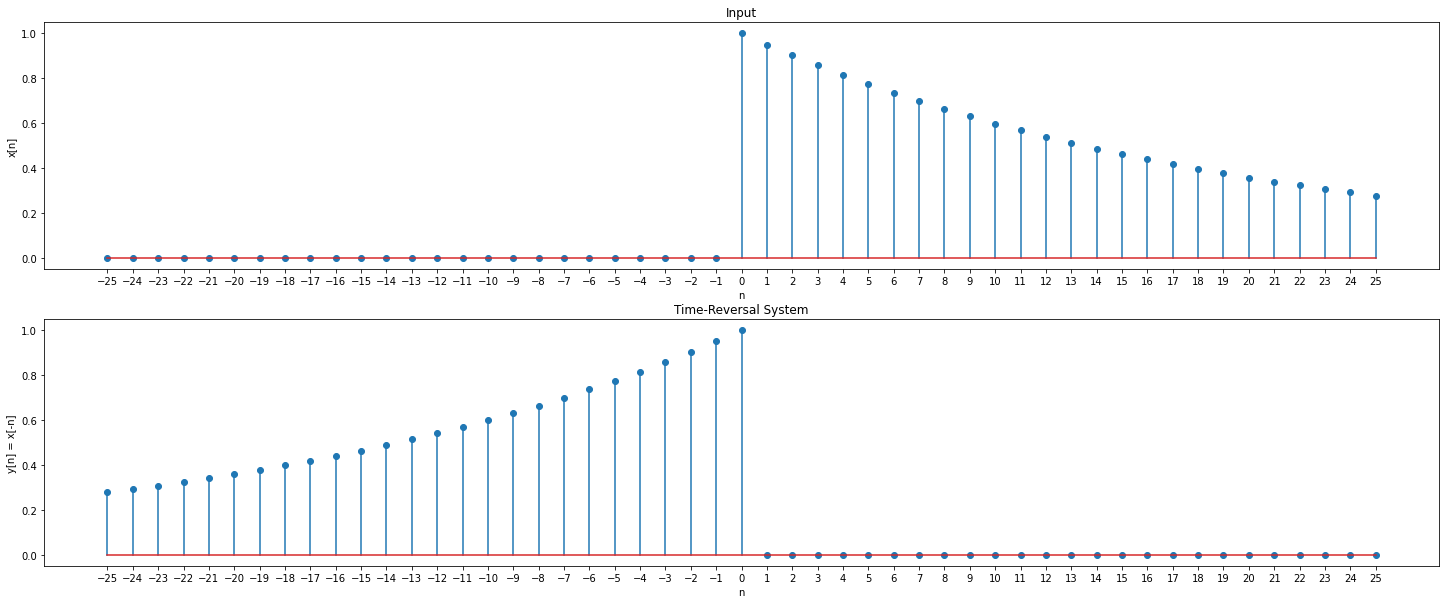

In [ ]:
###############################################
#(a)
################################################
def time_rev(x,n):
  y = np.zeros(len(x))
  for i in range(len(n)):
    if (n[i]==0):
      p=i
      break
  
  l = min(abs(n[0]),abs(n[len(x)-1]))
  for j in range(l+1):
    y[p+j]=x[p-j]
    y[p-j]=x[p+j]

  ny = -1*n[::-1]
  return y,ny

x,n = inputx(lim)
y,ny = time_rev(x,n)

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Input")
plt.xticks(ny)
plt.subplot(2,1,2)
plt.stem(ny,y)
plt.xlabel("n")
plt.ylabel("y[n] = x[-n]")
plt.title("Time-Reversal System")
plt.xticks(n)
plt.show()

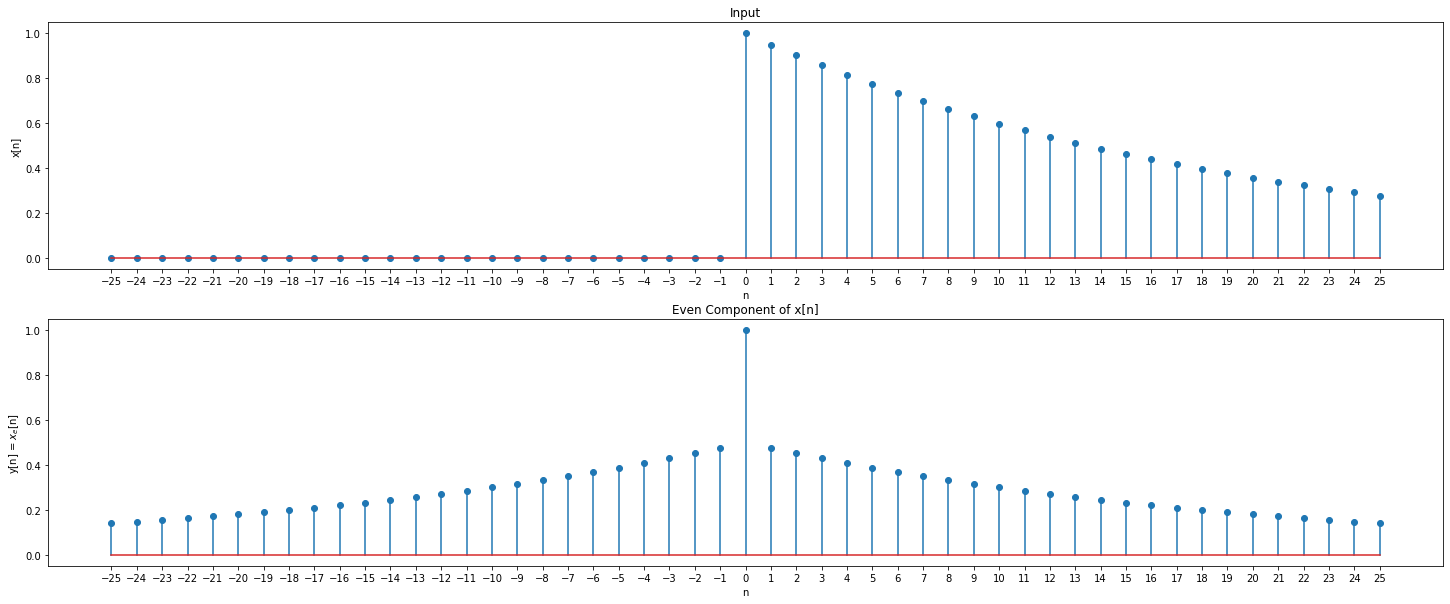

In [ ]:
###############################################
#(b)
################################################
def xeven(x,n):
  xrev,nrev = time_rev(x,n)

  y = np.zeros(len(x))
  for i in range(len(y)):
    y[i] = (x[i] + xrev[i])/2
  
  return np.array(y)

x,n = inputx(lim)
y = xeven(x,n)

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Input")
plt.xticks(n)
plt.subplot(2,1,2)
plt.stem(n,y)
plt.xlabel("n")
plt.ylabel("y[n] = $x_e$[n]")
plt.title("Even Component of x[n]")
plt.xticks(n)
plt.show()

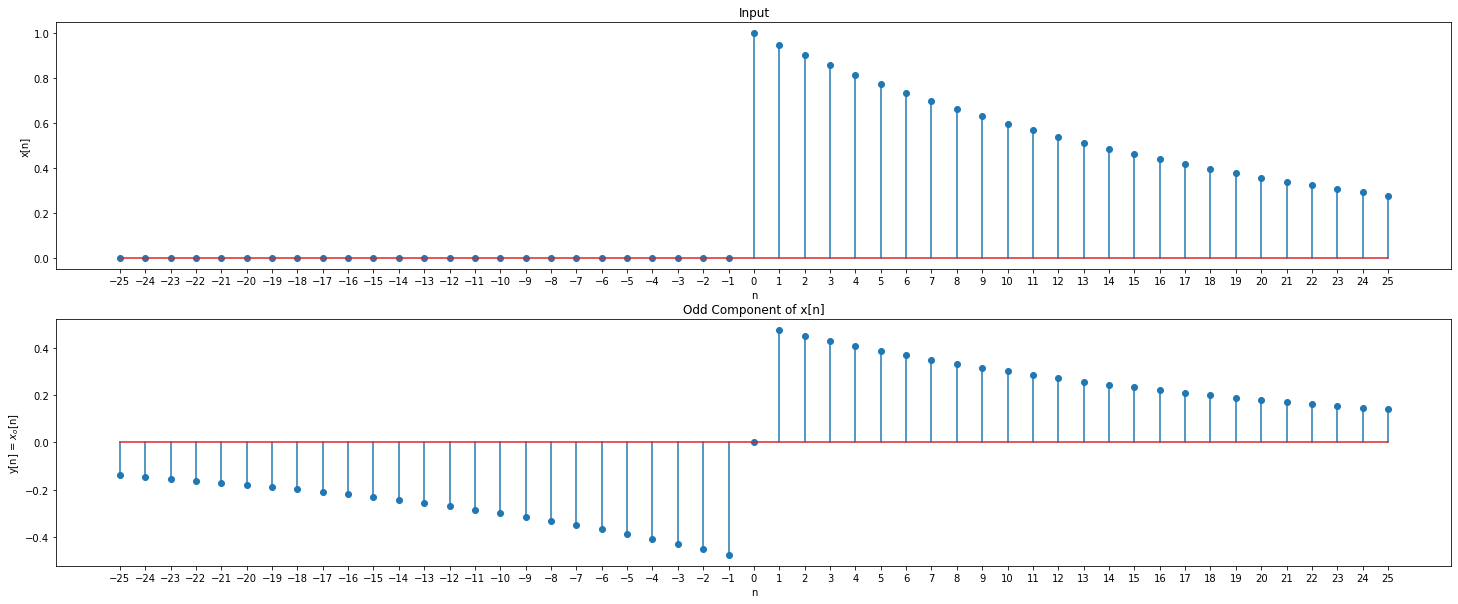

In [ ]:
###############################################
#(c) 
################################################
def xodd(x,n):
  xrev,nrev = time_rev(x,n)

  y = np.zeros(len(x))
  for i in range(len(y)):
    y[i] = (x[i] - xrev[i])/2
  
  return np.array(y)

x,n = inputx(lim)
y = xodd(x,n)

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Input")
plt.xticks(n)
plt.subplot(2,1,2)
plt.stem(n,y)
plt.xlabel("n")
plt.ylabel("y[n] = $x_o$[n]")
plt.title("Odd Component of x[n]")
plt.xticks(n)
plt.show()

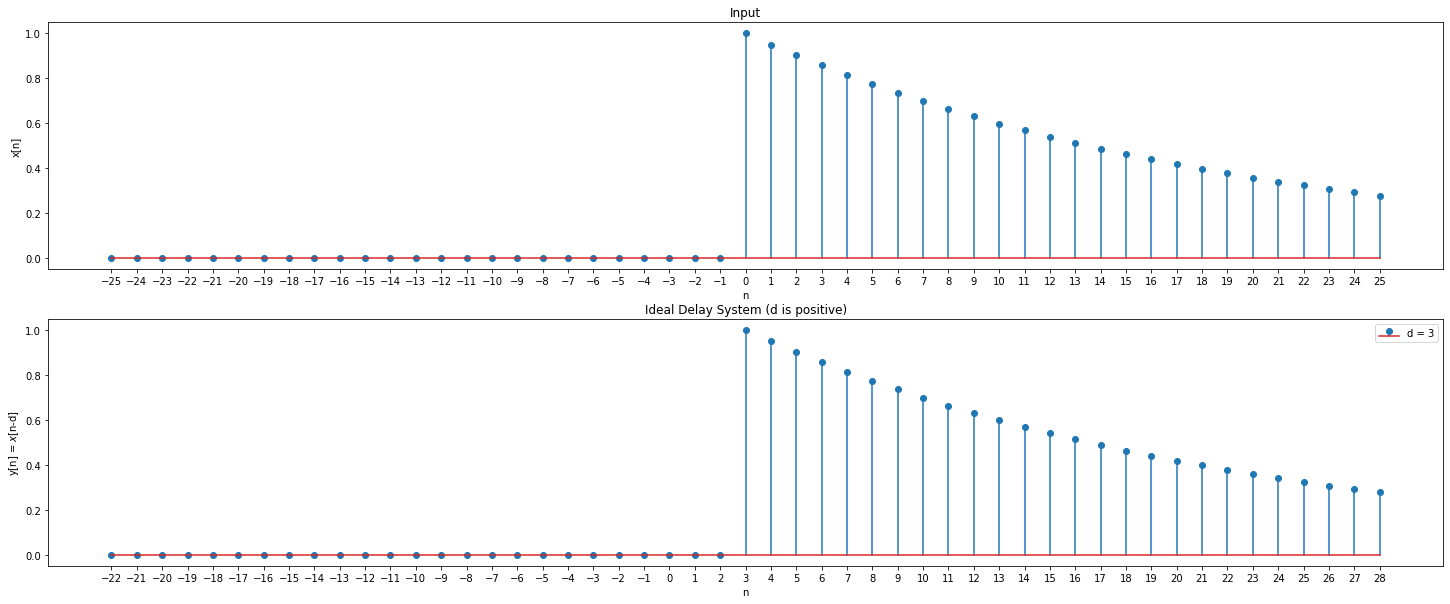

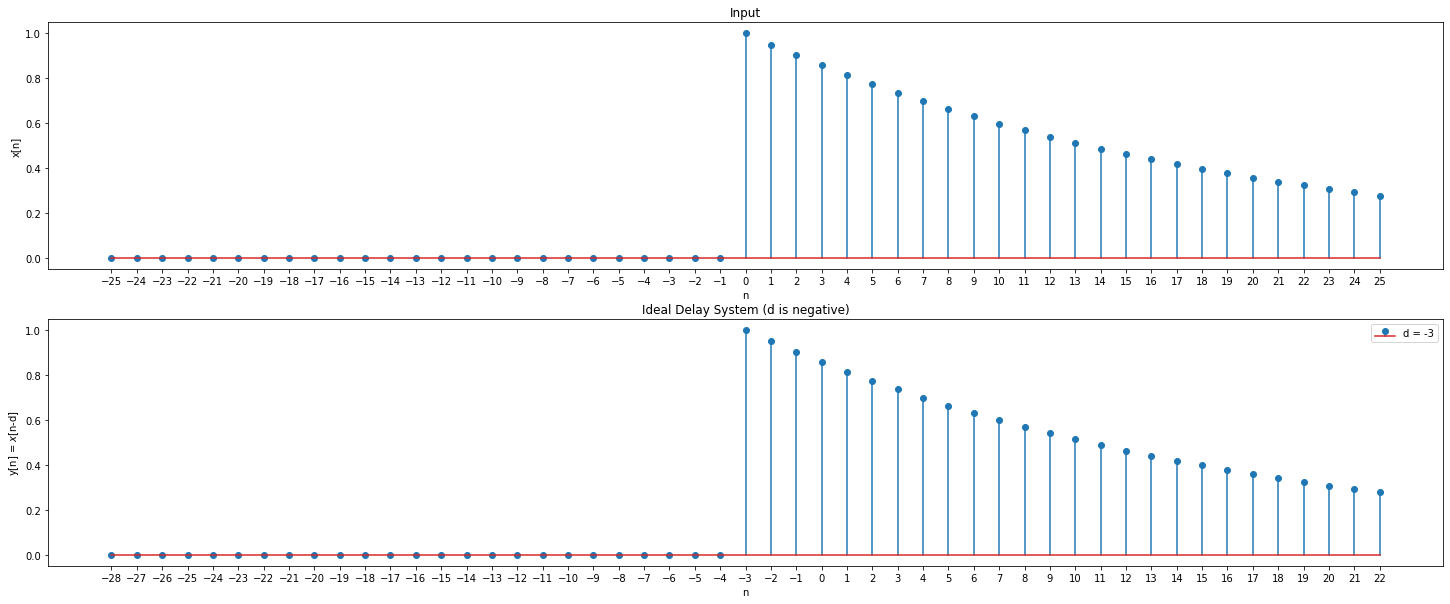

In [ ]:
###############################################
#(d) 
################################################
def ideal_delay(x,n,d):
  ny = range(n[0]+d,n[len(x)-1]+d+1)
  y=[]
  for i in range(len(ny)):
    y.append(x[i])
    
  return np.array(y),np.array(ny)

x,n = inputx(lim)
d=3
y,ny = ideal_delay(x,n,d)

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Input")
plt.xticks(n)
plt.subplot(2,1,2)
plt.stem(ny,y,label=f"d = {d}")
plt.xlabel("n")
plt.ylabel("y[n] = $x$[n-d]")
plt.title("Ideal Delay System (d is positive)")
plt.xticks(ny)
plt.legend()
plt.show()

print('\n')

d=-3
y,ny = ideal_delay(x,n,d)

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Input")
plt.xticks(n)
plt.subplot(2,1,2)
plt.stem(ny,y,label=f"d = {d}")
plt.xlabel("n")
plt.ylabel("y[n] = $x$[n-d]")
plt.title("Ideal Delay System (d is negative)")
plt.xticks(ny)
plt.legend()
plt.show()

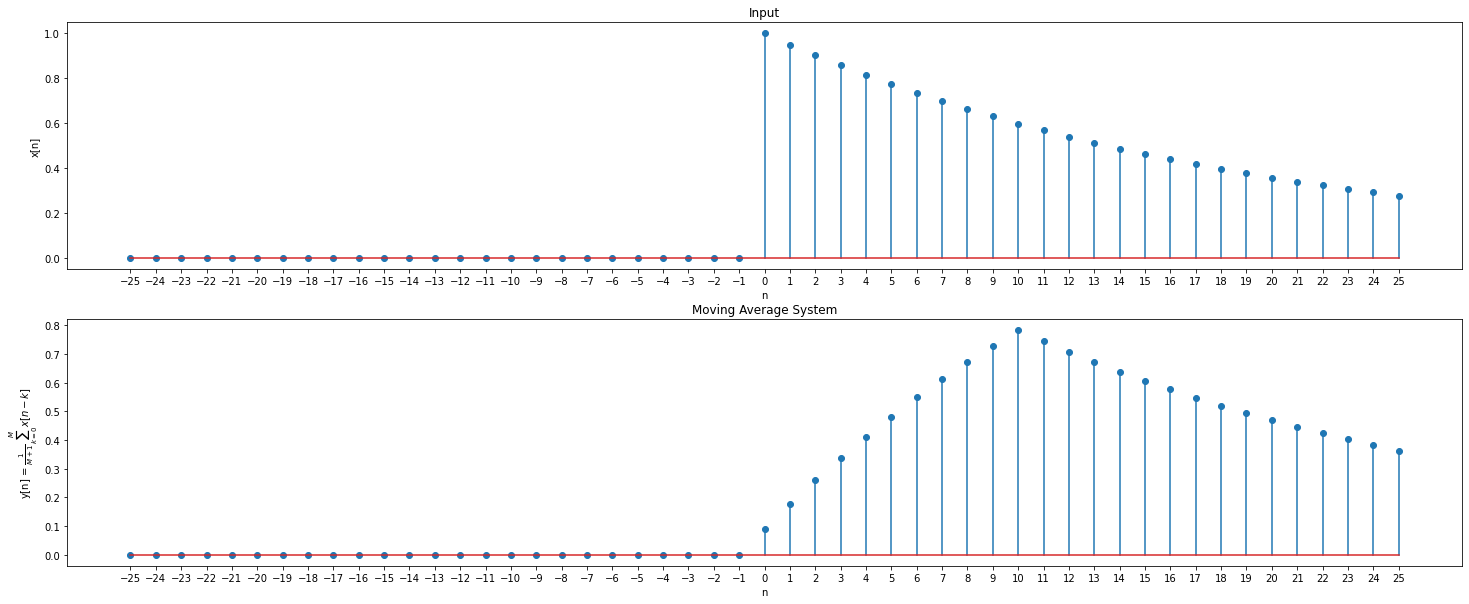

In [ ]:
###############################################
#(e) 
################################################
def moving_avg(x,n,M):
  y=[]
  for i in range(len(x)):
    sum = 0
    for k in range(0,M+1):
      if (i-k<0):
        break
      temp,n1 = ideal_delay(x,n,k)
      sum = sum + temp[i-k]
    y.append(1/(M+1)*sum)
  
  return np.array(y)

x,n = inputx(lim)
M=10
y = moving_avg(x,n,M)

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Input")
plt.xticks(n)
plt.subplot(2,1,2)
plt.stem(n,y)
plt.xlabel("n")
plt.ylabel(r"y[n] = $\frac{1}{M+1} \sum_{k=0}^M x[n-k]$")
plt.title("Moving Average System")
plt.xticks(n)
plt.show()

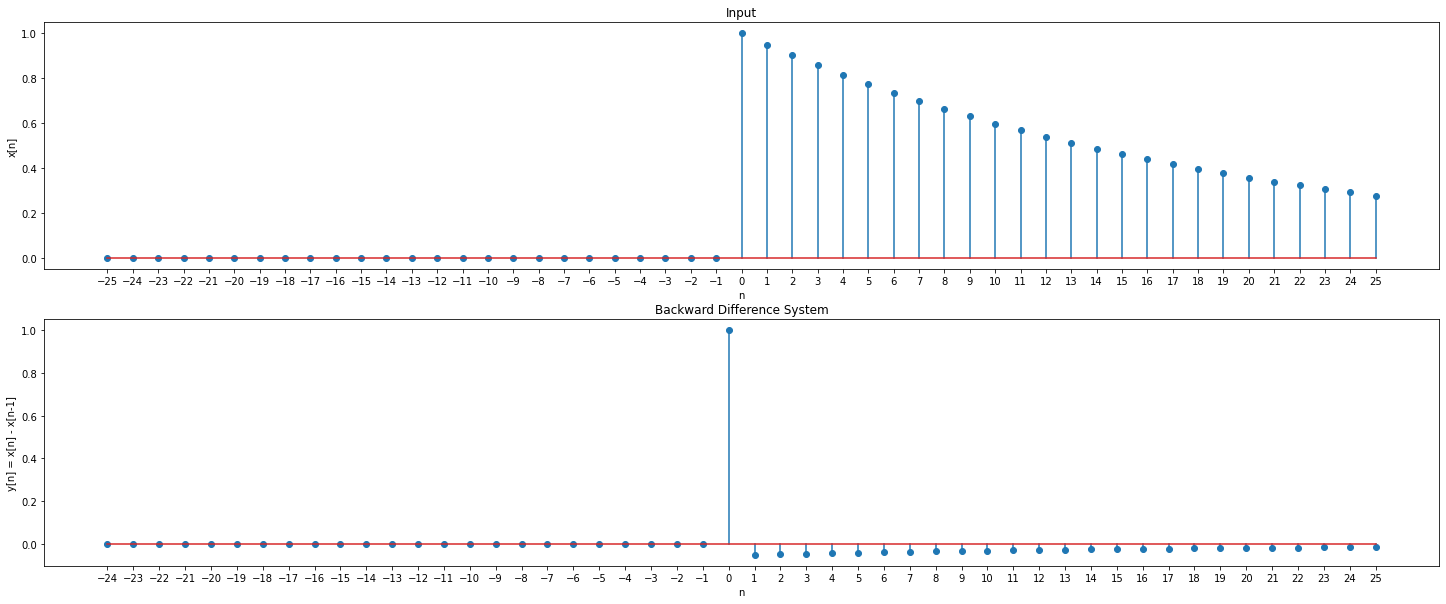

In [ ]:
###############################################
#(f) 
################################################
def back_diff(x,n):
  y = []
  for i in range(1,len(x)):
    y.append(x[i]-x[i-1])
  
  ny = range(n[0]+1,n[len(x)-1]+1)
  return np.array(y),np.array(ny)

x,n = inputx(lim)
y,ny = back_diff(x,n)

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Input")
plt.xticks(n)
plt.subplot(2,1,2)
plt.stem(ny,y)
plt.xlabel("n")
plt.ylabel("y[n] = x[n] - x[n-1]")
plt.title("Backward Difference System")
plt.xticks(ny)
plt.show()

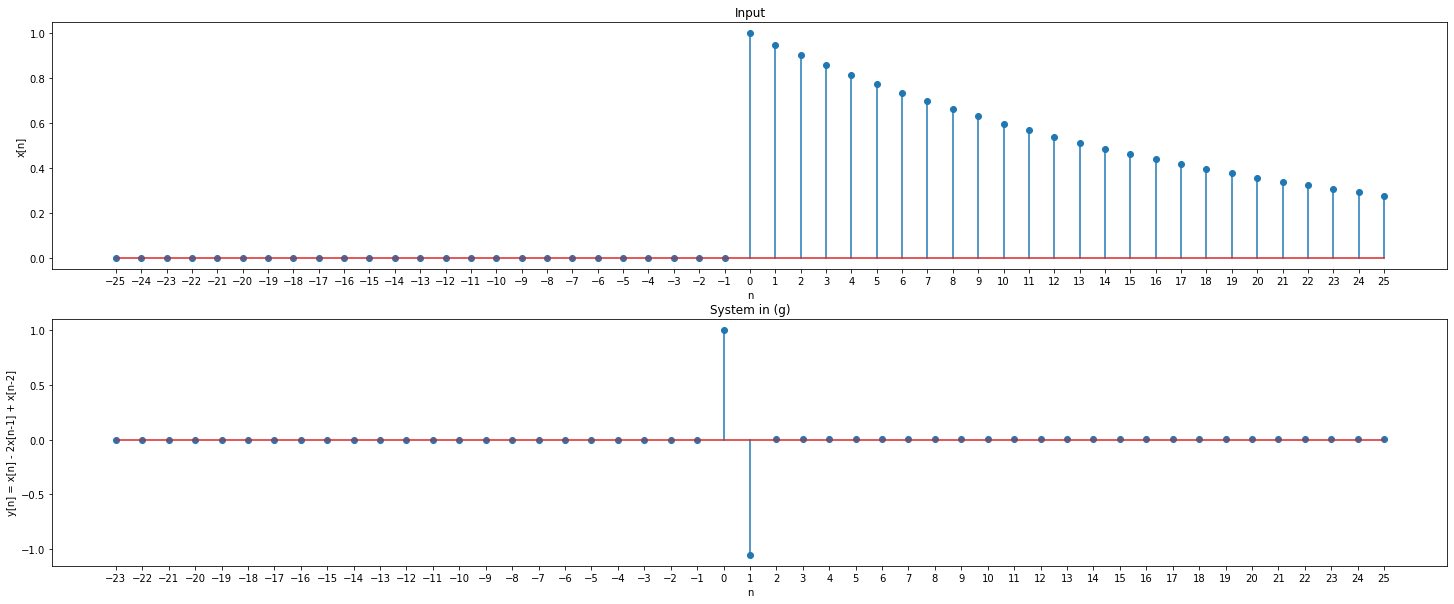

In [ ]:
###############################################
#(g) 
################################################
def system_g(x,n):
  y = []
  for i in range(2,len(x)):
    y.append(x[i]-2*x[i-1]+x[i-2])
  
  ny = range(n[0]+2,n[len(x)-1]+1)
  return np.array(y),np.array(ny)

x,n = inputx(lim)
y,ny = system_g(x,n)

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Input")
plt.xticks(n)
plt.subplot(2,1,2)
plt.stem(ny,y)
plt.xlabel("n")
plt.ylabel("y[n] = x[n] - 2x[n-1] + x[n-2]")
plt.title("System in (g)")
plt.xticks(ny)
plt.show()

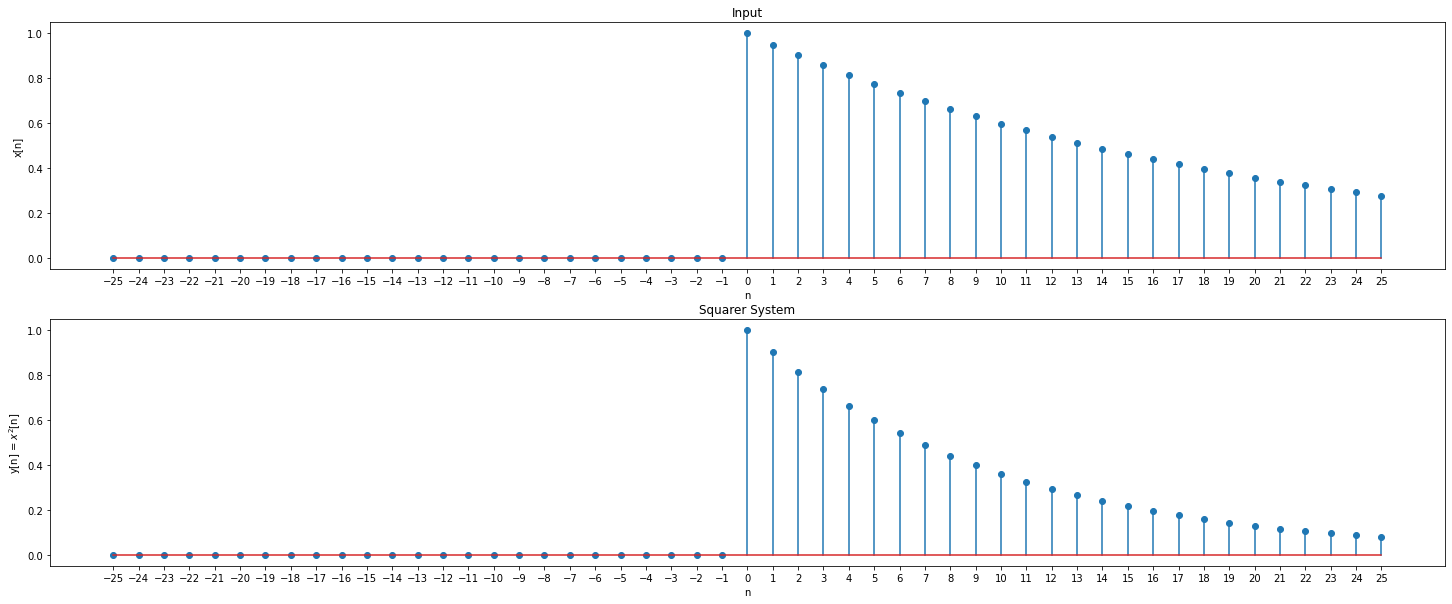

In [ ]:
###############################################
#(h) 
################################################
def squarer(x):
  y=[]
  for i in range(len(x)):
    y.append(x[i]*x[i])
  
  return np.array(y)

x,n = inputx(lim)
y = squarer(x)

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Input")
plt.xticks(n)
plt.subplot(2,1,2)
plt.stem(n,y)
plt.xlabel("n")
plt.ylabel("y[n] = $x^2$[n]")
plt.title("Squarer System")
plt.xticks(n)
plt.show()

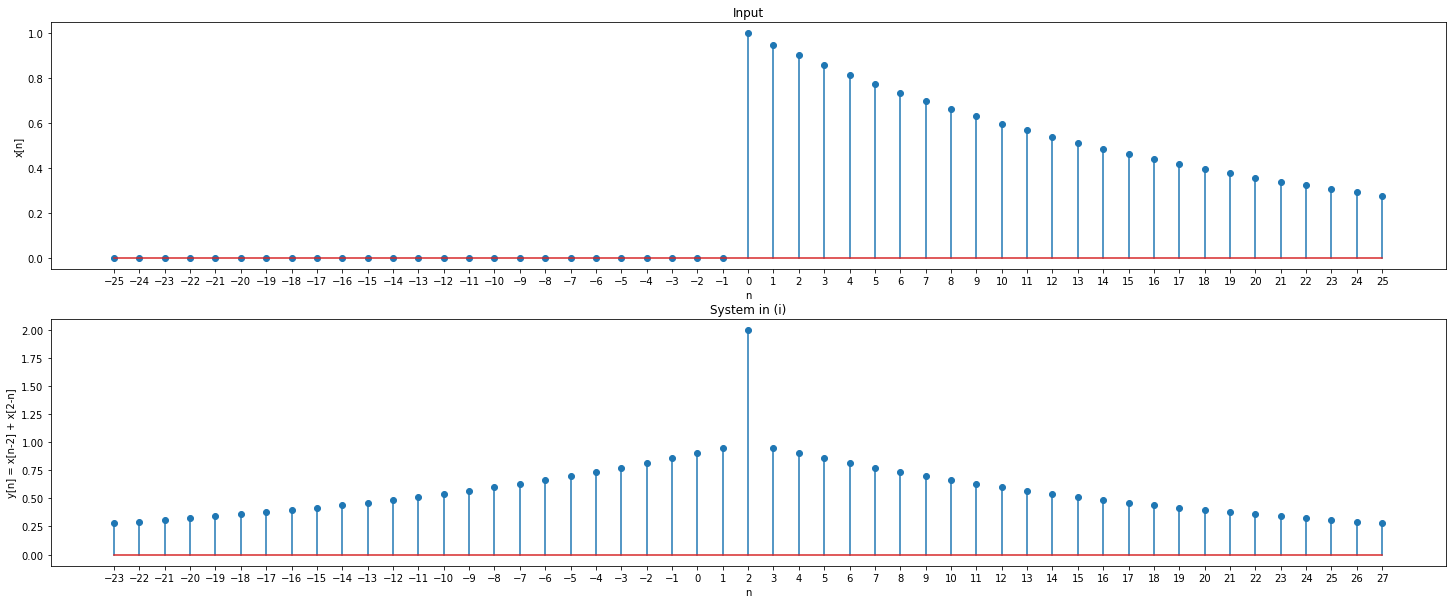

In [ ]:
###############################################
#(i) 
################################################
def system_i(x,n):
  x1,n1 = ideal_delay(x,n,2)
  xrev,nrev = time_rev(x,n)
  x2,n2 = ideal_delay(xrev,n,-2)
  y = []
  for i in range(len(n1)):
    y.append(x1[i]+x2[i])
  
  return np.array(y),np.array(n1)

x,n = inputx(lim)
y,ny = system_i(x,n)

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Input")
plt.xticks(n)
plt.subplot(2,1,2)
plt.stem(ny,y)
plt.xlabel("n")
plt.ylabel("y[n] = x[n-2] + x[2-n]")
plt.title("System in (i)")
plt.xticks(ny)
plt.show()

<h4> <b> Report your observations : </b>  

<dt> <h4> i. The time-reversal system in (a), y[n] = x[-n] flips the signal about the line at n=0.</h4> </dt>


<dt> <h4> ii. The moving average system in (e) takes the average of the past M+1 samples. It behaves like a Low Pass Filter. On drawing its frequency response, we can see that frequencies around odd multiples of $\pi$ are attenuated. This system is used to smooth audio signals and blur images as seen in Question 4. </h4> </dt>


<dt> <h4> iii. The Backward Difference System in (f) gives the change points in a signal. It behaves like a High Pass Filter. On drawing its frequency response, we can see that frequencies around even multiples of $\pi$ including 0 are attenuated and the frequencies around odd multiples of $\pi$ are scaled by 2. It gives the line sketch when implemented on images and gives sharp changes in the audio when implemented on audio signals.</h4> </dt>


<dt> <h4> iv. The signals in the above output are constrained in the range (-lim,lim) (here, -25 to 25) and are not infinite signals for the ease of representations and performing operations. Hence, on doing certain operations, errors creep in at the boundary limits which is more clearly observable in the further questions.</h4> </dt>



# Question 2

<h4> <b> Part (2) : Linear Time-Invariant Systems : </b> 
<h4> <b> Objective : </b>  

<dt> <h4> Linear time-invariant (LTI) systems form an important subset of general systems. Sophisticated mathematical tools are available to analyze the LTI systems. For example, convolution can be used to determine the output of an LTI system to an arbitrary input. In order to make use of the available mathematical tools, we need to determine whether a given system satisfies the
properties of linearity and time-invariance or not. The objective of this experiment is to verify the linearity and time-invariance properties of a given LTI system using a digital system. </h4> </dt>

<h4> <b> Programming Questions : </b>  

<dt> <h4> a. Generate the following test signals for −100 ≤ n ≤ 100.</h4> </dt>
<dt> <h4> <center> $x_{1}[n] = 0.9^{n}u[n]$ </center> </dt></h4>
<dt> <h4> <center> $x_{2}[n] = sin(2\pi \frac{200}{800} n)$ </center> </dt></h4>


<dt> <h4> b. <b> Linearity </b>: Apply $x_1[n]$, and $x_2[n]$ as inputs to the system and generate the outputs $y_1[n]$ and $y_2[n]$, respectively. Now apply $ax_1[n] + bx_2[n]$ as input to the system to generate the output y[n]. To verify linearity check whether y[n] is equal to $ay_1[n]+by_2[n]$ or not. Check
for linearity of all the systems simulated in part (a).   </h4> </dt>

<dt> <h4> c. <b> Time-Invariance </b>: Apply $x_1[n]$ as input to the system and generate the output $y_1[n]$. Now apply $x_1[n − d]$ as input and generate the output y[n]. To verify time-invariance property check whether y[n] is equal to $y_1[n − d]$ or not. Repeat verification for $x_2[n]$. Check for time-invariance of all the systems simulated in part (a).</h4> </dt>






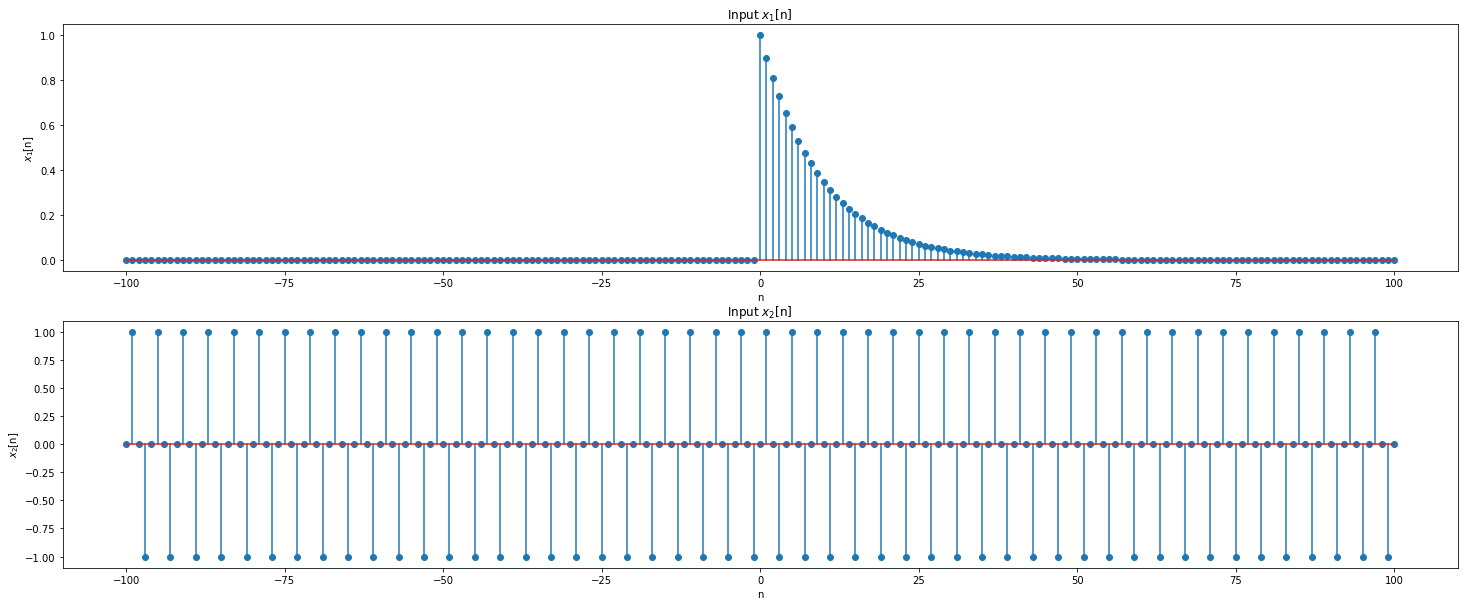

In [ ]:
################################################
#(a) 
################################################
lim = 100

def inputx1(lim):
  n = range(-lim,lim+1)
  x=[]
  for i in range(len(n)):
    if (n[i]>=0):
      x.append(0.9**n[i])
    else:
      x.append(0)

  return np.array(x),np.array(n)

def inputx2(lim):
  n = range(-lim,lim+1)
  x=[]
  for i in range(len(n)):
      x.append(np.sin(2*np.pi*200/800*n[i]))

  return np.array(x),np.array(n)

x1,n1 = inputx1(lim)
x2,n2 = inputx2(lim)

plt.figure(figsize=(25,10))
plt.subplot(2,1,1)
plt.stem(n1,x1)
plt.xlabel("n")
plt.ylabel("$x_1$[n]")
plt.title("Input $x_1$[n]")
plt.subplot(2,1,2)
plt.stem(n2,x2)
plt.xlabel("n")
plt.ylabel("$x_2$[n]")
plt.title("Input $x_2$[n]")
plt.show()

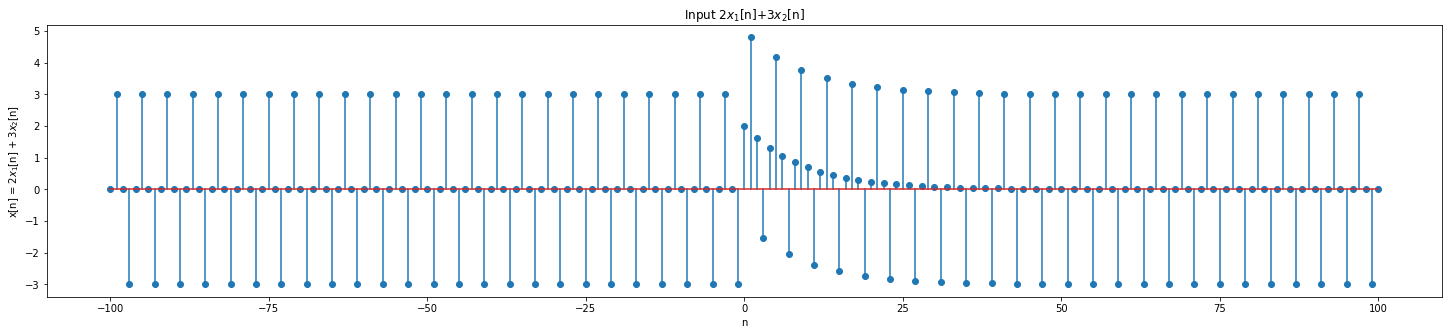


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

a) Time-Reversal System:-



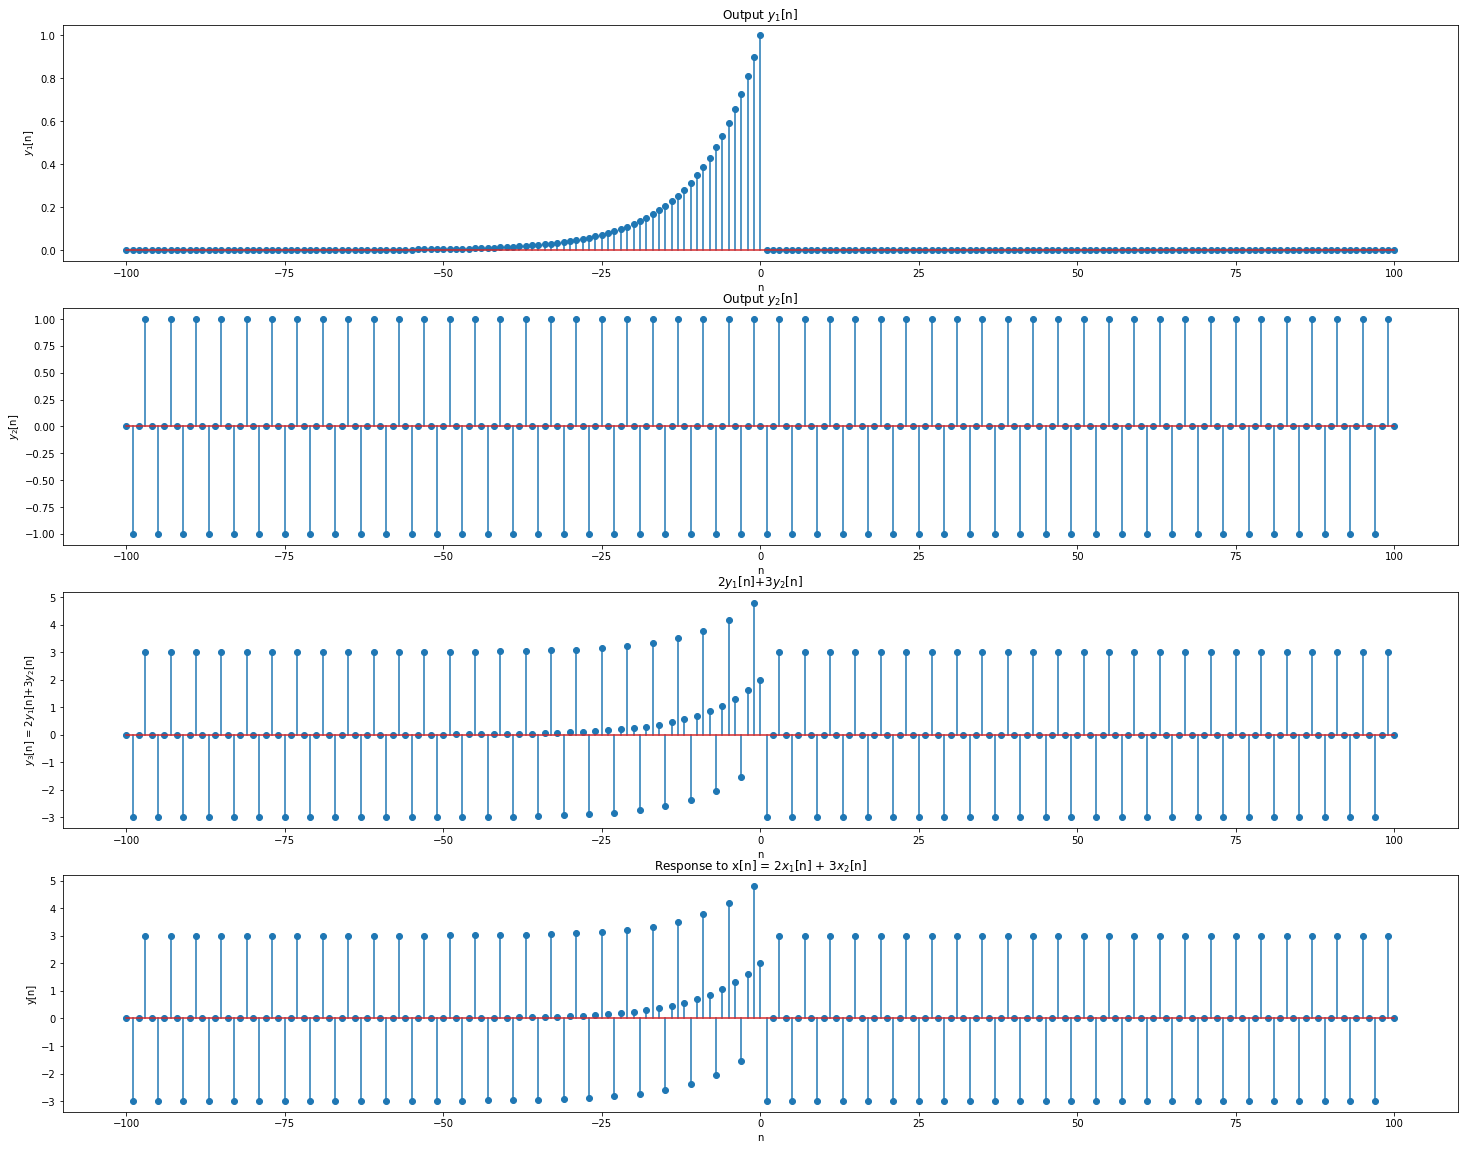


 The system in (a) is a  LINEAR System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

b) Even Component System:-



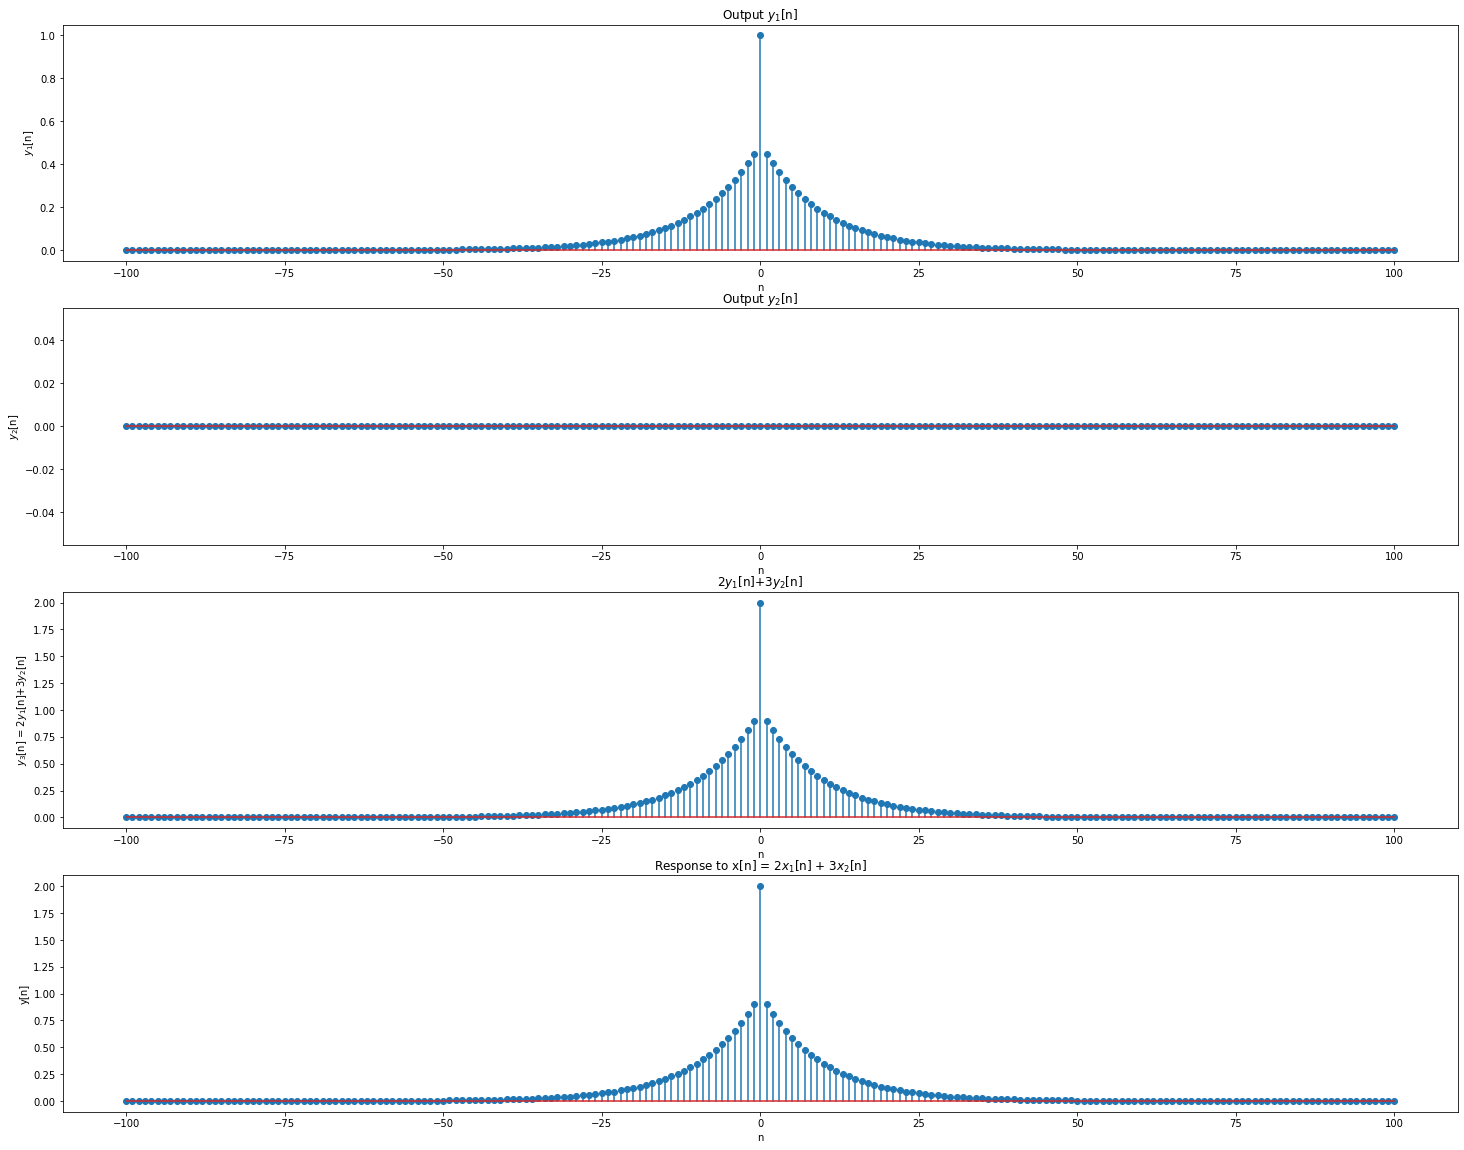


 The system in (b) is a  LINEAR System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

c) Odd Component System:-



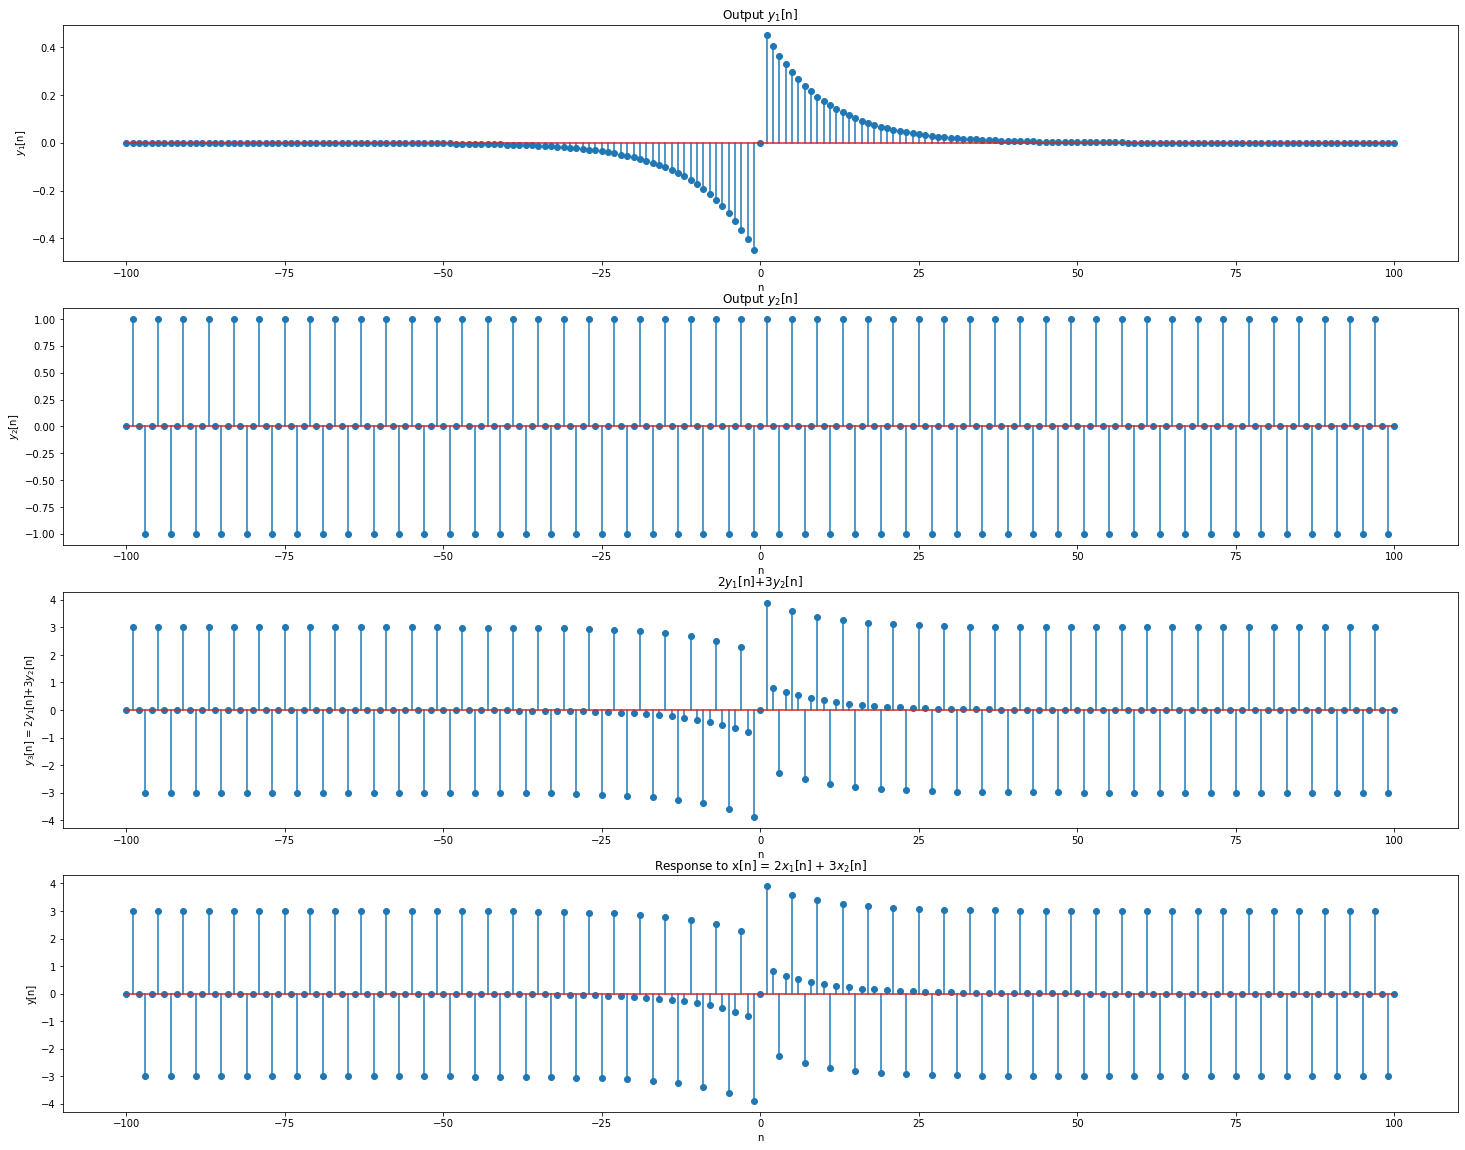


 The system in (c) is a  LINEAR System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

d) Ideal Delay System:-



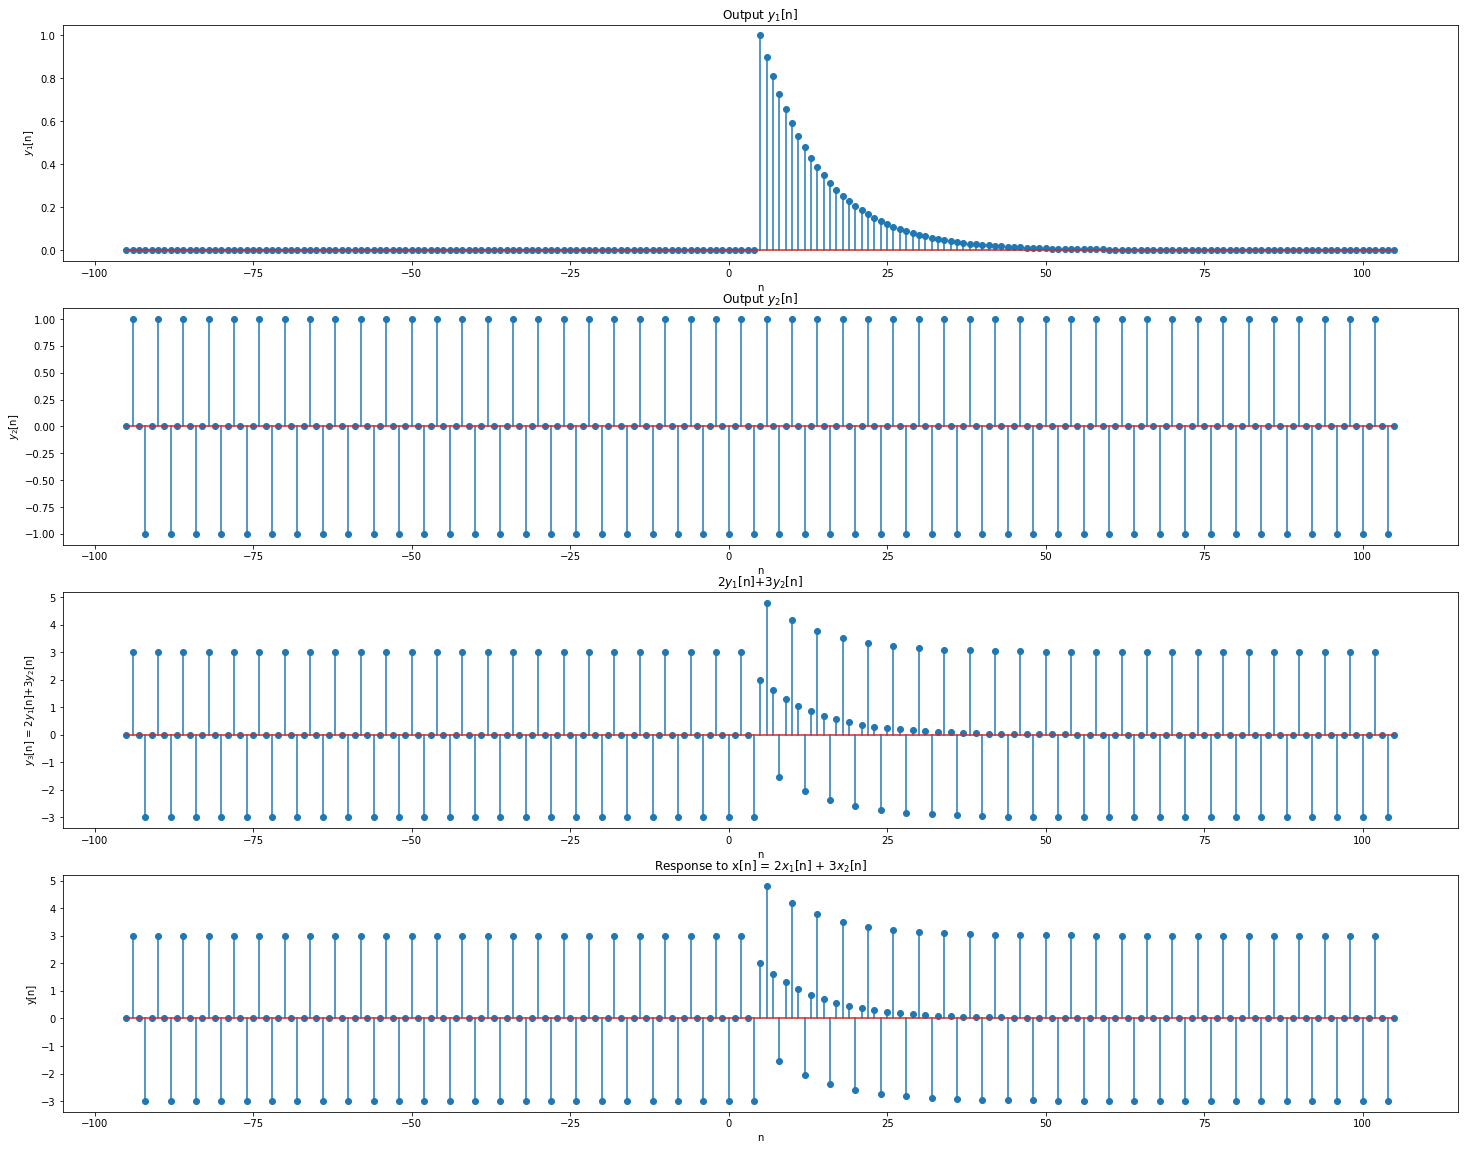


 The system in (d) is a  LINEAR System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

e) Moving Average System:-



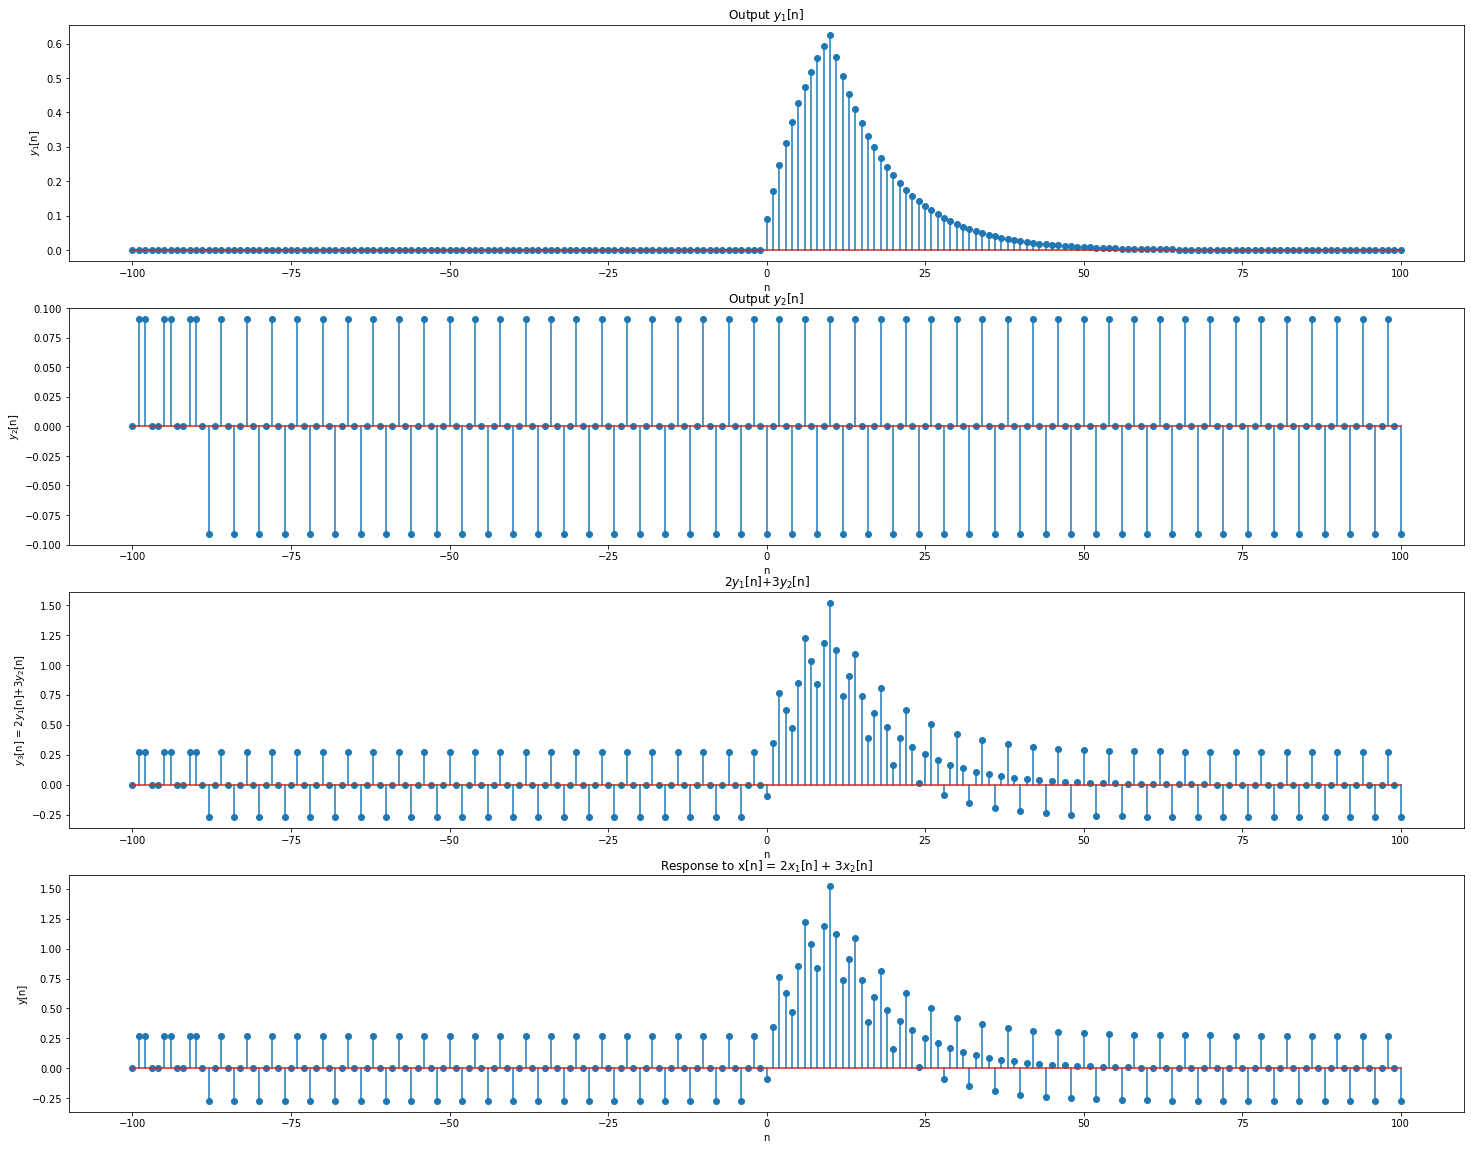


 The system in (e) is a  LINEAR System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

f) Back Difference System:-



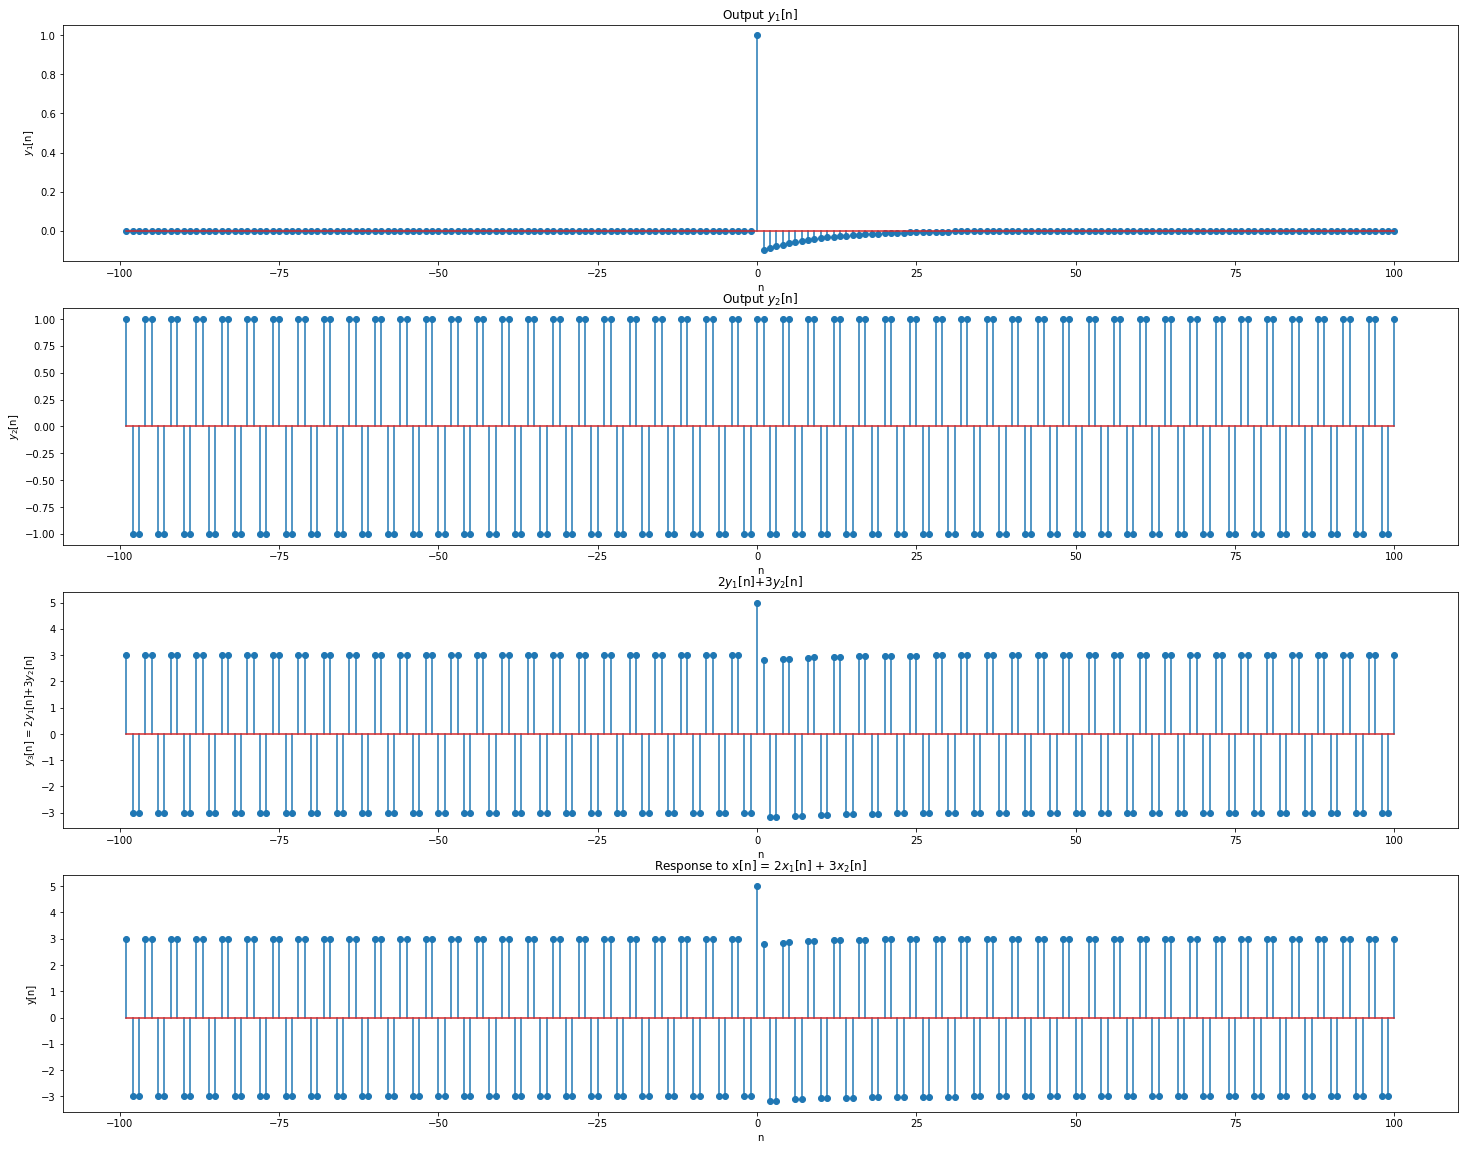


 The system in (f) is a  LINEAR System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

g) System where y[n] = x[n] - 2x[n-1] + x[n-2]:-



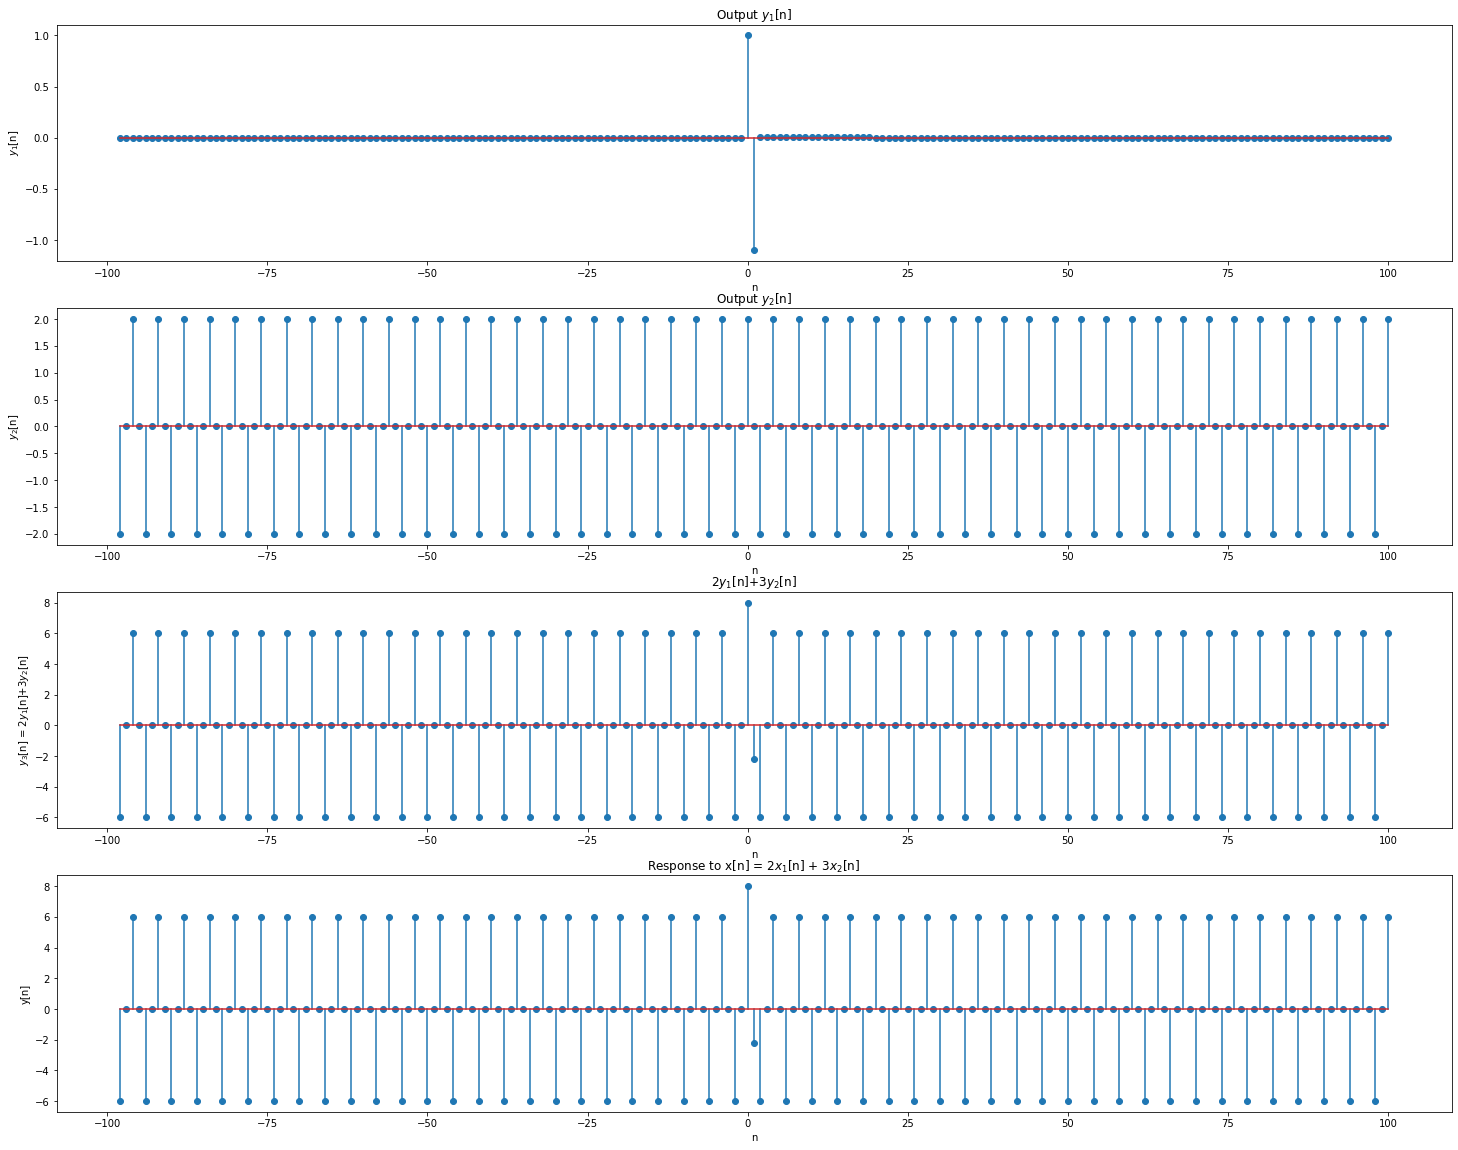


 The system in (g) is a  LINEAR System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

h) Squarer System:-



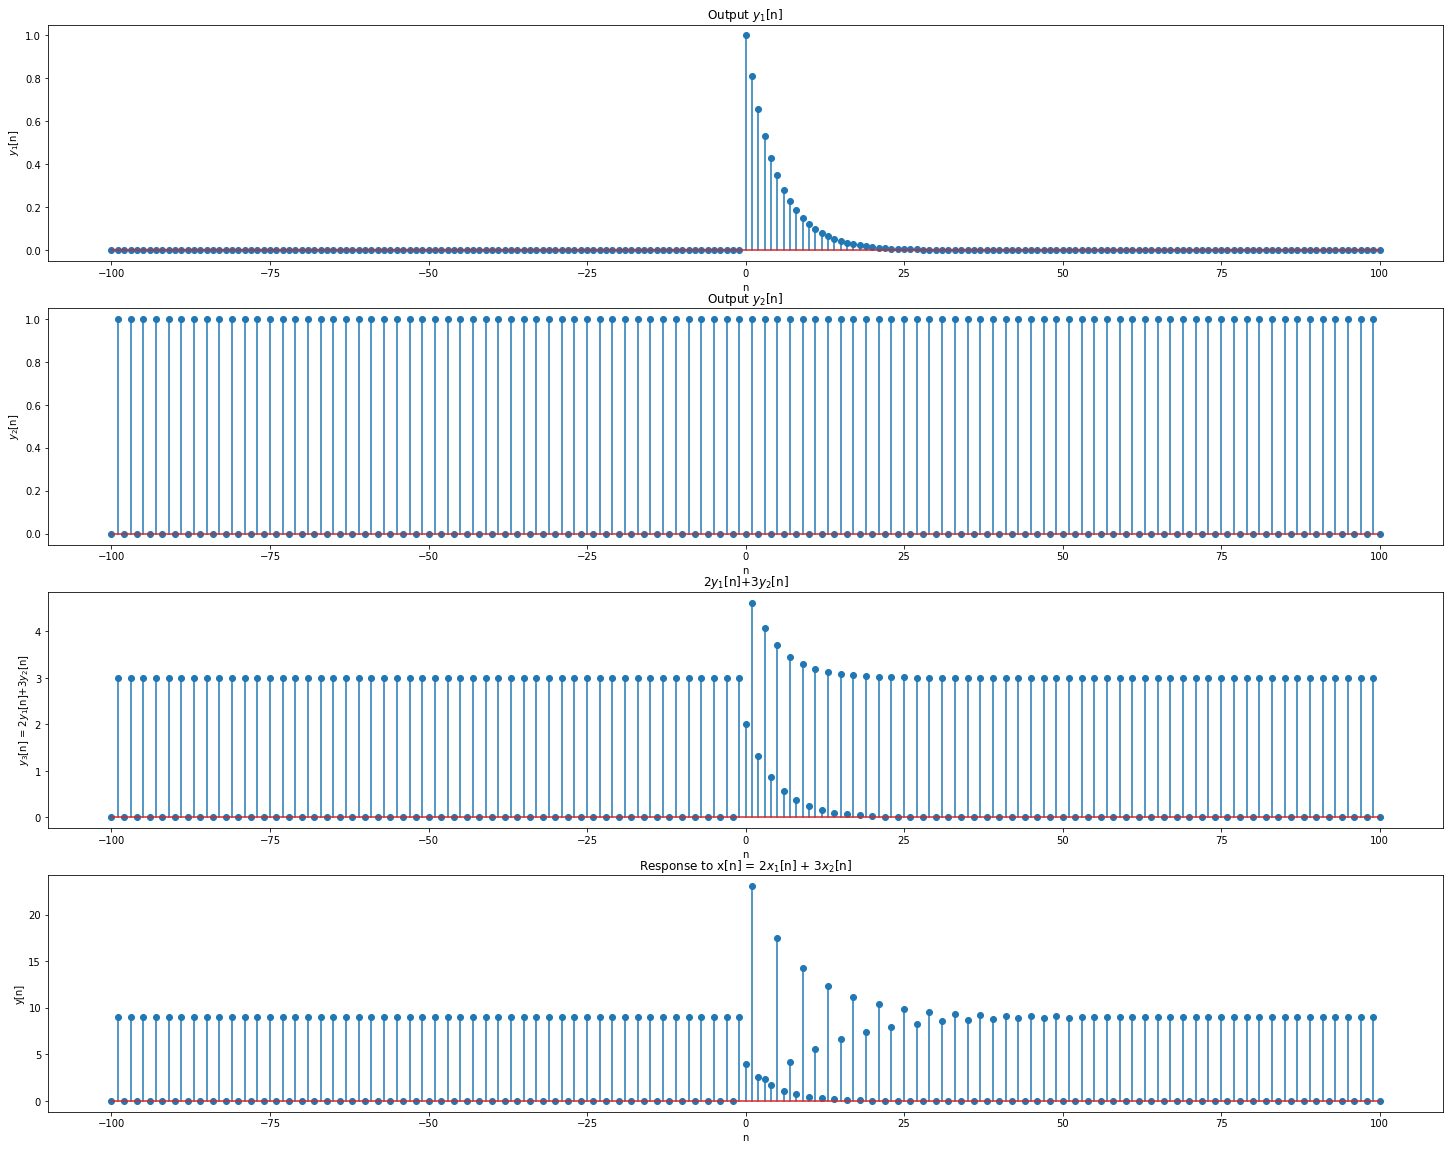


 The system in (h) is a  NON-LINEAR System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

i) System where y[n] = x[n-2] + x[2-n]:-



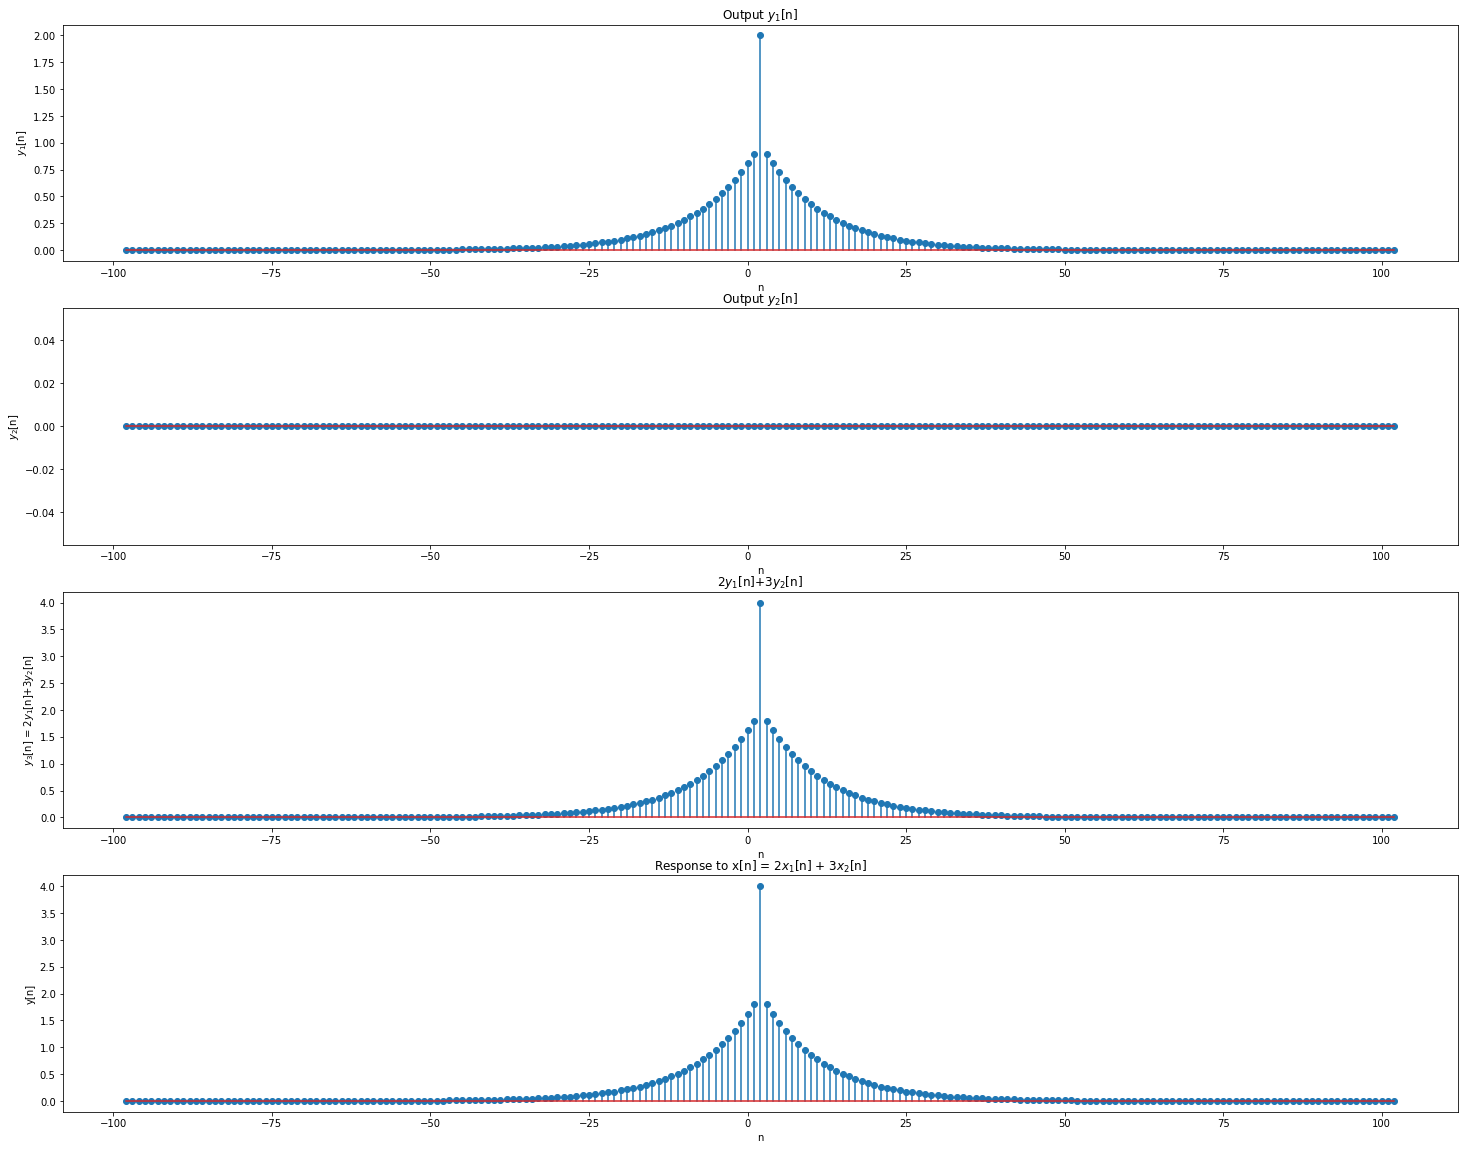


 The system in (i) is a  LINEAR System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



In [ ]:
################################################
#(b) 
################################################
def check_linear(y3,y):
  for i in range(len(y)):
    if (round(y3[i],3)!=round(y[i],3)):
      return("NON-LINEAR System")

  return("LINEAR System")

a,b=2,3 #Taking a=2 and b=3
x,n = a*x1 + b*x2,n1
plt.figure(figsize=(25,5))
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n] = 2$x_1$[n] + 3$x_2$[n]")
plt.title("Input 2$x_1$[n]+3$x_2$[n]")
plt.show()

print("\n"+("x"*200)+"\n")
##################################################################
print("a) Time-Reversal System:-\n")

x1,n1 = inputx1(lim)
x2,n2 = inputx2(lim)
x,n = a*x1 + b*x2,n1

y1,n1y = time_rev(x1,n1)
y2,n2y = time_rev(x2,n2)
y3,n3y = a*y1 + b*y2,n1y
y,ny = time_rev(x,n)

def plot_y(y1,n1y,y2,n2y,y3,n3y,y,ny):
  plt.figure(figsize=(25,20))
  plt.subplot(4,1,1)
  plt.stem(n1y,y1)
  plt.xlabel("n")
  plt.ylabel("$y_1$[n]")
  plt.title("Output $y_1$[n]")
  plt.subplot(4,1,2)
  plt.stem(n2y,y2)
  plt.xlabel("n")
  plt.ylabel("$y_2$[n]")
  plt.title("Output $y_2$[n]")
  plt.subplot(4,1,3)
  plt.stem(n3y,y3)
  plt.xlabel("n")
  plt.ylabel("$y_3$[n] = 2$y_1$[n]+3$y_2$[n]")
  plt.title("2$y_1$[n]+3$y_2$[n]")
  plt.subplot(4,1,4)
  plt.stem(ny,y)
  plt.xlabel("n")
  plt.ylabel("y[n]")
  plt.title("Response to x[n] = 2$x_1$[n] + 3$x_2$[n]")
  plt.show()

plot_y(y1,n1y,y2,n2y,y3,n3y,y,ny)

print("\n The system in (a) is a ",check_linear(y3,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("b) Even Component System:-\n")

x1,n1 = inputx1(lim)
x2,n2 = inputx2(lim)
x,n = a*x1 + b*x2,n1

y1 = xeven(x1,n1)
y2 = xeven(x2,n2)
y3 = a*y1 + b*y2
y = xeven(x,n)

plot_y(y1,n1,y2,n1,y3,n1,y,n1)

print("\n The system in (b) is a ",check_linear(y3,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("c) Odd Component System:-\n")

x1,n1 = inputx1(lim)
x2,n2 = inputx2(lim)
x,n = a*x1 + b*x2,n1

y1 = xodd(x1,n1)
y2 = xodd(x2,n2)
y3 = a*y1 + b*y2
y = xodd(x,n)

plot_y(y1,n1,y2,n1,y3,n1,y,n1)

print("\n The system in (c) is a ",check_linear(y3,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("d) Ideal Delay System:-\n")

x1,n1 = inputx1(lim)
x2,n2 = inputx2(lim)
x,n = a*x1 + b*x2,n1

d=5 #Taking delay d=5
y1,n1y = ideal_delay(x1,n1,d)
y2,n2y = ideal_delay(x2,n2,d)
y3,n3y = a*y1 + b*y2,n1y
y,ny = ideal_delay(x,n,d)

plot_y(y1,n1y,y2,n2y,y3,n3y,y,ny)

print("\n The system in (d) is a ",check_linear(y3,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("e) Moving Average System:-\n")

x1,n1 = inputx1(lim)
x2,n2 = inputx2(lim)
x,n = a*x1 + b*x2,n1

M=10 #Taking M=10 for Moving Average system
y1 = moving_avg(x1,n1,M)
y2 = moving_avg(x2,n2,M)
y3 = a*y1 + b*y2
y = moving_avg(x,n,M)

plot_y(y1,n1,y2,n1,y3,n1,y,n1)

print("\n The system in (e) is a ",check_linear(y3,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("f) Back Difference System:-\n")

x1,n1 = inputx1(lim)
x2,n2 = inputx2(lim)
x,n = a*x1 + b*x2,n1

y1,n1y = back_diff(x1,n1)
y2,n2y = back_diff(x2,n2)
y3,n3y = a*y1 + b*y2,n1y
y,ny = back_diff(x,n)

plot_y(y1,n1y,y2,n2y,y3,n3y,y,ny)

print("\n The system in (f) is a ",check_linear(y3,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("g) System where y[n] = x[n] - 2x[n-1] + x[n-2]:-\n")

x1,n1 = inputx1(lim)
x2,n2 = inputx2(lim)
x,n = a*x1 + b*x2,n1

y1,n1y = system_g(x1,n1)
y2,n2y = system_g(x2,n2)
y3,n3y = a*y1 + b*y2,n1y
y,ny = system_g(x,n)

plot_y(y1,n1y,y2,n2y,y3,n3y,y,ny)

print("\n The system in (g) is a ",check_linear(y3,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("h) Squarer System:-\n")

x1,n1 = inputx1(lim)
x2,n2 = inputx2(lim)
x,n = a*x1 + b*x2,n1

y1 = squarer(x1)
y2 = squarer(x2)
y3 = a*y1 + b*y2
y = squarer(x)

plot_y(y1,n1,y2,n1,y3,n1,y,n1)

print("\n The system in (h) is a ",check_linear(y3,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("i) System where y[n] = x[n-2] + x[2-n]:-\n")

x1,n1 = inputx1(lim)
x2,n2 = inputx2(lim)
x,n = a*x1 + b*x2,n1

y1,n1y = system_i(x1,n1)
y2,n2y = system_i(x2,n2)
y3,n3y = a*y1 + b*y2,n1y
y,ny = system_i(x,n)

plot_y(y1,n1y,y2,n2y,y3,n3y,y,ny)

print("\n The system in (i) is a ",check_linear(y3,y))

print("\n"+("x"*200)+"\n")
##################################################################

FOR INPUT SIGNAL $X_1$ :-


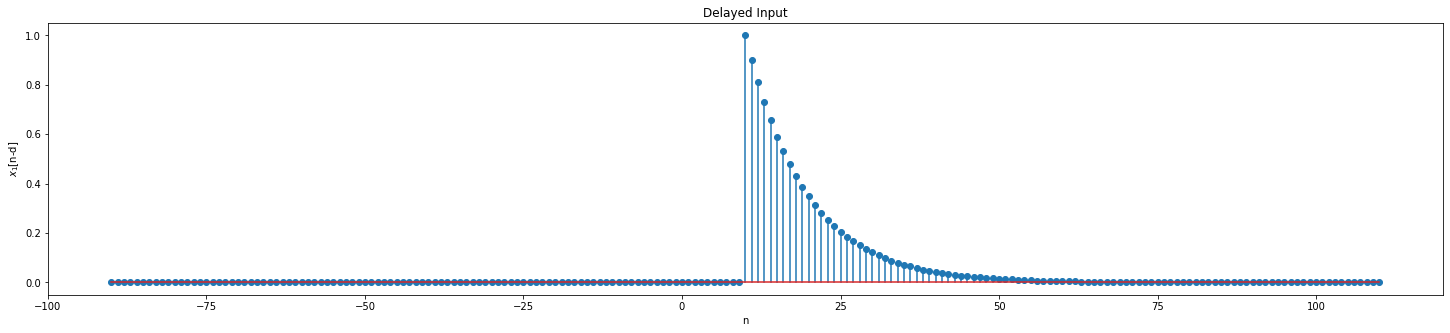


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

a) Time-Reversal System:-



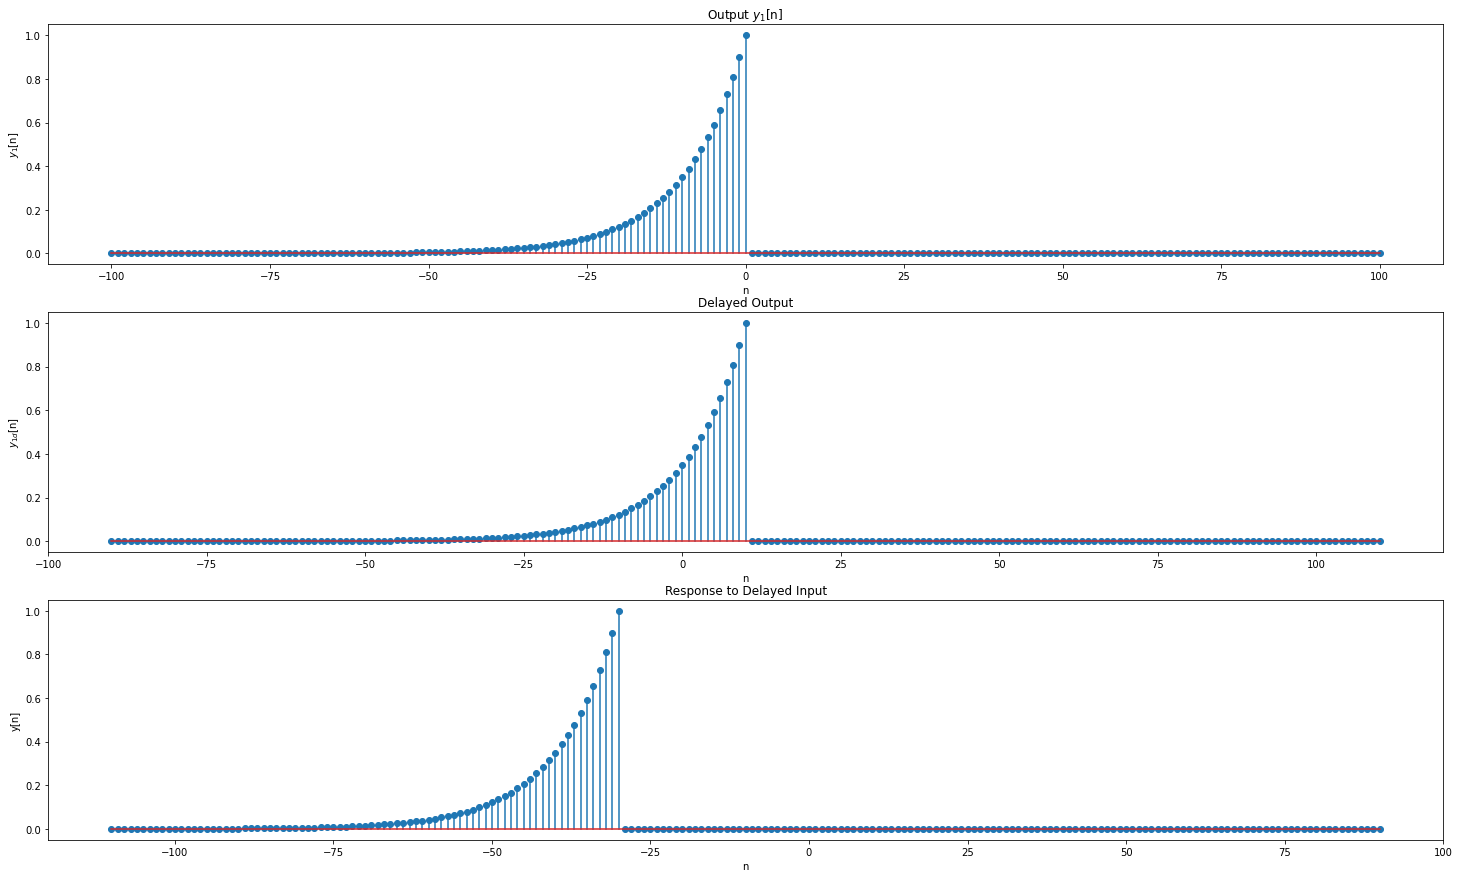


 The system in (a) is a  TIME-VARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

b) Even Component System:-



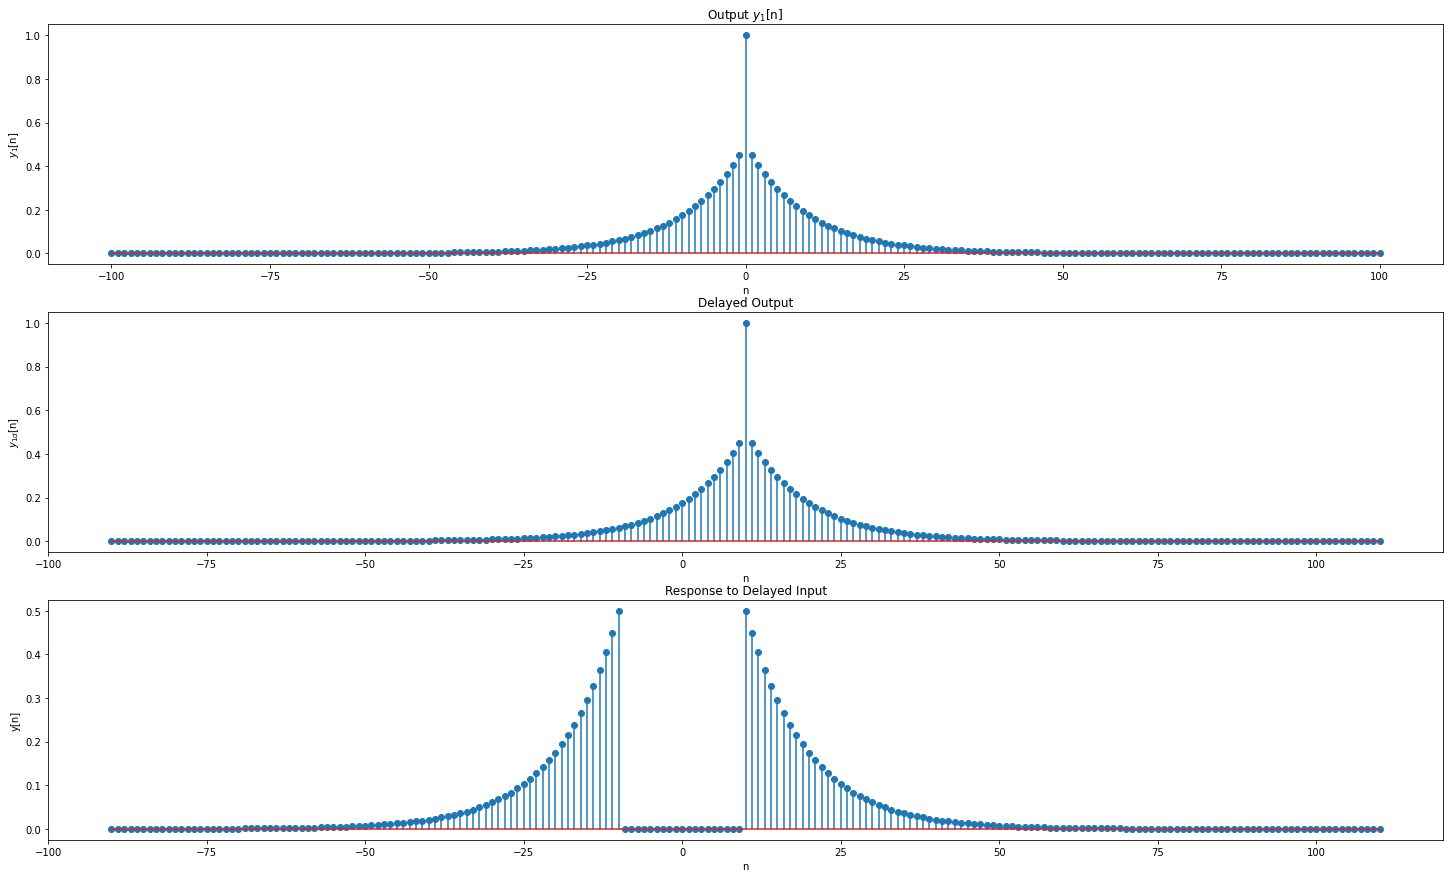


 The system in (b) is a  TIME-VARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

c) Odd Component System:-



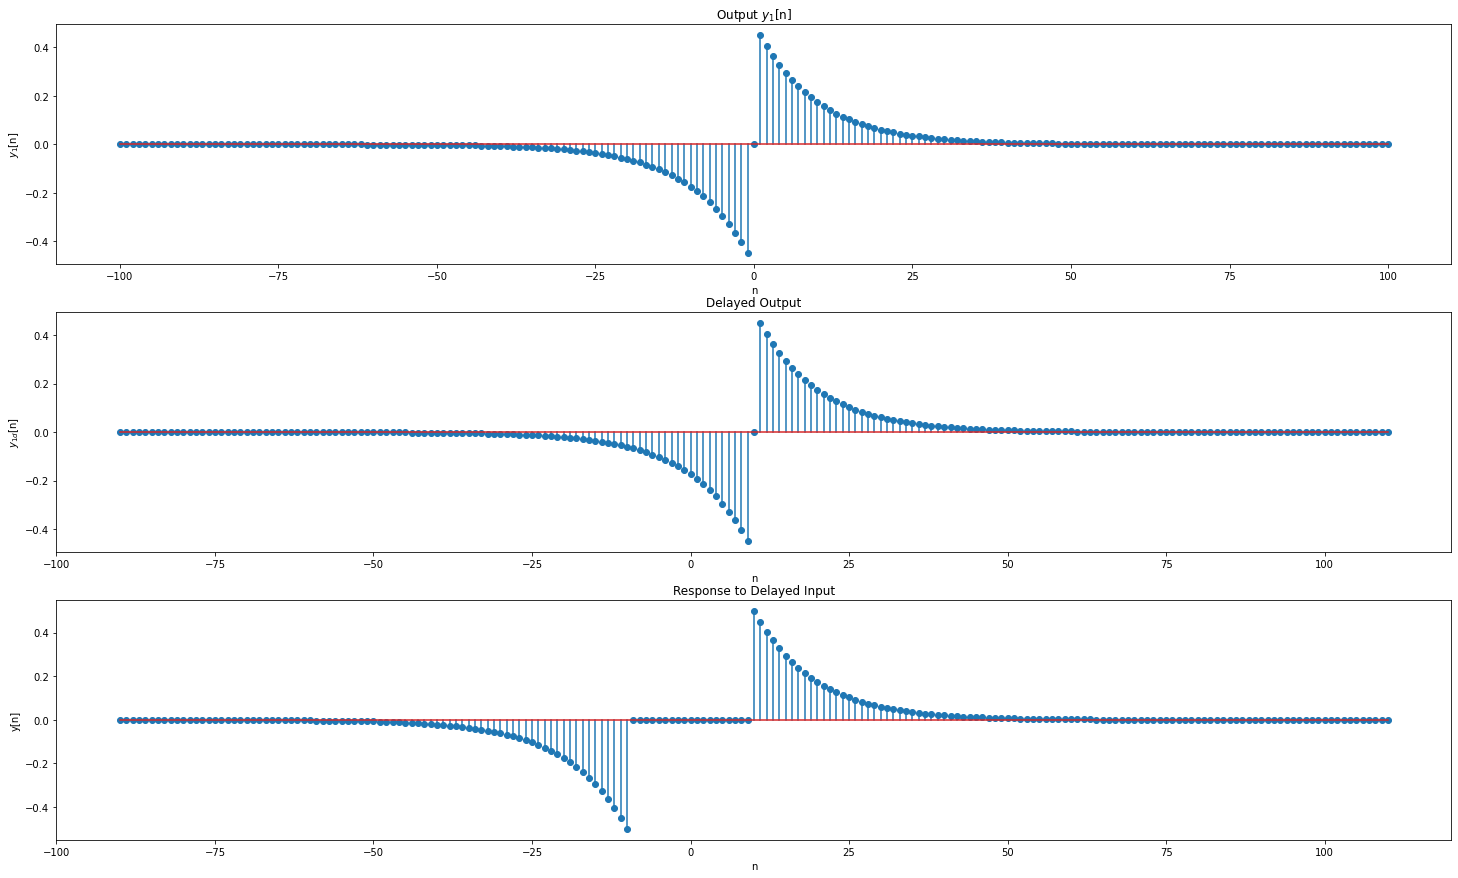


 The system in (c) is a  TIME-VARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

d) Ideal Delay System:-



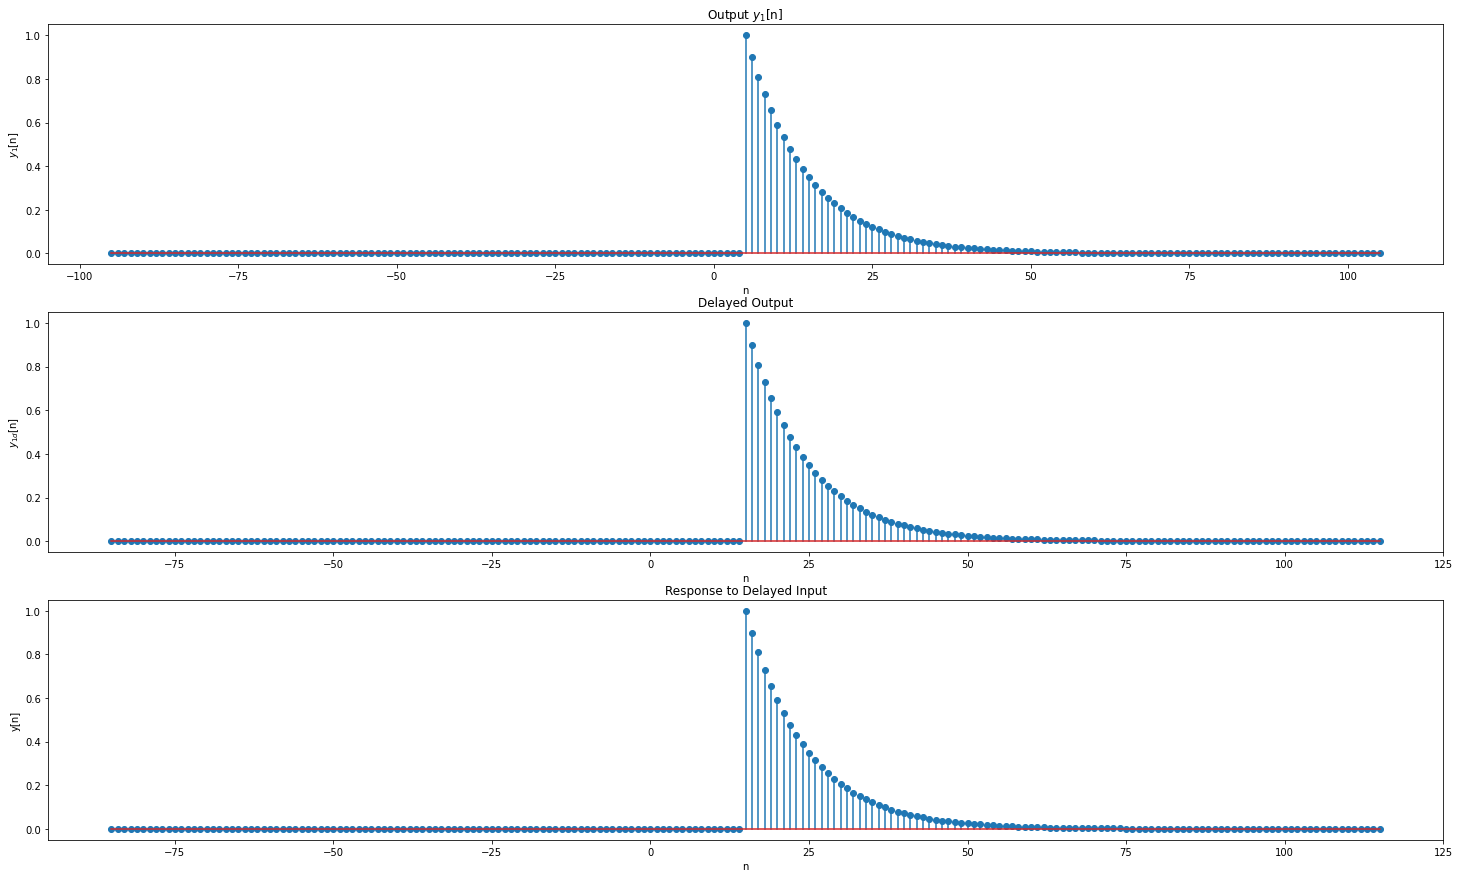


 The system in (d) is a  TIME-INVARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

e) Moving Average System:-



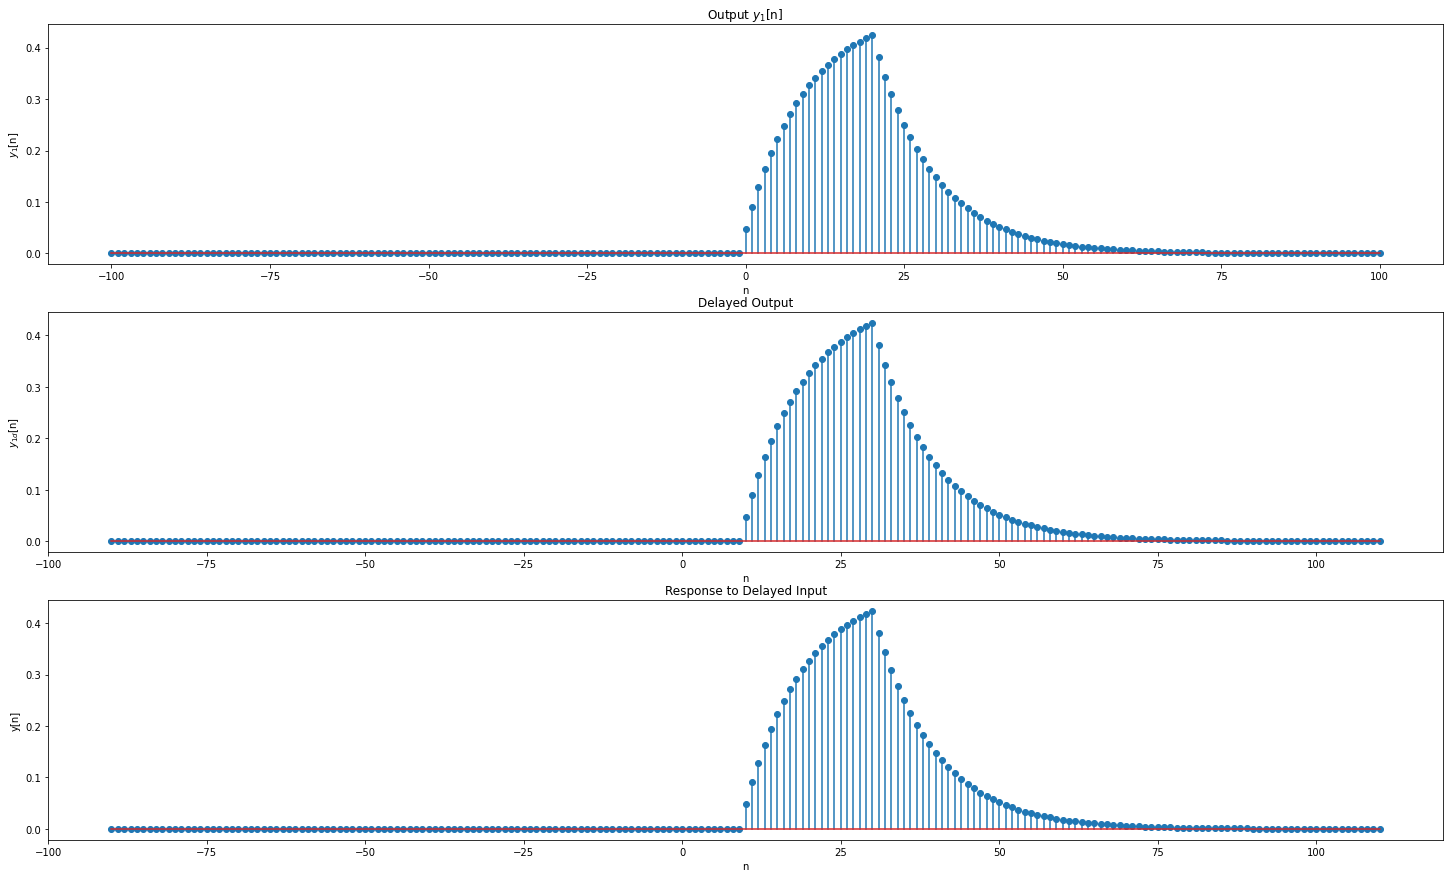


 The system in (e) is a  TIME-INVARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

f) Back Difference System:-



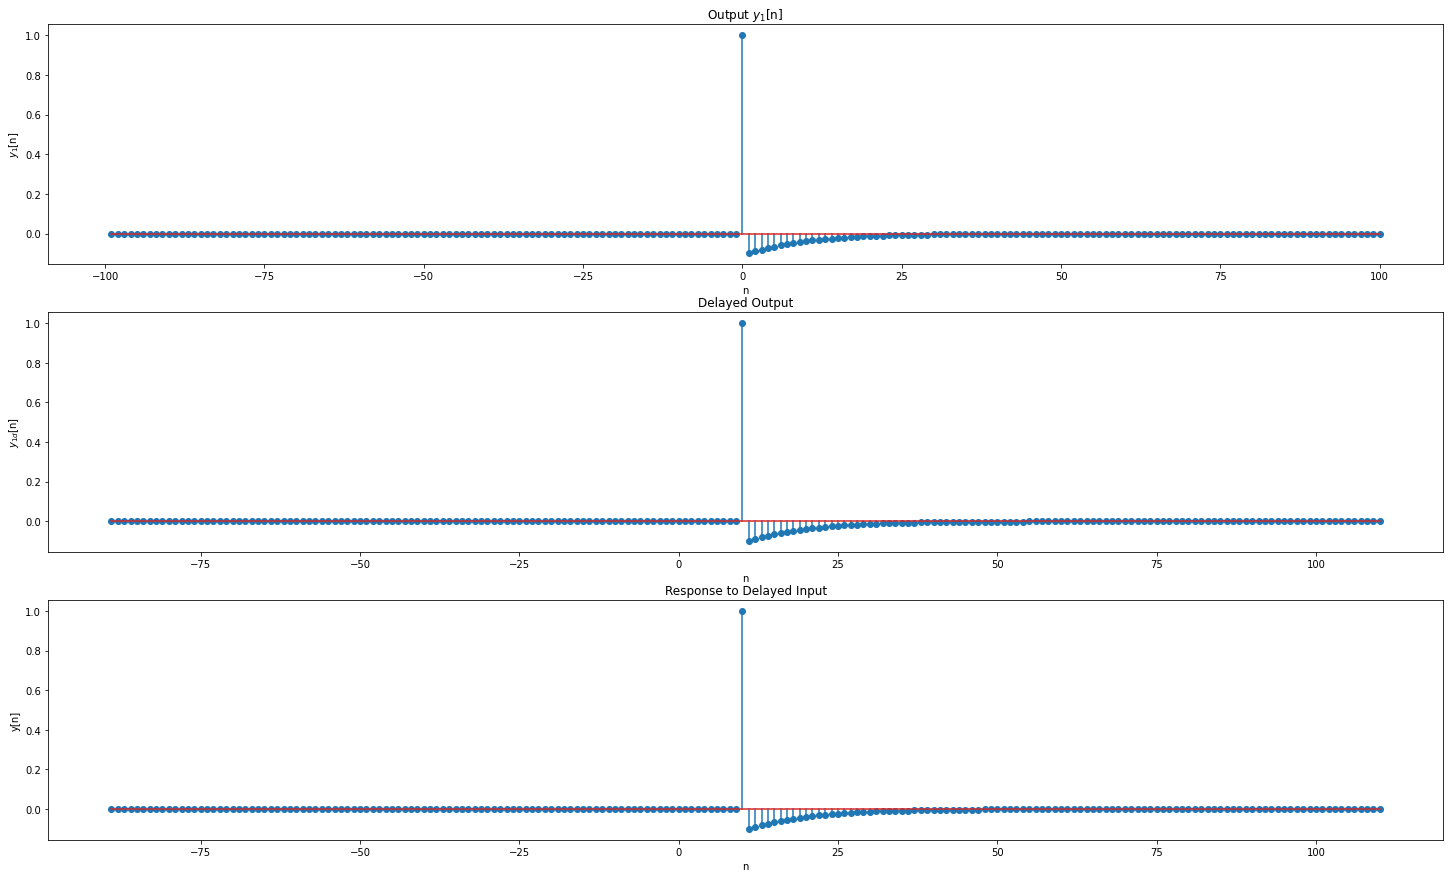


 The system in (f) is a  TIME-INVARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

g) System where y[n] = x[n] - 2x[n-1] + x[n-2]:-



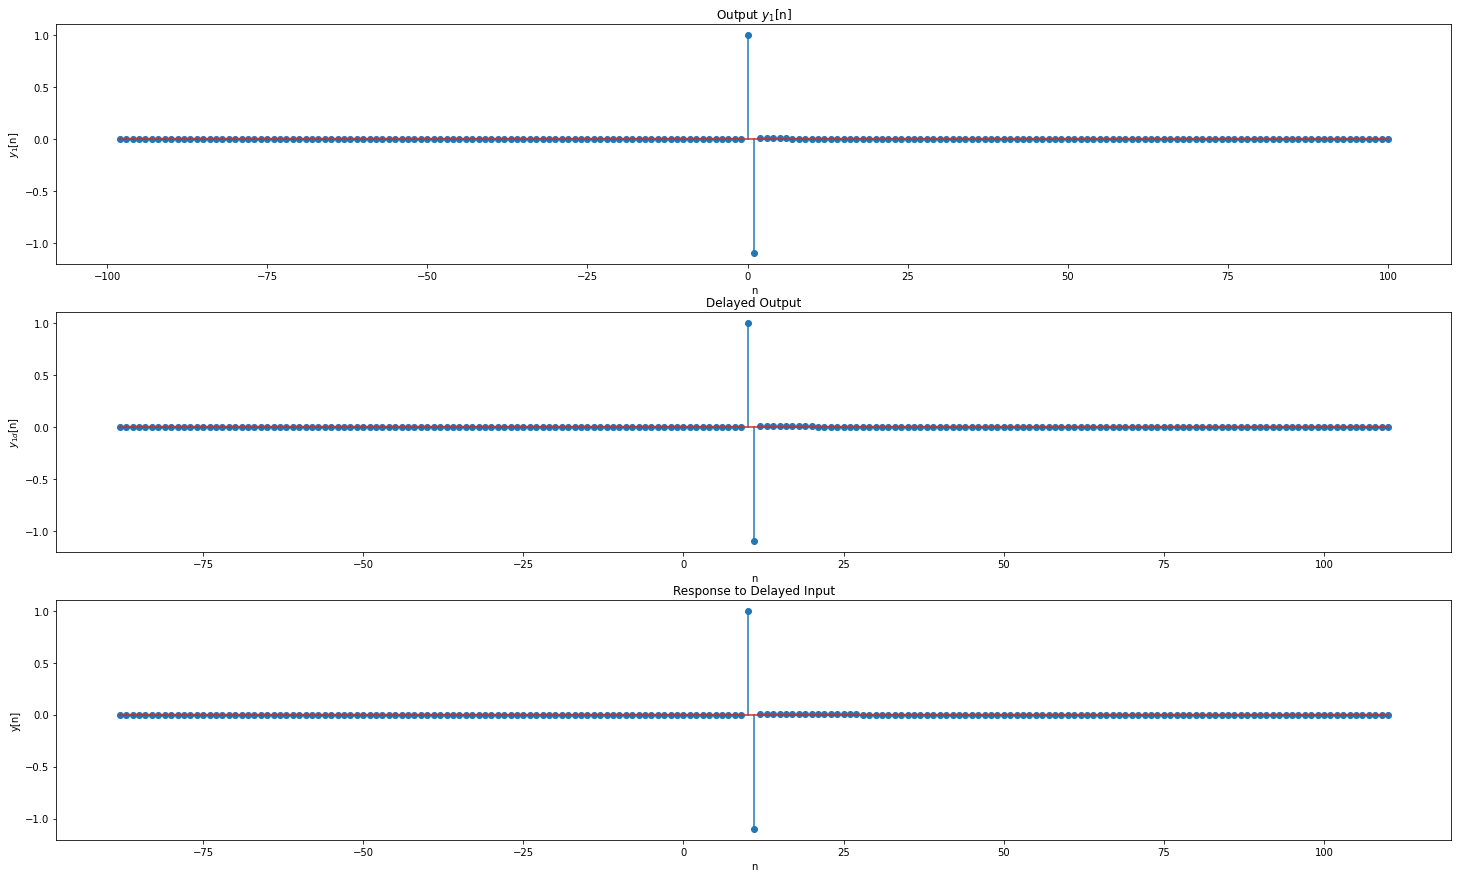


 The system in (g) is a  TIME-INVARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

h) Squarer System:-



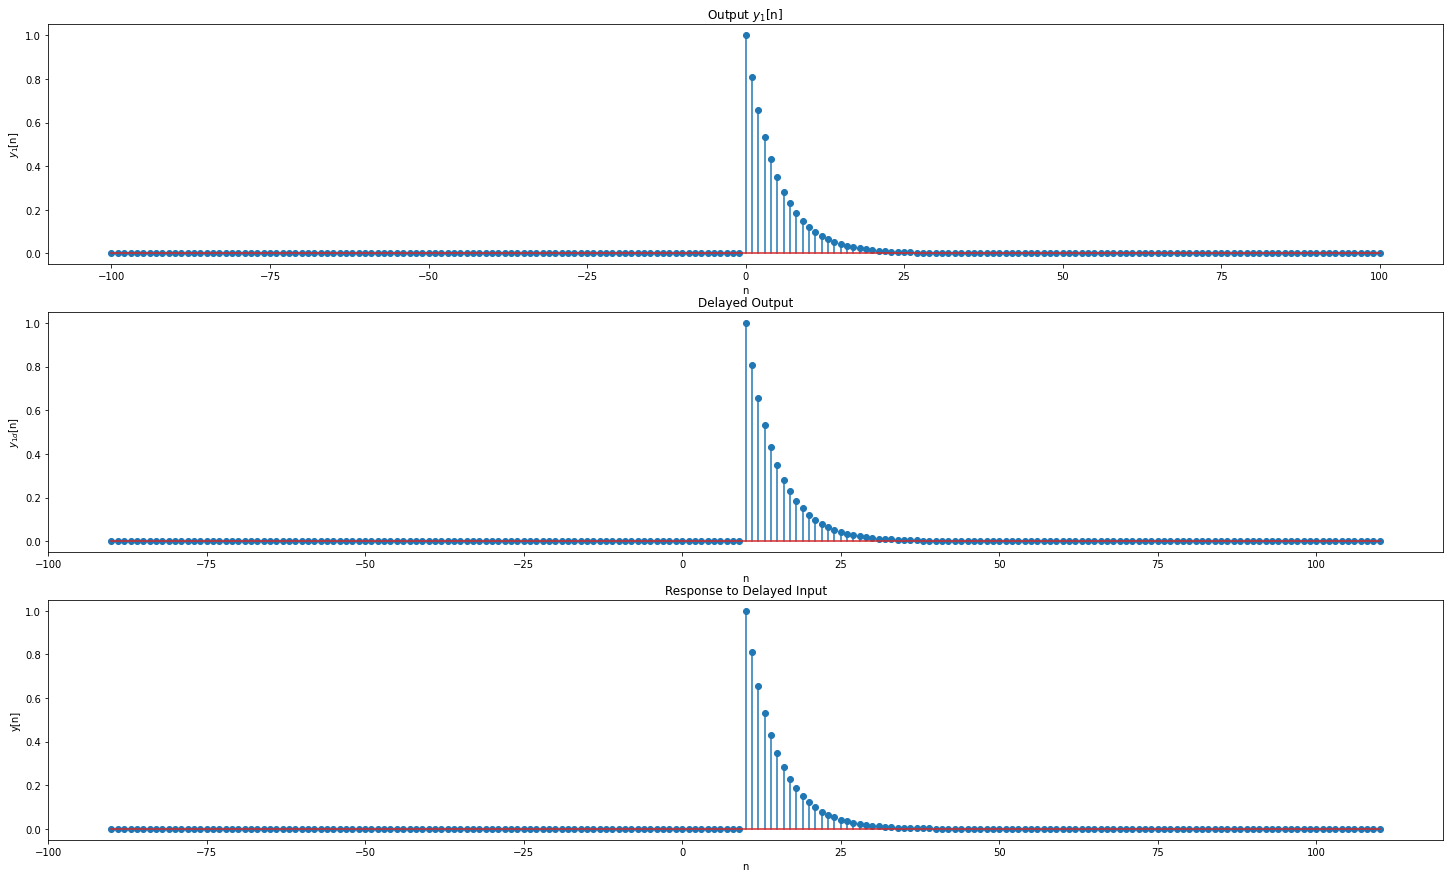


 The system in (h) is a  TIME-INVARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

i) System where y[n] = x[n-2] + x[2-n]:-



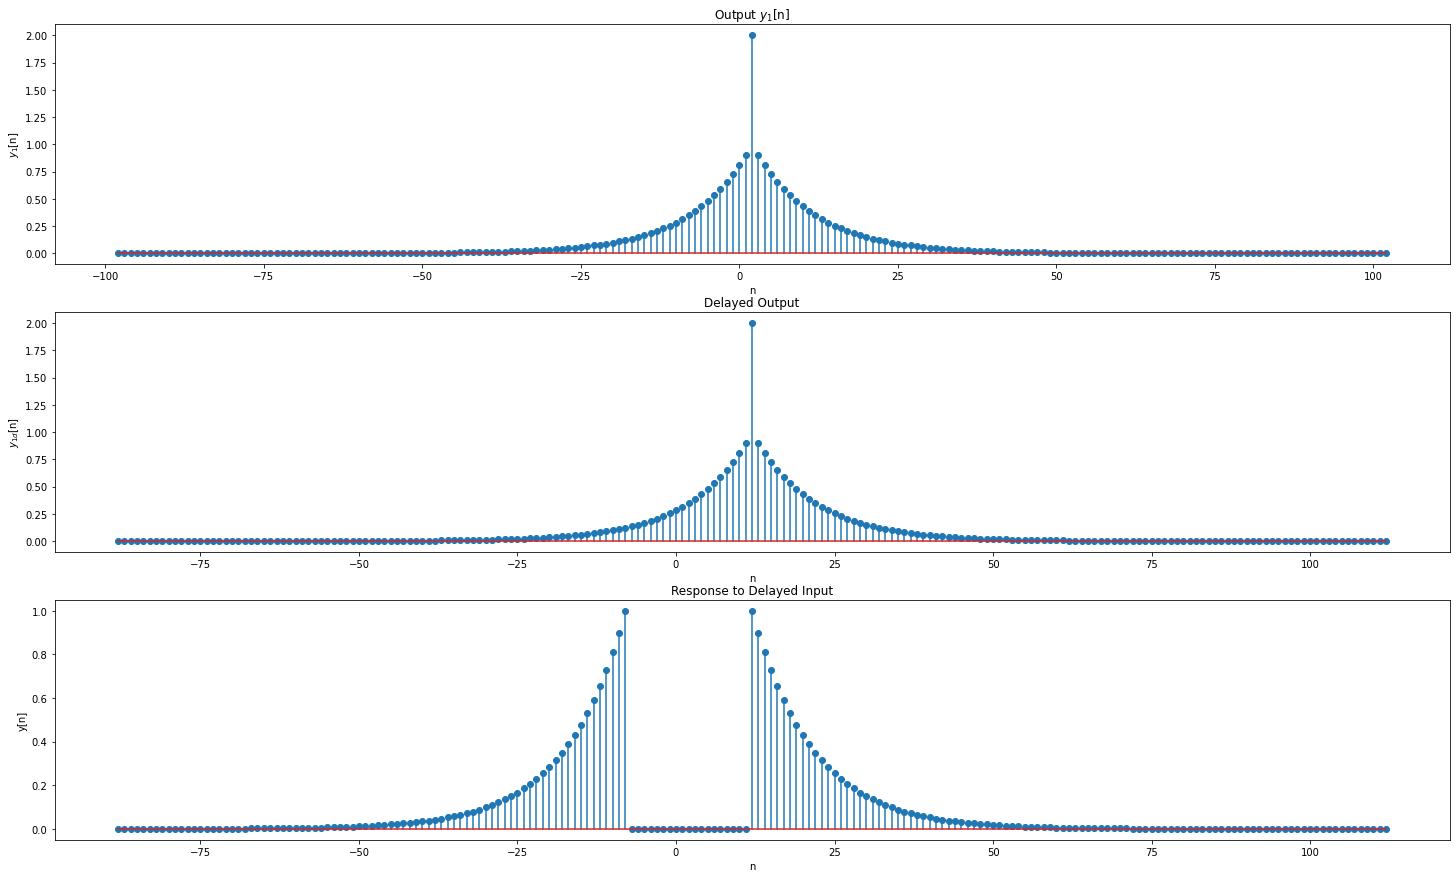


 The system in (i) is a  TIME-VARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

FOR INPUT SIGNAL $X_2$ :-


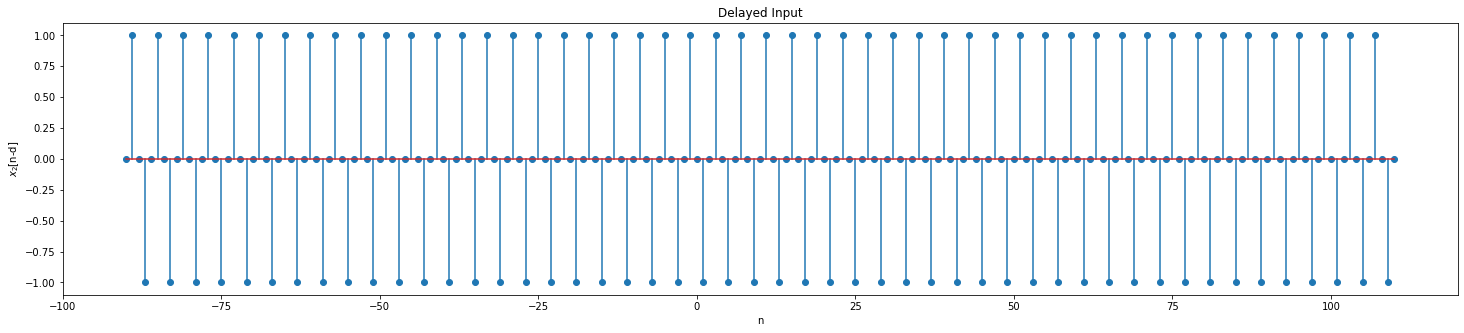


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

a) Time-Reversal System:-



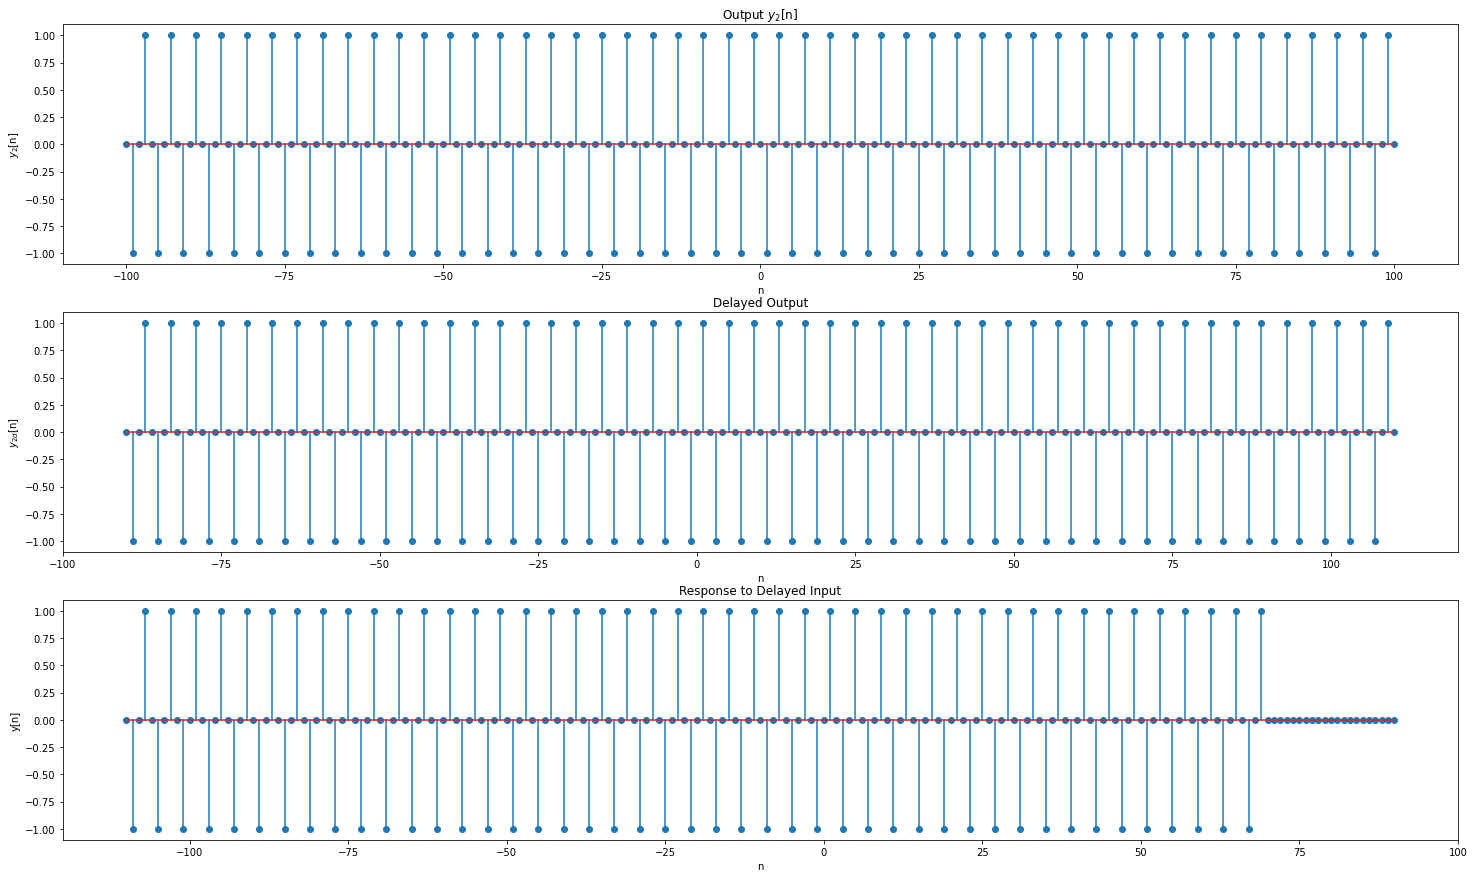


 The system in (a) is a  TIME-VARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

b) Even Component System:-



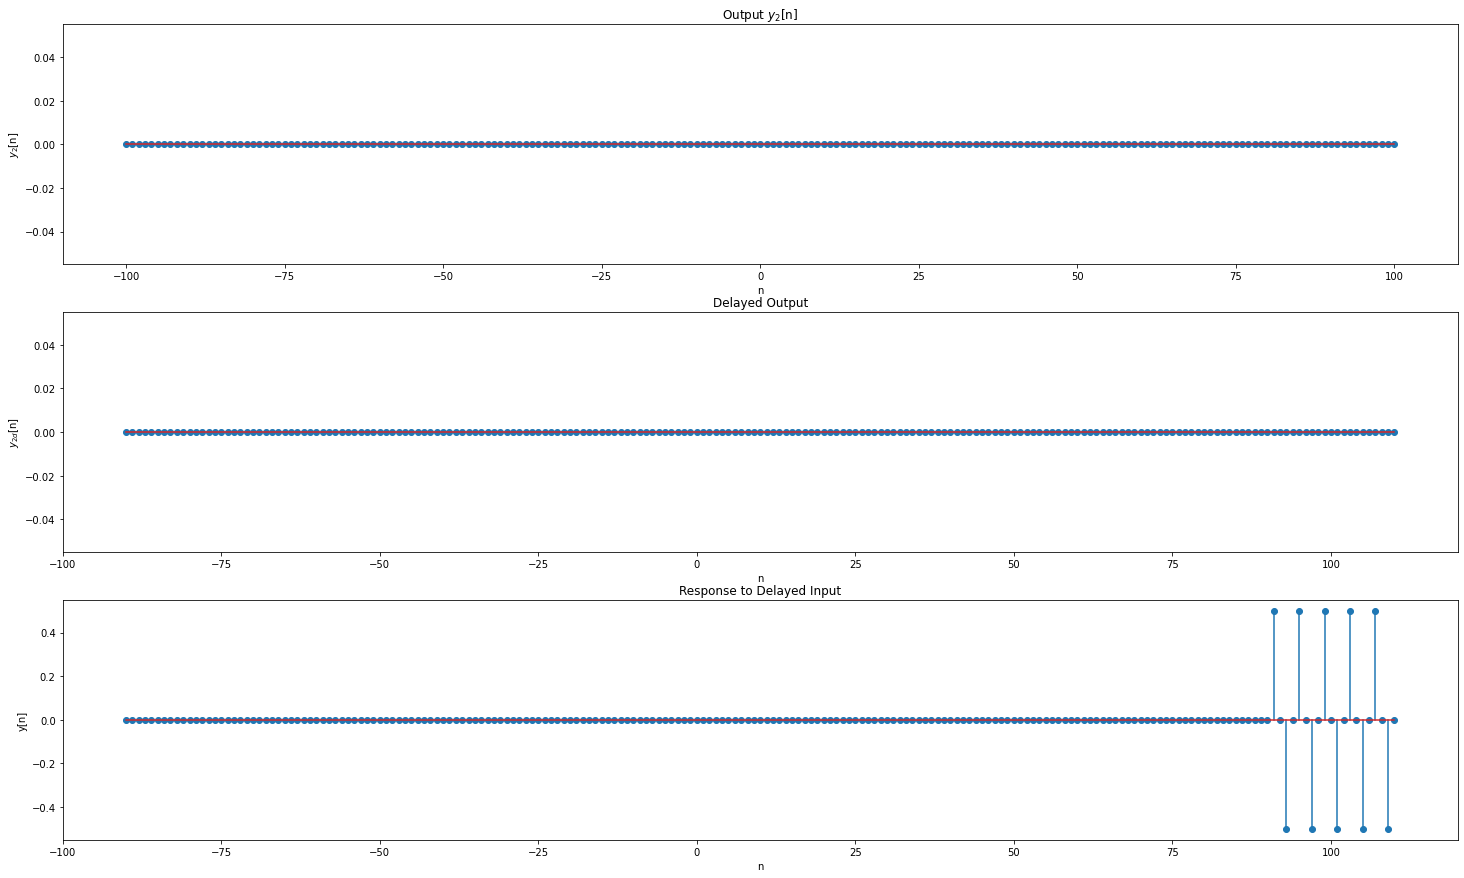


 The system in (b) is a  TIME-VARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

c) Odd Component System:-



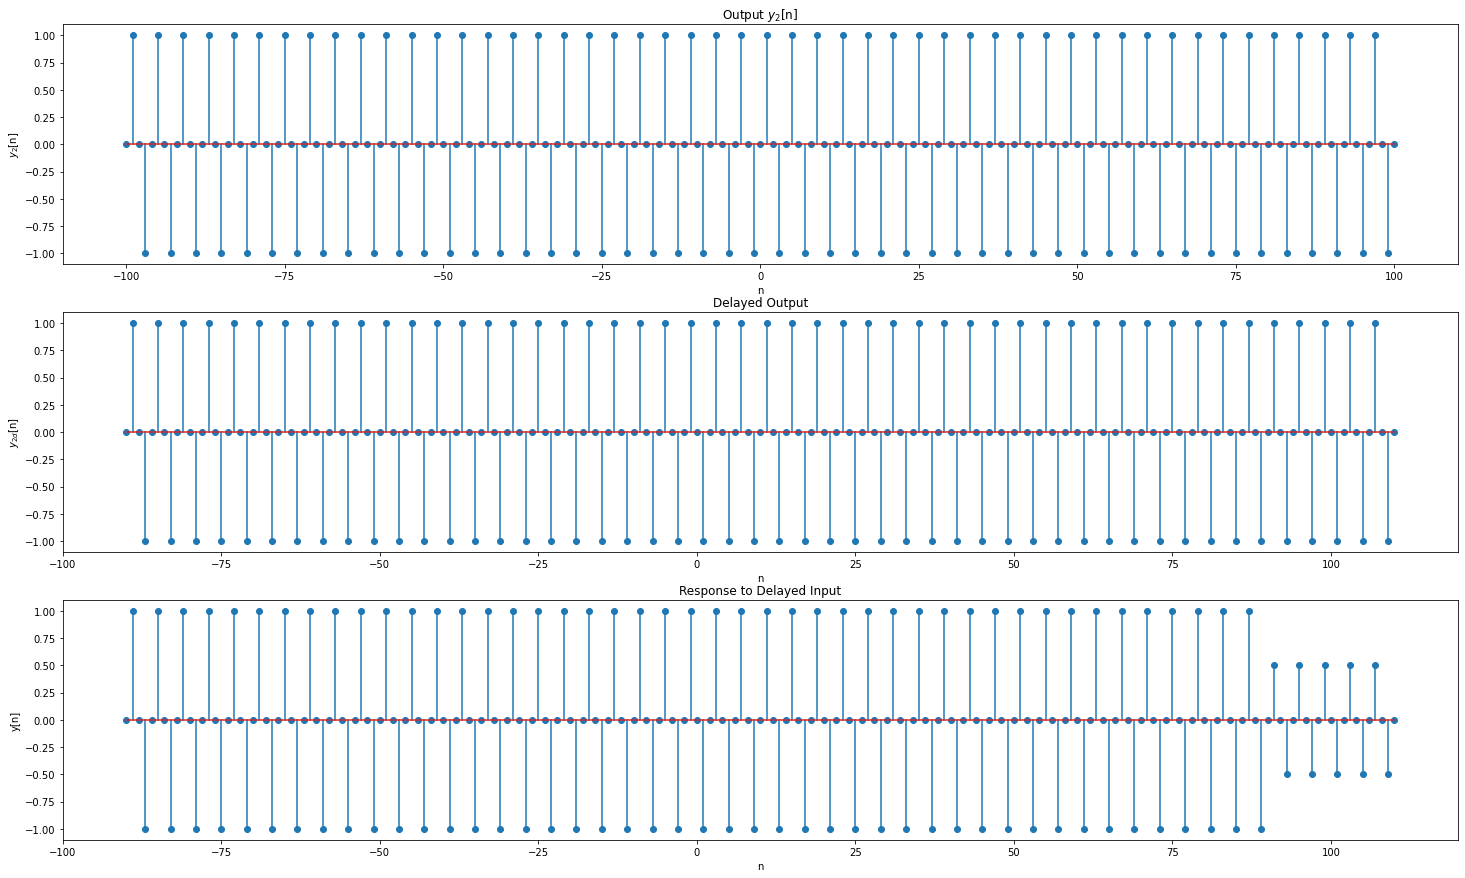


 The system in (c) is a  TIME-VARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

d) Ideal Delay System:-



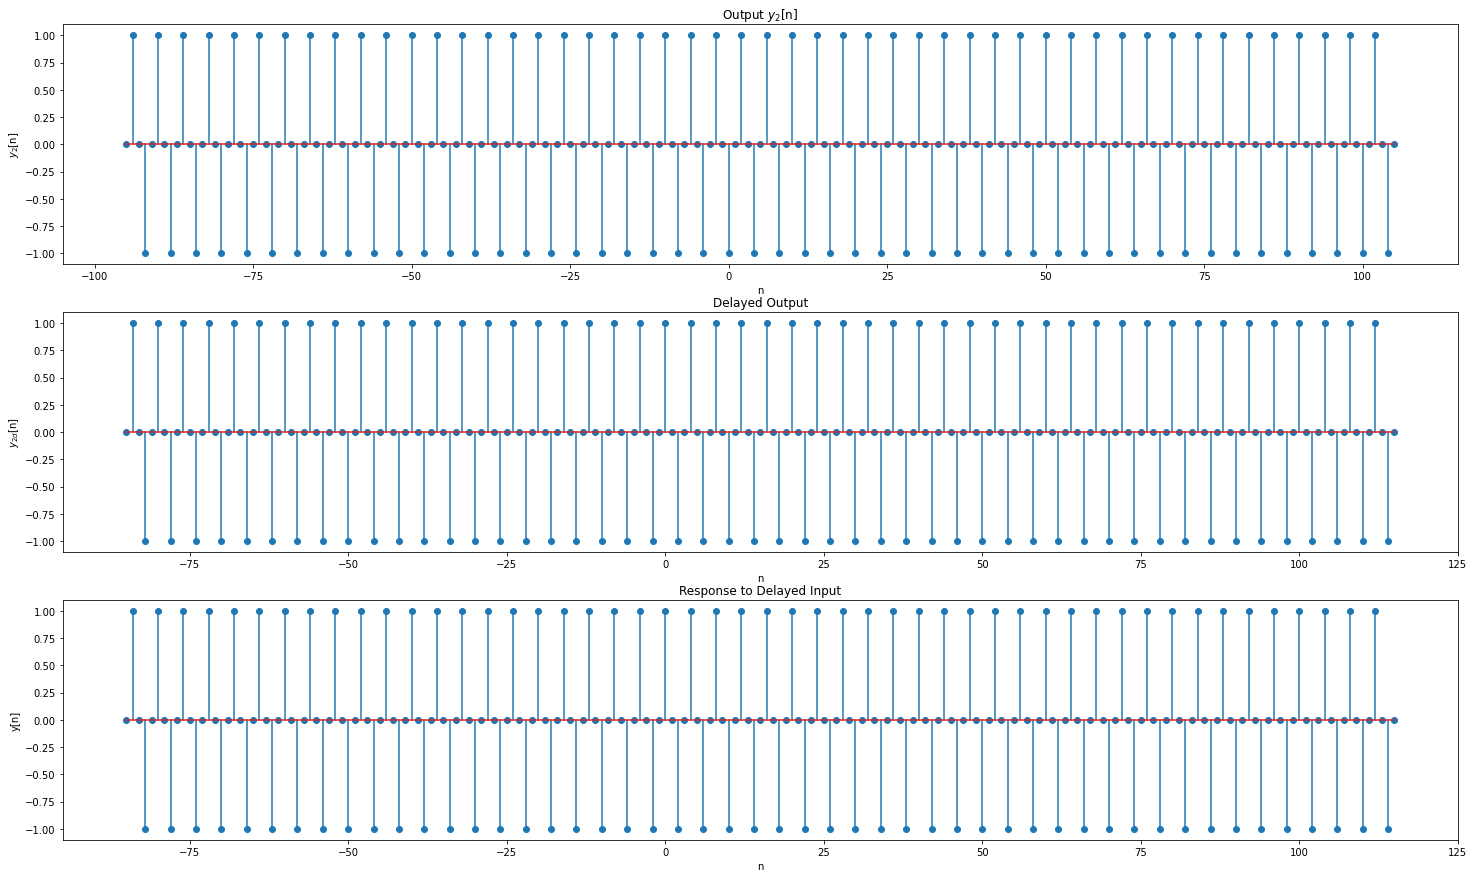


 The system in (d) is a  TIME-INVARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

e) Moving Average System:-



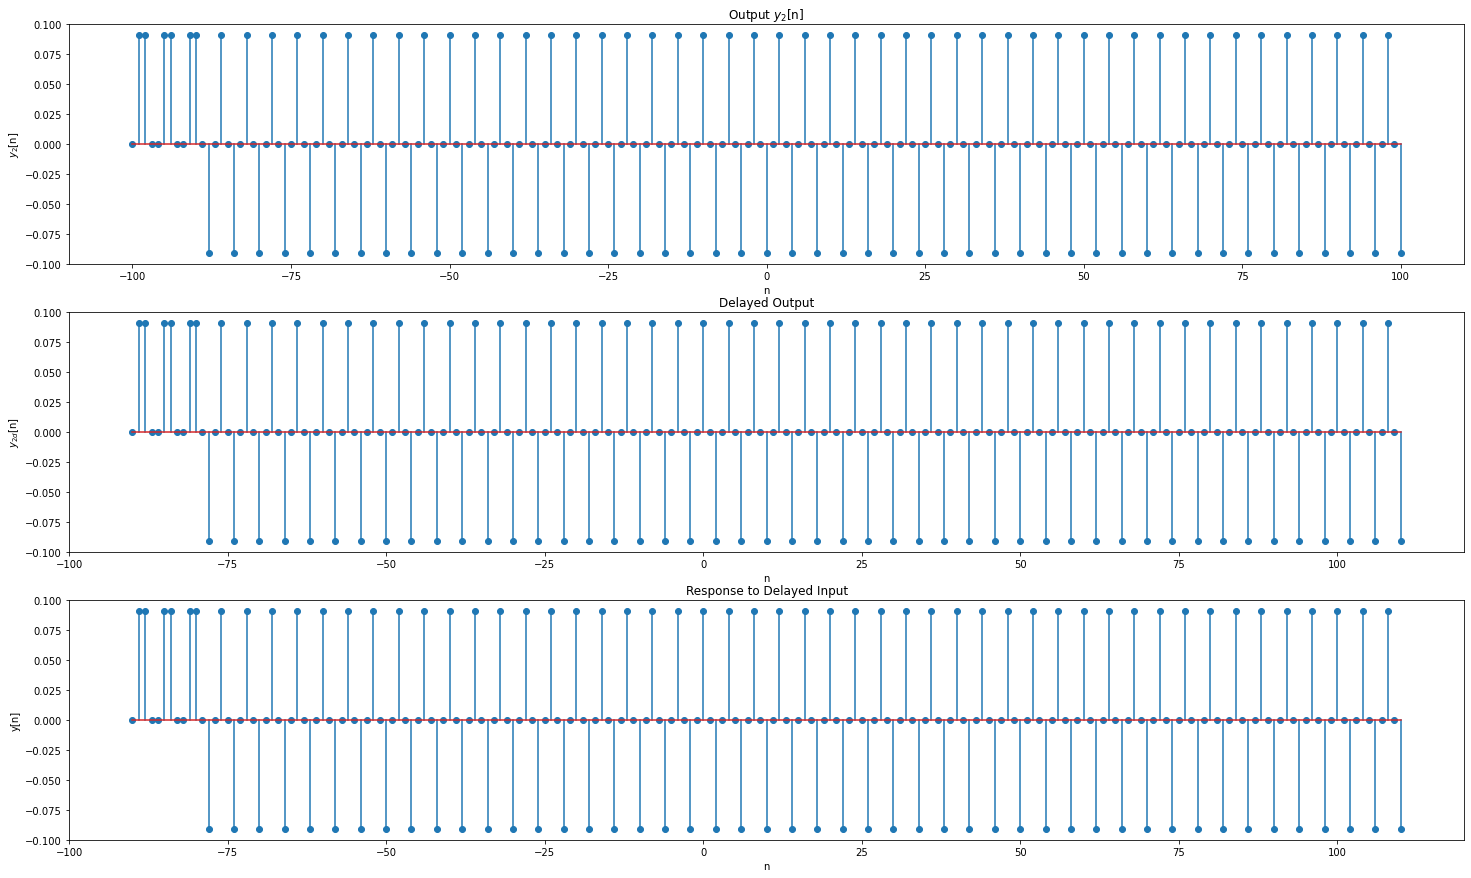


 The system in (e) is a  TIME-INVARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

f) Back Difference System:-



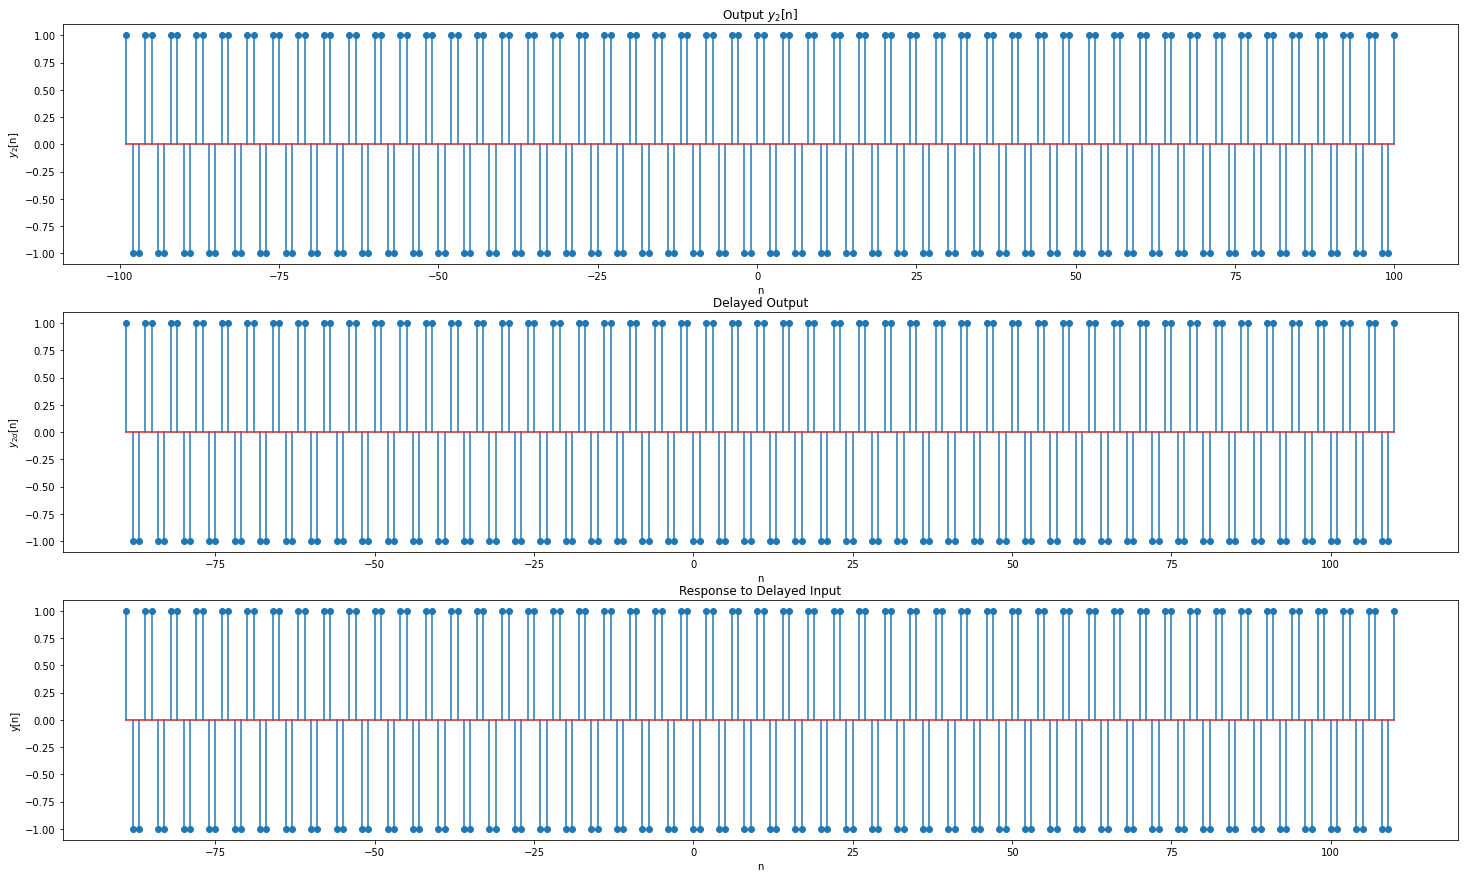


 The system in (f) is a  TIME-INVARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

g) System where y[n] = x[n] - 2x[n-1] + x[n-2]:-



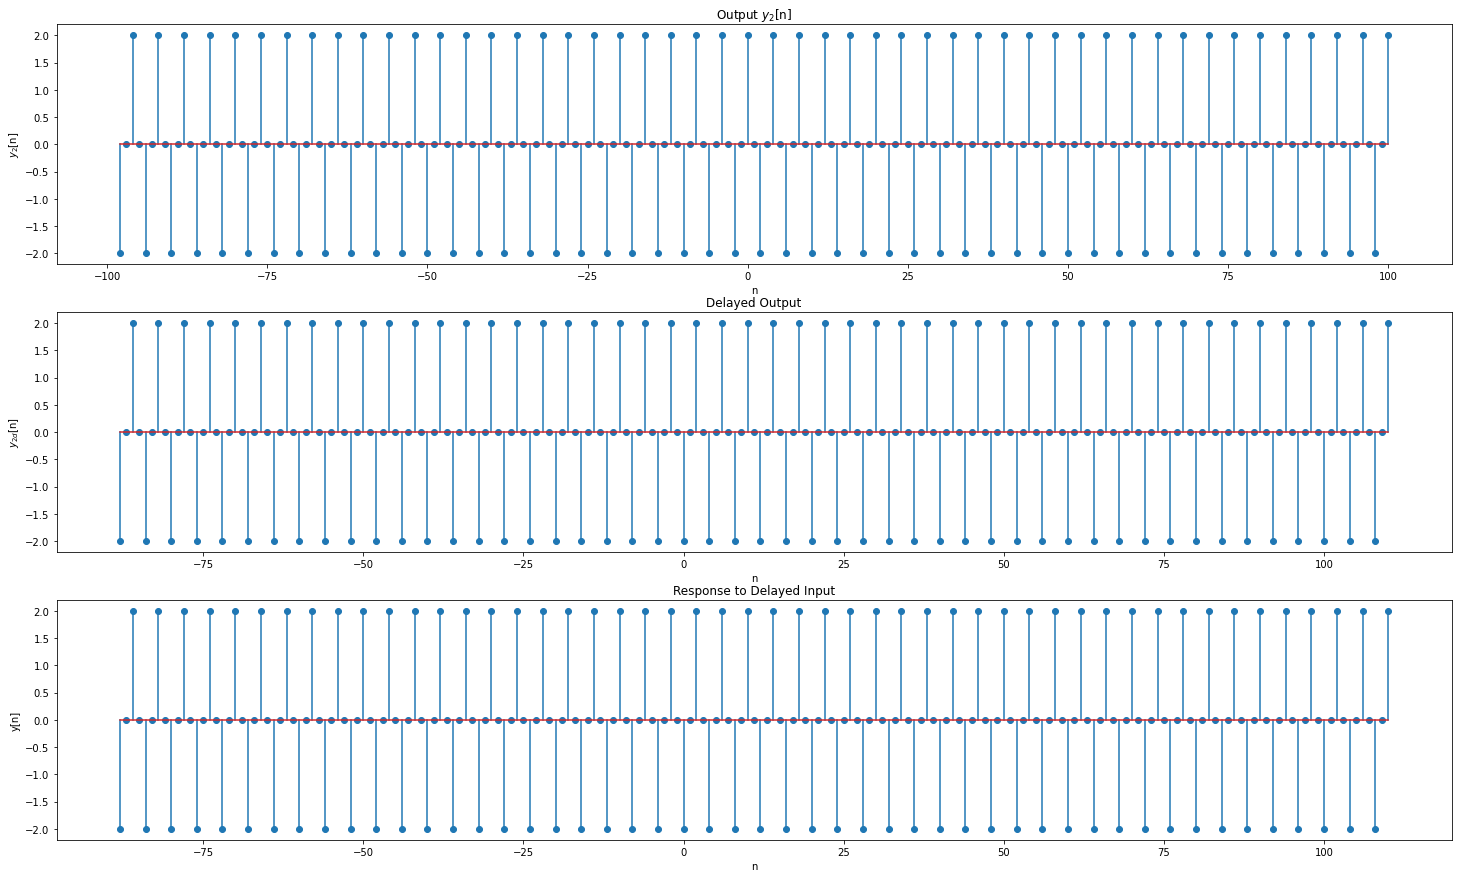


 The system in (g) is a  TIME-INVARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

h) Squarer System:-



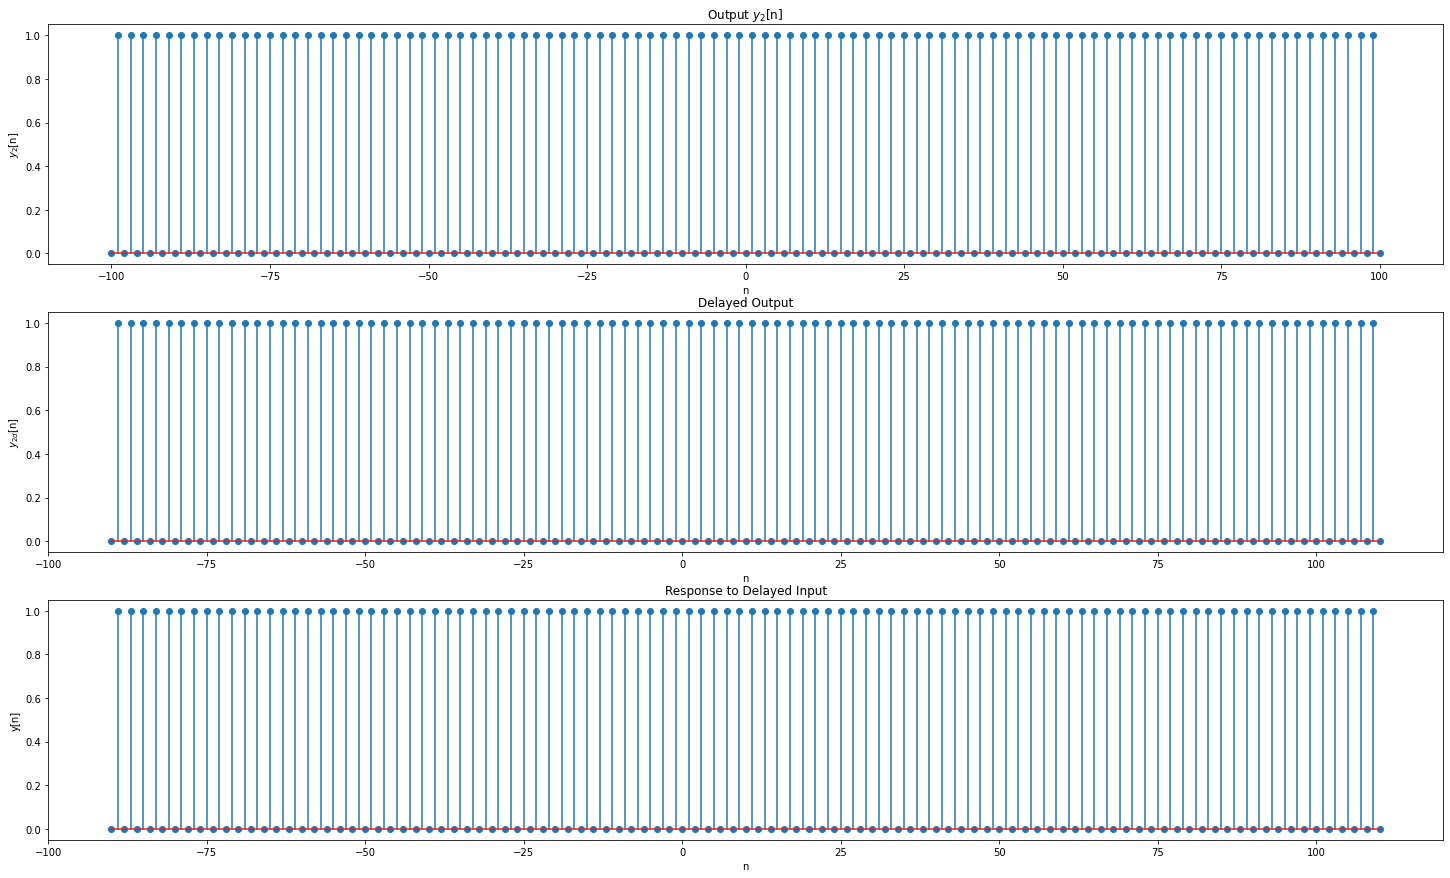


 The system in (h) is a  TIME-INVARIANT System

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

i) System where y[n] = x[n-2] + x[2-n]:-



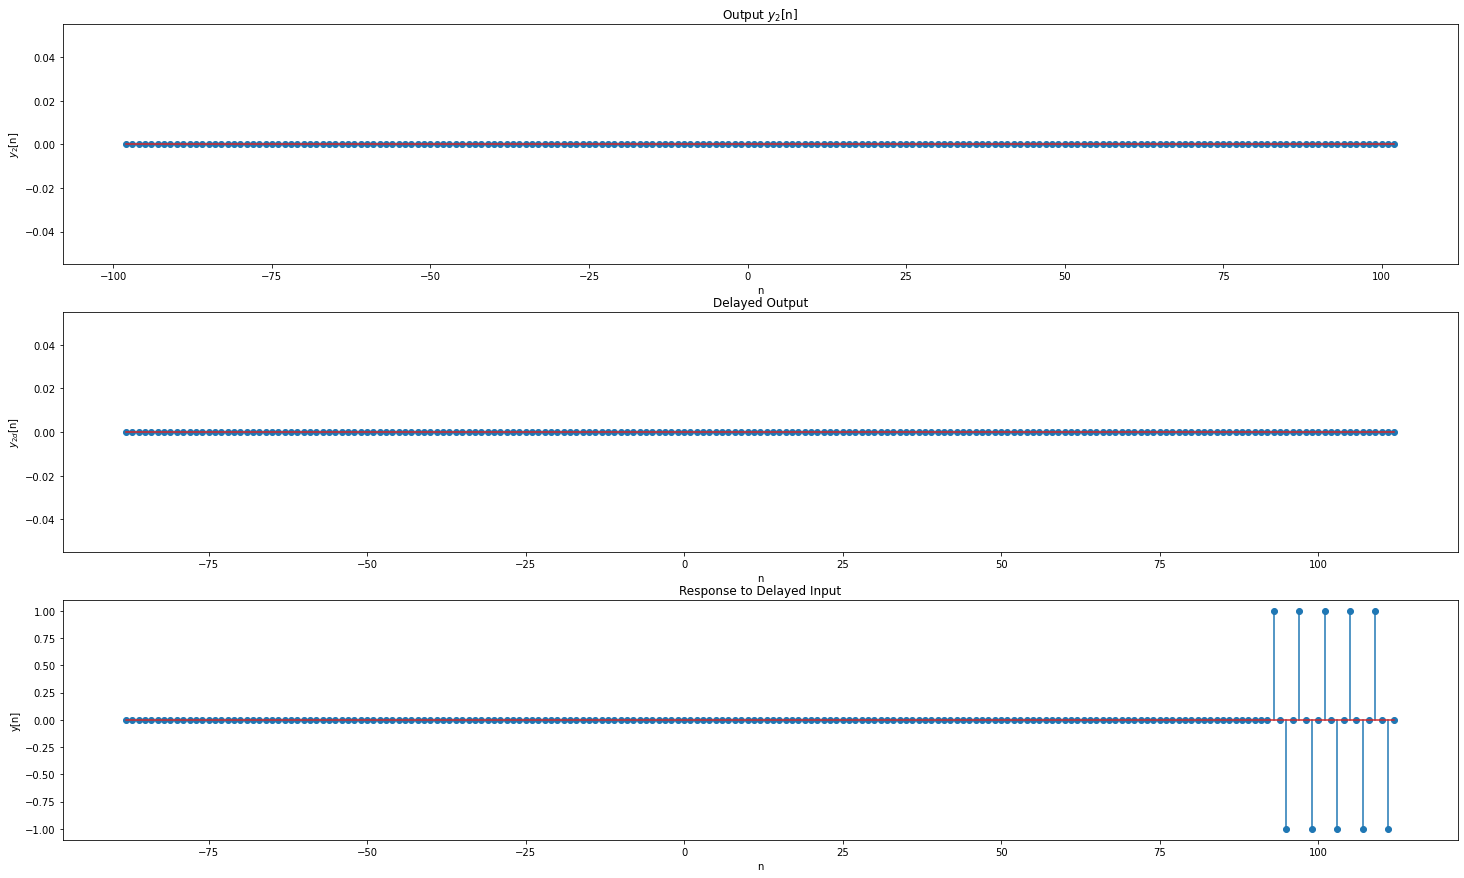


 The system in (i) is a  TIME-VARIANT System


In [ ]:
################################################
#(c) 
################################################
def check_timeinv(y1d,y):
  for i in range(len(y)):
    if (round(y1d[i],3)!=round(y[i],3)):
      return("TIME-VARIANT System")

  return("TIME-INVARIANT System")

#For input signal x1:-
print(f"FOR INPUT SIGNAL $X_1$ :-\n")
x1,n1 = inputx1(lim)
d = 10 #Taking delay=10
x1d,n1d = ideal_delay(x1,n1,d)
plt.figure(figsize=(25,5))
plt.stem(n1d,x1d)
plt.xlabel("n")
plt.ylabel("$x_1$[n-d]")
plt.title("Delayed Input")
plt.show()

print("\n"+("x"*200)+"\n")
##################################################################
print("a) Time-Reversal System:-\n")

d = 10 #Taking delay=10
x1,n1 = inputx1(lim)
x1d,n1d = ideal_delay(x1,n1,d)

y1,n1y = time_rev(x1,n1)
y,ny = time_rev(x1d,n1d)
y1d,n1dy = ideal_delay(y1,n1y,d)

def plot2_y(y1,n1y,y1d,n1dy,y,ny):
  plt.figure(figsize=(25,15))
  plt.subplot(3,1,1)
  plt.stem(n1y,y1)
  plt.xlabel("n")
  plt.ylabel("$y_1$[n]")
  plt.title("Output $y_1$[n]")
  plt.subplot(3,1,2)
  plt.stem(n1dy,y1d)
  plt.xlabel("n")
  plt.ylabel("$y_{1d}$[n]")
  plt.title("Delayed Output")
  plt.subplot(3,1,3)
  plt.stem(ny,y)
  plt.xlabel("n")
  plt.ylabel("y[n]")
  plt.title("Response to Delayed Input")
  plt.show()

plot2_y(y1,n1y,y1d,n1dy,y,ny)

print("\n The system in (a) is a ",check_timeinv(y1d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("b) Even Component System:-\n")

d = 10 #Taking delay=10
x1,n1 = inputx1(lim)
x1d,n1d = ideal_delay(x1,n1,d)

y1,n1y = xeven(x1,n1),n1
y,ny = xeven(x1d,n1d),n1d
y1d,n1dy = ideal_delay(y1,n1y,d)

plot2_y(y1,n1y,y1d,n1dy,y,ny)

print("\n The system in (b) is a ",check_timeinv(y1d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("c) Odd Component System:-\n")

d = 10 #Taking delay=10
x1,n1 = inputx1(lim)
x1d,n1d = ideal_delay(x1,n1,d)

y1,n1y = xodd(x1,n1),n1
y,ny = xodd(x1d,n1d),n1d
y1d,n1dy = ideal_delay(y1,n1y,d)

plot2_y(y1,n1y,y1d,n1dy,y,ny)

print("\n The system in (c) is a ",check_timeinv(y1d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("d) Ideal Delay System:-\n")

d = 10 #Taking delay=10
x1,n1 = inputx1(lim)
x1d,n1d = ideal_delay(x1,n1,d)

d1 = 5 #Taking delay=5 for the Ideal Delay System
y1,n1y = ideal_delay(x1,n1,d1)
y,ny = ideal_delay(x1d,n1d,d1)
y1d,n1dy = ideal_delay(y1,n1y,d)

plot2_y(y1,n1y,y1d,n1dy,y,ny)

print("\n The system in (d) is a ",check_timeinv(y1d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("e) Moving Average System:-\n")

d = 10 #Taking delay=10
x1,n1 = inputx1(lim)
x1d,n1d = ideal_delay(x1,n1,d)

M=20 #Taking M=20
y1,n1y = moving_avg(x1,n1,M),n1
y,ny = moving_avg(x1d,n1d,M),n1d
y1d,n1dy = ideal_delay(y1,n1y,d)

plot2_y(y1,n1y,y1d,n1dy,y,ny)

print("\n The system in (e) is a ",check_timeinv(y1d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("f) Back Difference System:-\n")

d = 10 #Taking delay=10
x1,n1 = inputx1(lim)
x1d,n1d = ideal_delay(x1,n1,d)

y1,n1y = back_diff(x1,n1)
y,ny = back_diff(x1d,n1d)
y1d,n1dy = ideal_delay(y1,n1y,d)

plot2_y(y1,n1y,y1d,n1dy,y,ny)

print("\n The system in (f) is a ",check_timeinv(y1d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("g) System where y[n] = x[n] - 2x[n-1] + x[n-2]:-\n")

d = 10 #Taking delay=10
x1,n1 = inputx1(lim)
x1d,n1d = ideal_delay(x1,n1,d)

y1,n1y = system_g(x1,n1)
y,ny = system_g(x1d,n1d)
y1d,n1dy = ideal_delay(y1,n1y,d)

plot2_y(y1,n1y,y1d,n1dy,y,ny)

print("\n The system in (g) is a ",check_timeinv(y1d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("h) Squarer System:-\n")

d = 10 #Taking delay=10
x1,n1 = inputx1(lim)
x1d,n1d = ideal_delay(x1,n1,d)

y1,n1y = squarer(x1),n1
y,ny = squarer(x1d),n1d
y1d,n1dy = ideal_delay(y1,n1y,d)

plot2_y(y1,n1y,y1d,n1dy,y,ny)

print("\n The system in (h) is a ",check_timeinv(y1d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("i) System where y[n] = x[n-2] + x[2-n]:-\n")

d = 10 #Taking delay=10
x1,n1 = inputx1(lim)
x1d,n1d = ideal_delay(x1,n1,d)

y1,n1y = system_i(x1,n1)
y,ny = system_i(x1d,n1d)
y1d,n1dy = ideal_delay(y1,n1y,d)

plot2_y(y1,n1y,y1d,n1dy,y,ny)

print("\n The system in (i) is a ",check_timeinv(y1d,y))

print("\n"+("x"*200)+"\n")
##################################################################

##################################################################
def plot3_y(y2,n2y,y2d,n2dy,y,ny):
  plt.figure(figsize=(25,15))
  plt.subplot(3,1,1)
  plt.stem(n2y,y2)
  plt.xlabel("n")
  plt.ylabel("$y_2$[n]")
  plt.title("Output $y_2$[n]")
  plt.subplot(3,1,2)
  plt.stem(n2dy,y2d)
  plt.xlabel("n")
  plt.ylabel("$y_{2d}$[n]")
  plt.title("Delayed Output")
  plt.subplot(3,1,3)
  plt.stem(ny,y)
  plt.xlabel("n")
  plt.ylabel("y[n]")
  plt.title("Response to Delayed Input")
  plt.show()

#For input signal x2:-
print(f"FOR INPUT SIGNAL $X_2$ :-\n")
x2,n2 = inputx2(lim)
d = 10 #Taking delay=10
x2d,n2d = ideal_delay(x2,n2,d)
plt.figure(figsize=(25,5))
plt.stem(n2d,x2d)
plt.xlabel("n")
plt.ylabel("$x_2$[n-d]")
plt.title("Delayed Input")
plt.show()

print("\n"+("x"*200)+"\n")
##################################################################
print("a) Time-Reversal System:-\n")

d = 10 #Taking delay=10
x2,n2 = inputx2(lim)
x2d,n2d = ideal_delay(x2,n2,d)

y2,n2y = time_rev(x2,n2)
y,ny = time_rev(x2d,n2d)
y2d,n2dy = ideal_delay(y2,n2y,d)

plot3_y(y2,n2y,y2d,n2dy,y,ny)

print("\n The system in (a) is a ",check_timeinv(y2d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("b) Even Component System:-\n")

d = 10 #Taking delay=10
x2,n2 = inputx2(lim)
x2d,n2d = ideal_delay(x2,n2,d)

y2,n2y = xeven(x2,n2),n2
y,ny = xeven(x2d,n2d),n2d
y2d,n2dy = ideal_delay(y2,n2y,d)

plot3_y(y2,n2y,y2d,n2dy,y,ny)

print("\n The system in (b) is a ",check_timeinv(y2d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("c) Odd Component System:-\n")

d = 10 #Taking delay=10
x2,n2 = inputx2(lim)
x2d,n2d = ideal_delay(x2,n2,d)

y2,n2y = xodd(x2,n2),n2
y,ny = xodd(x2d,n2d),n2d
y2d,n2dy = ideal_delay(y2,n2y,d)

plot3_y(y2,n2y,y2d,n2dy,y,ny)

print("\n The system in (c) is a ",check_timeinv(y2d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("d) Ideal Delay System:-\n")

d = 10 #Taking delay=10
x2,n2 = inputx2(lim)
x2d,n2d = ideal_delay(x2,n2,d)

d2 = 5 #Taking delay=5 for the Ideal Delay System
y2,n2y = ideal_delay(x2,n2,d2)
y,ny = ideal_delay(x2d,n2d,d2)
y2d,n2dy = ideal_delay(y2,n2y,d)

plot3_y(y2,n2y,y2d,n2dy,y,ny)

print("\n The system in (d) is a ",check_timeinv(y2d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("e) Moving Average System:-\n")

d = 10 #Taking delay=10
x2,n2 = inputx2(lim)
x2d,n2d = ideal_delay(x2,n2,d)

M=10 #Taking M=10
y2,n2y = moving_avg(x2,n2,M),n2
y,ny = moving_avg(x2d,n2d,M),n2d
y2d,n2dy = ideal_delay(y2,n2y,d)

plot3_y(y2,n2y,y2d,n2dy,y,ny)

print("\n The system in (e) is a ",check_timeinv(y2d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("f) Back Difference System:-\n")

d = 10 #Taking delay=10
x2,n2 = inputx2(lim)
x2d,n2d = ideal_delay(x2,n2,d)

y2,n2y = back_diff(x2,n2)
y,ny = back_diff(x2d,n2d)
y2d,n2dy = ideal_delay(y2,n2y,d)

plot3_y(y2,n2y,y2d,n2dy,y,ny)

print("\n The system in (f) is a ",check_timeinv(y2d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("g) System where y[n] = x[n] - 2x[n-1] + x[n-2]:-\n")

d = 10 #Taking delay=10
x2,n2 = inputx2(lim)
x2d,n2d = ideal_delay(x2,n2,d)

y2,n2y = system_g(x2,n2)
y,ny = system_g(x2d,n2d)
y2d,n2dy = ideal_delay(y2,n2y,d)

plot3_y(y2,n2y,y2d,n2dy,y,ny)

print("\n The system in (g) is a ",check_timeinv(y2d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("h) Squarer System:-\n")

d = 10 #Taking delay=10
x2,n2 = inputx2(lim)
x2d,n2d = ideal_delay(x2,n2,d)

y2,n2y = squarer(x2),n2
y,ny = squarer(x2d),n2d
y2d,n2dy = ideal_delay(y2,n2y,d)

plot3_y(y2,n2y,y2d,n2dy,y,ny)

print("\n The system in (h) is a ",check_timeinv(y2d,y))

print("\n"+("x"*200)+"\n")
##################################################################
print("i) System where y[n] = x[n-2] + x[2-n]:-\n")

d = 10 #Taking delay=10
x2,n2 = inputx2(lim)
x2d,n2d = ideal_delay(x2,n2,d)

y2,n2y = system_i(x2,n2)
y,ny = system_i(x2d,n2d)
y2d,n2dy = ideal_delay(y2,n2y,d)

plot3_y(y2,n2y,y2d,n2dy,y,ny)

print("\n The system in (i) is a ",check_timeinv(y2d,y))
##################################################################


<h4> <b> Report your observations : </b>  

<dt> <h4> i. All the systems given in Question 1 are linear except for (h) which is the Squarer System as shown above in the outputs. A general thumb rule is that- if the coefficients of x[n] depends on x[n-k] for any k, then the system is NON-LINEAR. Otherwise, LINEAR.

To check for Linearity, we pass the input $ax_1[n]+bx_2[n]$ and check if its output matches $ay_1[n]+by_2[n]$.</h4> </dt>


<dt> <h4> ii. The time-reversal system, y[n]=x[-n] in (a); the even component system, y[n]=$\frac{x[n]+x[-n]}{2}$ in (b); the odd component system, y[n]=$\frac{x[n]-x[-n]}{2}$ in (c); and the system, y[n] = x[n-2]+x[2-n] in (i) are the TIME-VARIANT systems, others are TIME-INVARIANT as shown in the above outputs. A general thumb rule is that- if the coefficients of x[n] depends on n or the system has x[k-n] term for any k, then the system is TIME-VARIANT. Otherwise, TIME-INVARIANT.

To check for Time-Invariance, we pass the delayed input x[n-d] and check if its output matches the delayed output, y[n-d].</h4> </dt>


<dt> <h4> iii. The only LTI Systems are (d),(e),(f),(g) which are the ideal delay, moving average, back difference and y[n]=x[n]-2x[n-1]+x[n-2] systems respectively. We observe that all these systems can be represented in terms of an LCCDE (Linear Constant Coefficient Difference Equation.</h4> </dt>


<dt> <h4> iv. We can see that there are some errors close to the boundary limits i.e. -100 and 100. This is because our signal has finite range (-100 to 100) instead of infinite range, hence on doing operations like delay and moving average, we see some unexpected outputs at these range limits.



#Question 3

<h4> <b> Part (3) : Linear Time-Invariant (LTI) Systems on natural signals : </b> 

<dt> <h4> For LTI systems, the output of the system for any arbitrary input can be determined using the convolution sum </h4> </dt> 

<dt> <h4> <center> $y[n] = \sum\limits_{k=-∞}^{+\infty} x[n] \cdot h[n-k]  $ </center> </h4> </dt> 

<dt> <h4> Where y[n] is the output of the LTI system, x[n] is the input signals and h[n] is the impulse response of the discrete time system   </dt> </h4>

<h4> <b> Programming Questions : </b>  

<dt> <h4> a. Write a Python function that accepts two one dimensional input sequences and linearly convolves them. </h4> </dt> 

<dt> <h4> b. Verify your convolution functions using the following set of inputs. Plot the input and output sequences using plt.stem() function and report your observations. </h4> </dt> 


<dd> <h4> - Ideal distortionless system <center> $x[n] = u[n] - u[n-6]$   $\hspace{1cm}$ $h[n] = \delta[n] $ </center> </h4> </dd> 

<dd> <h4> - Ideal delay system <center> $x[n] = u[n] - u[n-6]$   $\hspace{1cm}$ $h[n] = \delta[n-1] $ </center> </h4> </dd> 


<dd> <h4> - Moving average system : Let $ x_{1}[n] = sin(2\pi\frac{10}{8000}n) $ and $x_{2}[n]=sin(2\pi\frac{100}{8000}n)$ <center> $x[n] = x_{1}[n] + x_{2}[n]$   $\hspace{1cm}$ $h[n] = \frac{1}{M+1} \sum\limits_{k=0}^{M} \delta[n-k] $ </center> </h4> </dd> 

<dd><h4> You may consider around 4000 discrete time instants (n) while plotting the input and output sequences. Please set the linewidth of stemlines of plt.stem() function to zero for better visualization of the input and output sequences. Experiment with the window size (M) in the moving average system and report your observations.    </h4> </dd> 
 

<dd> <h4> - Backward difference system <center> $x[n] = u[n] - u[n-6] $   $\hspace{1cm}$ $h[n] = \delta[n] - \delta[n-1] $ </center> </h4> </dd> 




xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Ideal Distortionless System:-



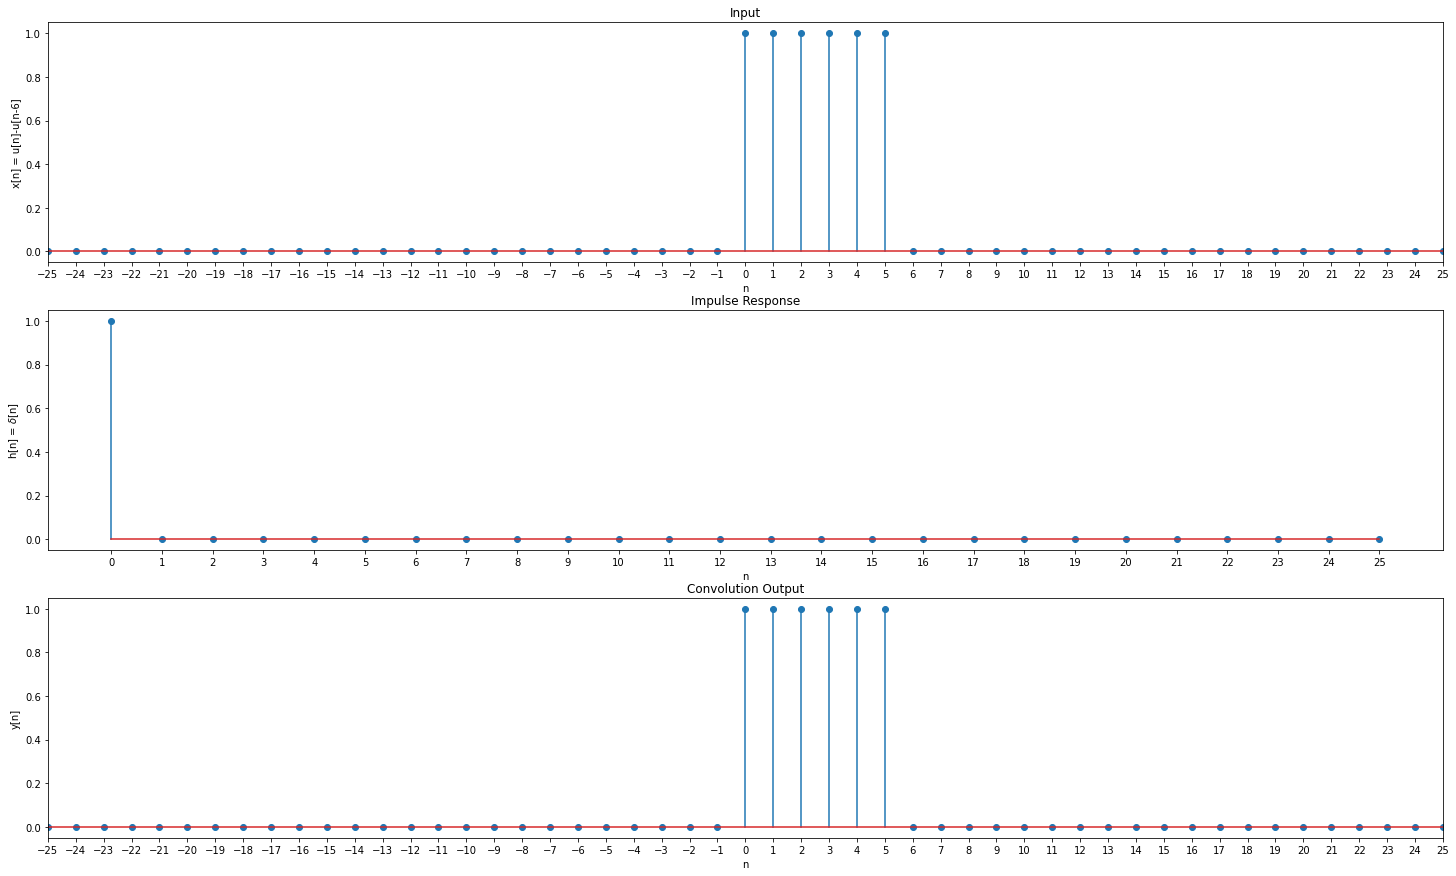




xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Ideal Delay System:-



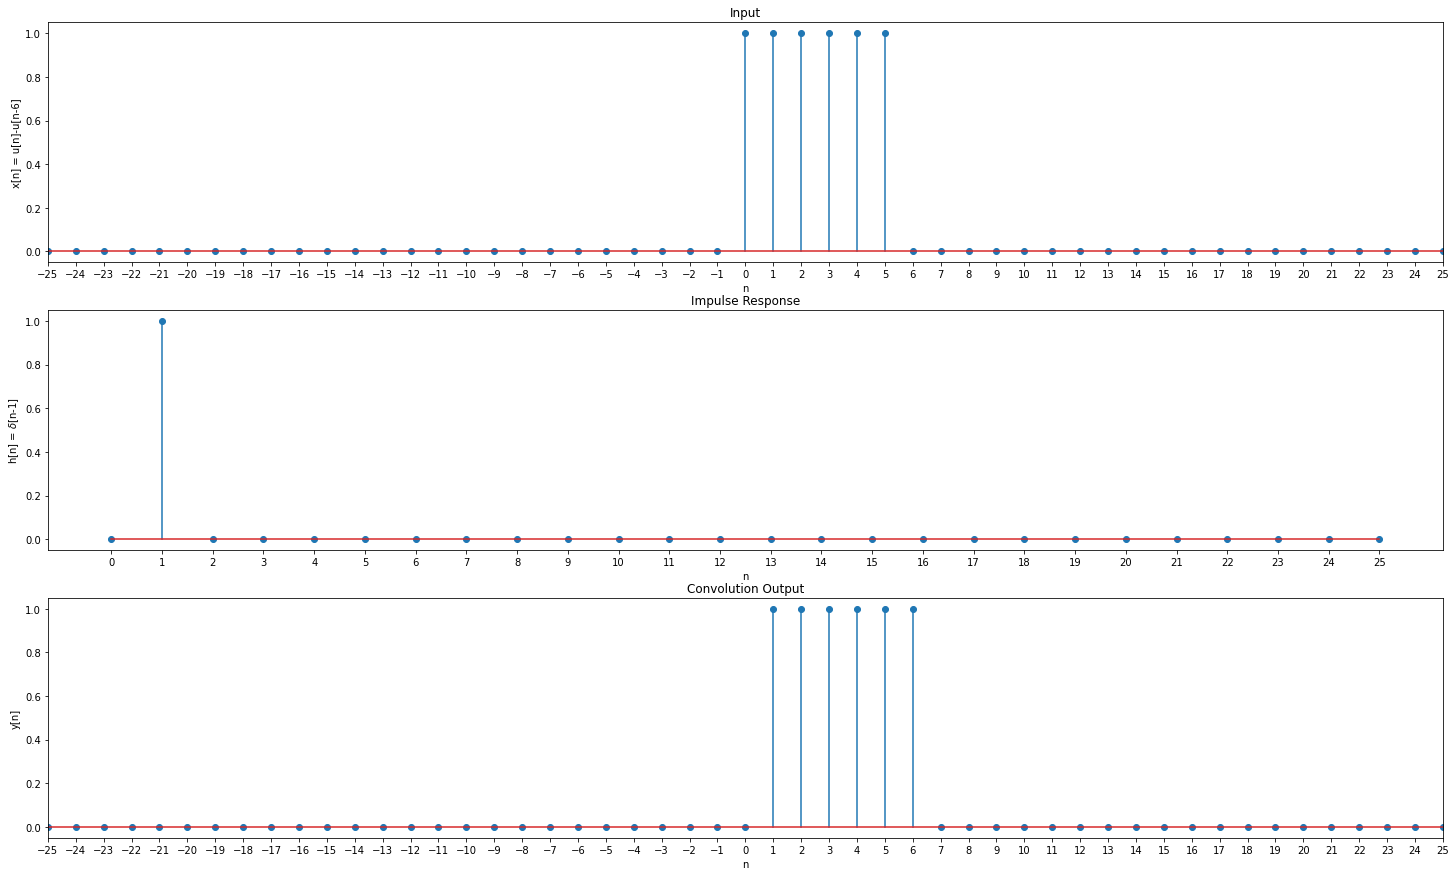




xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Moving Average System:-



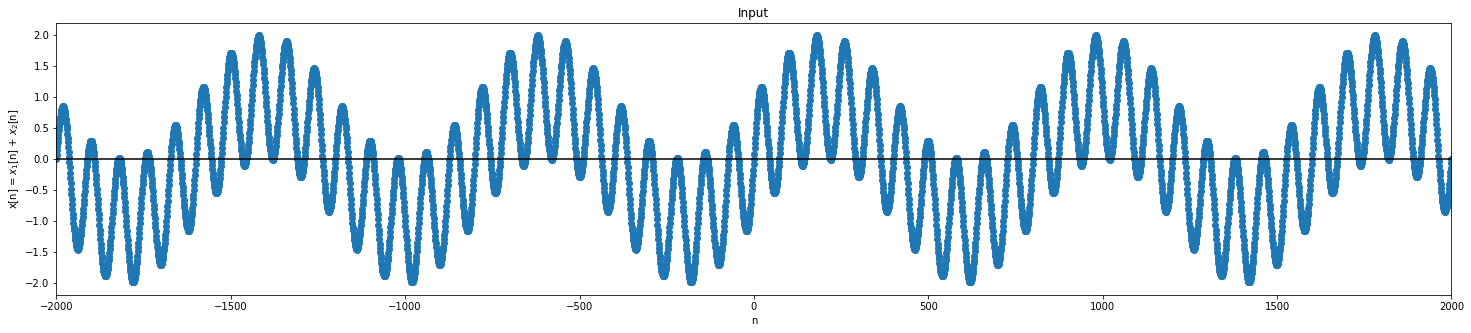

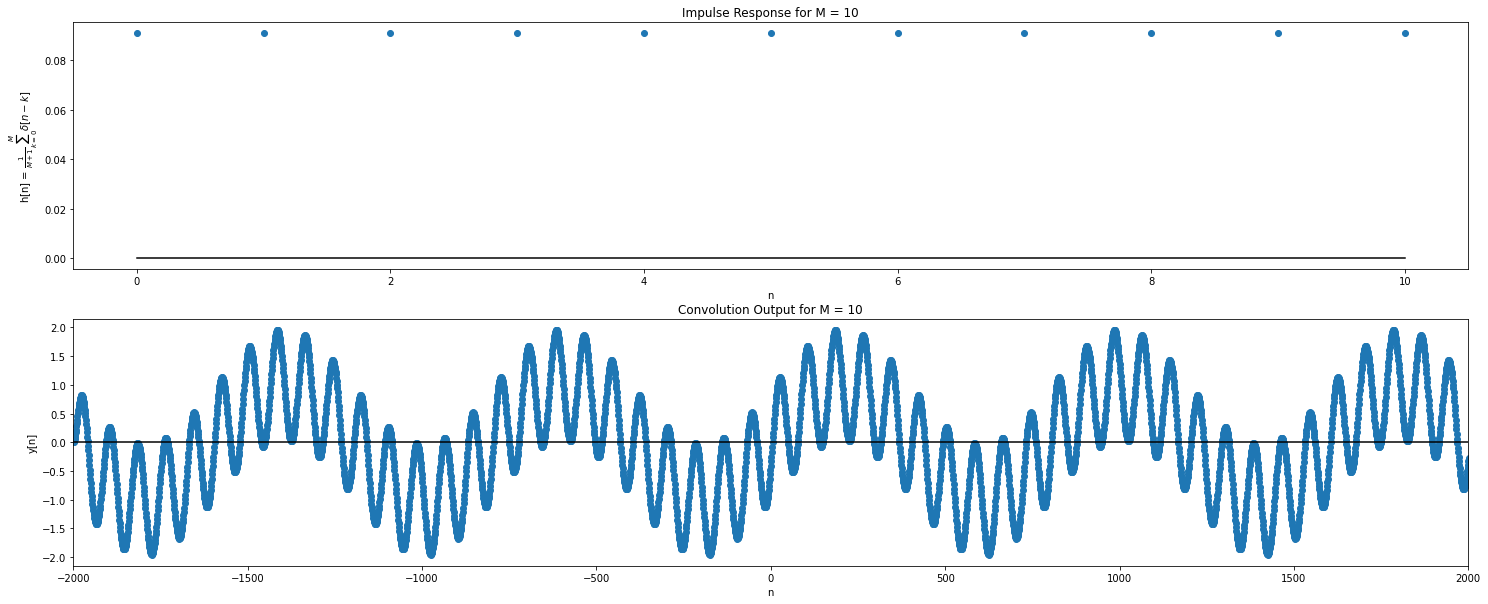

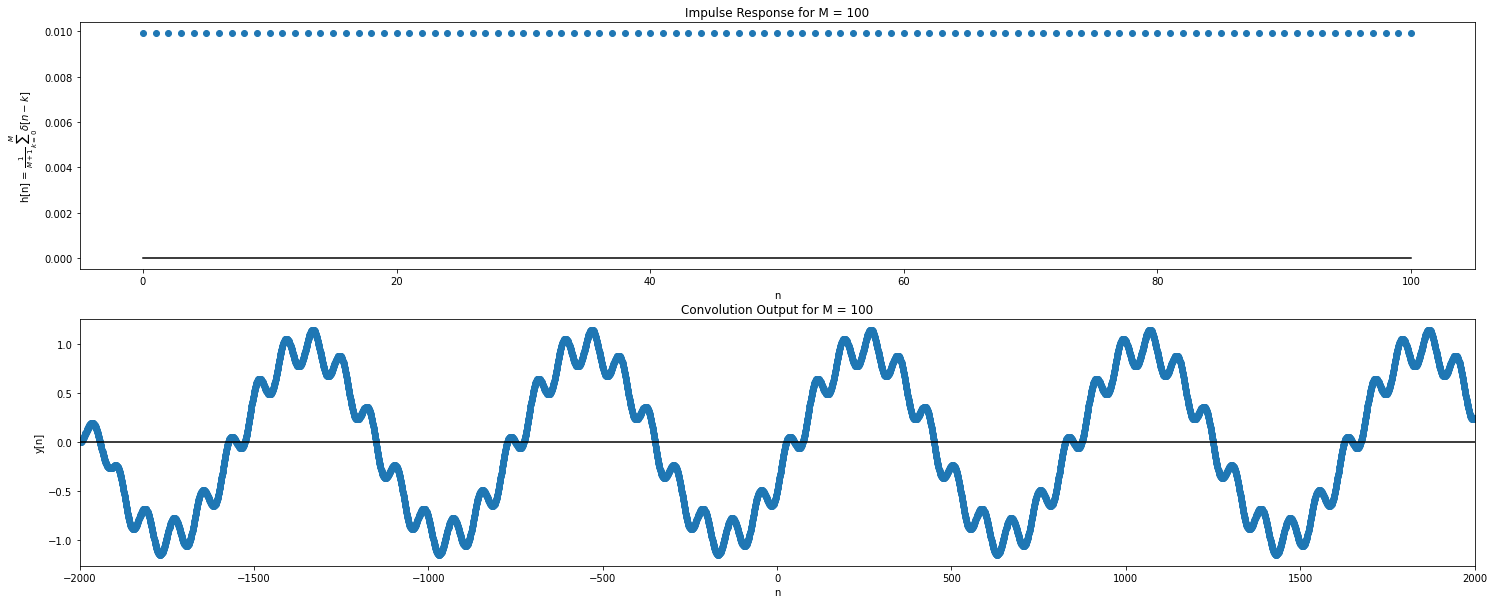

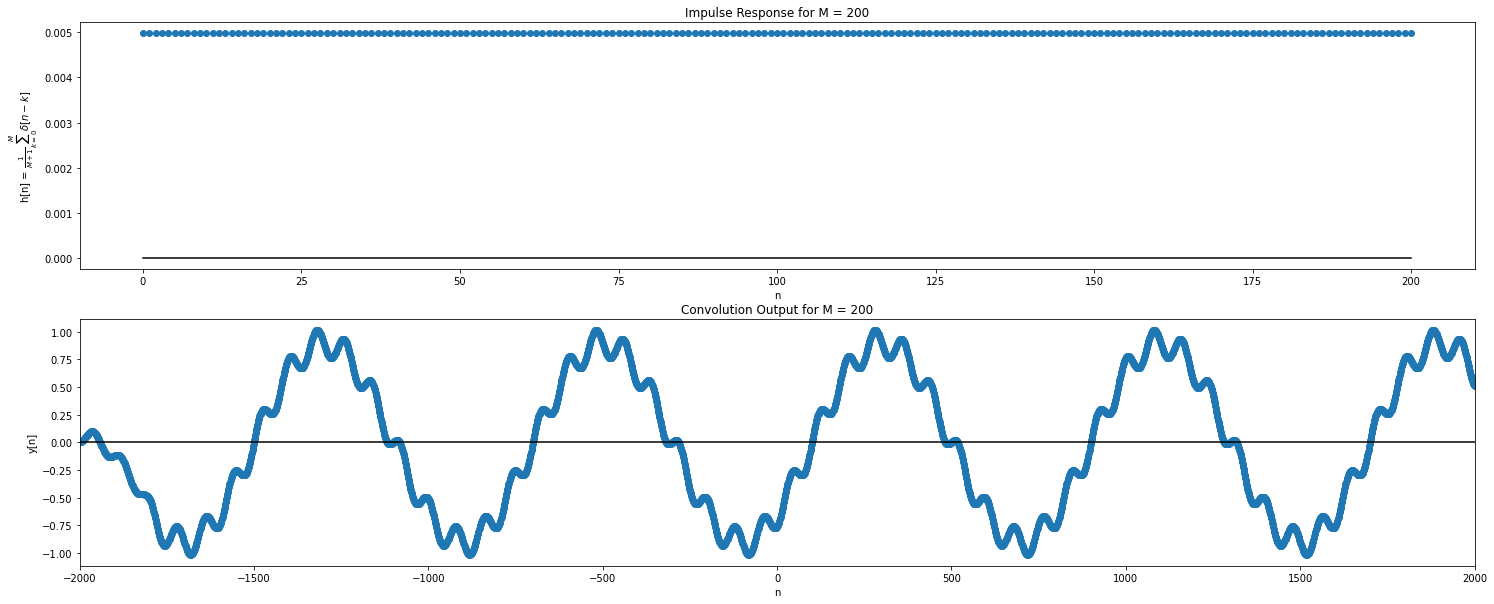

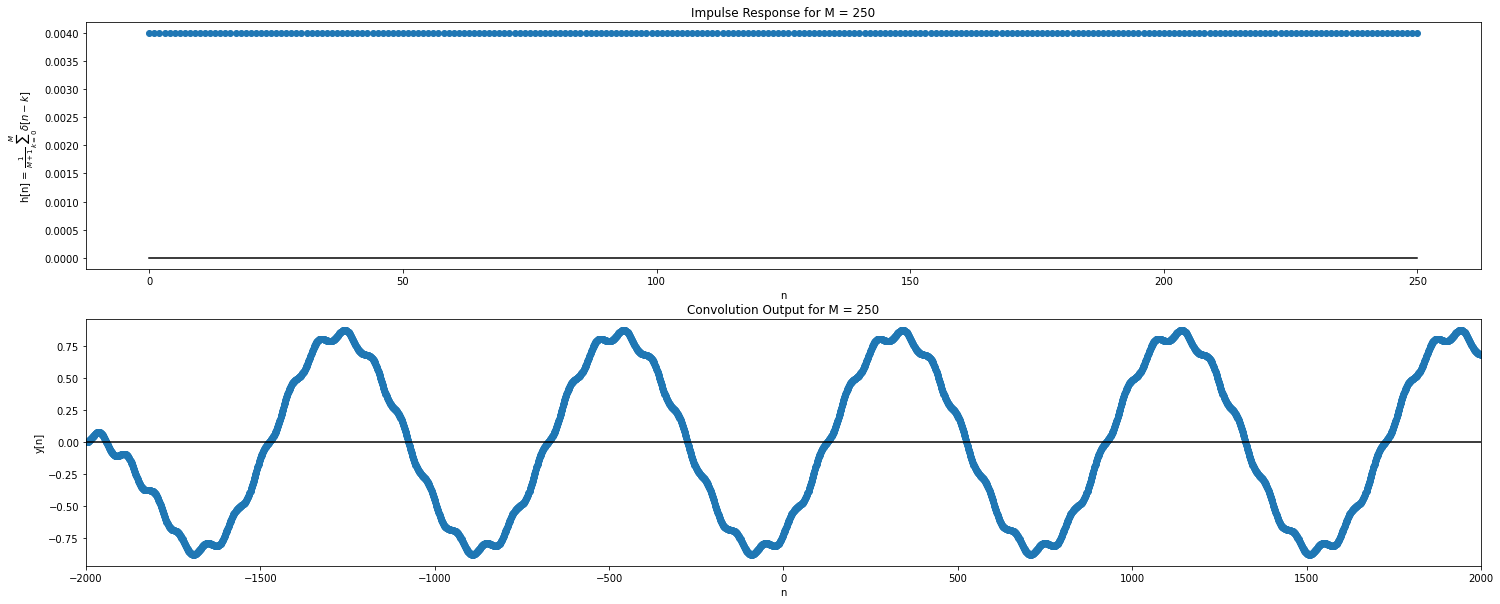

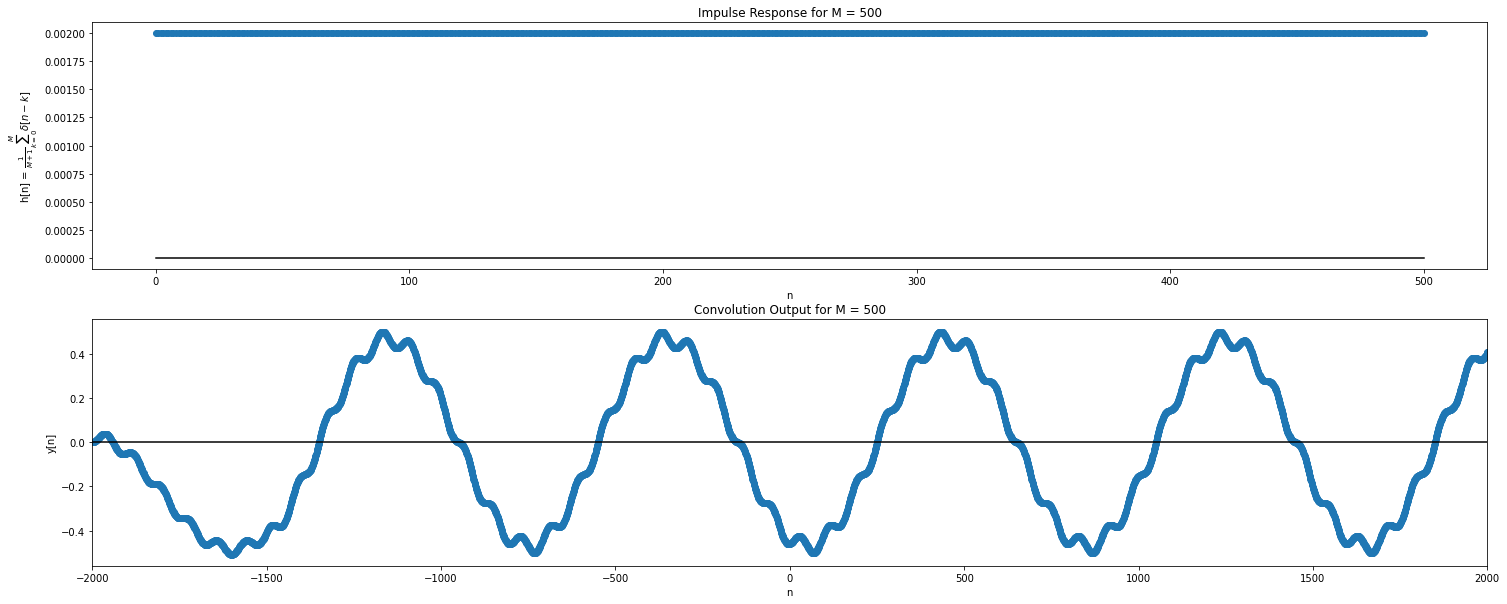

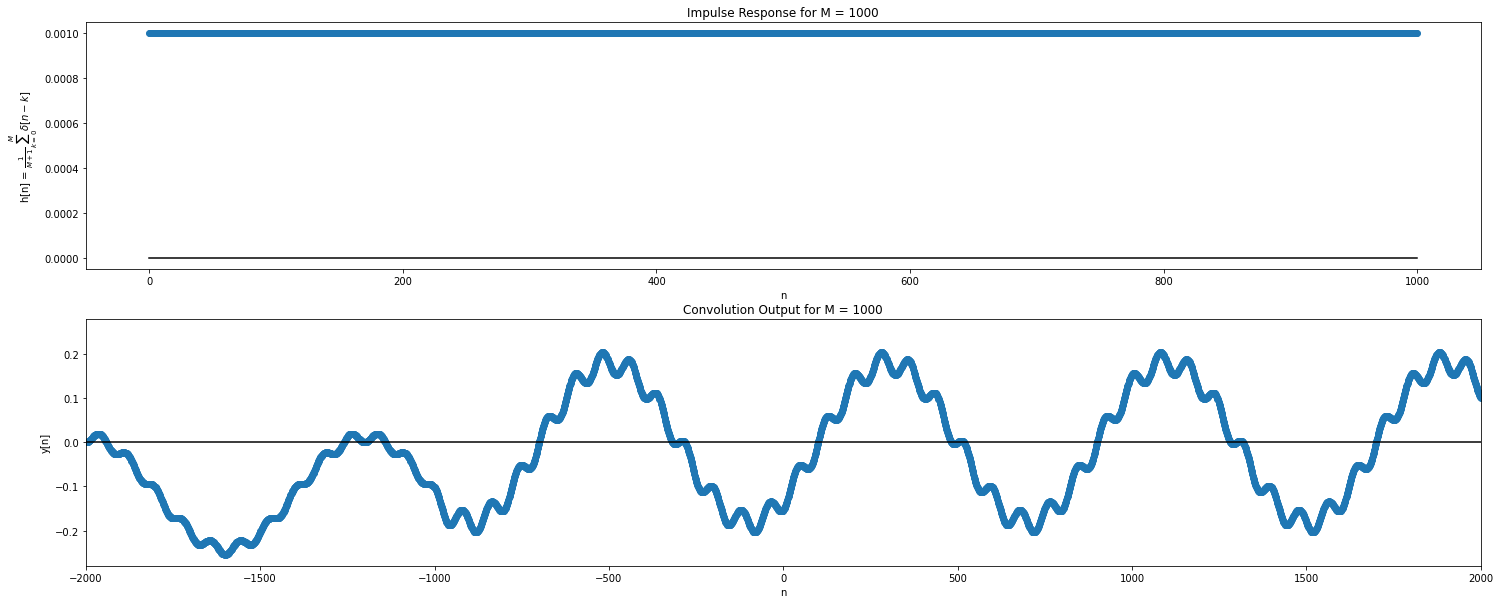

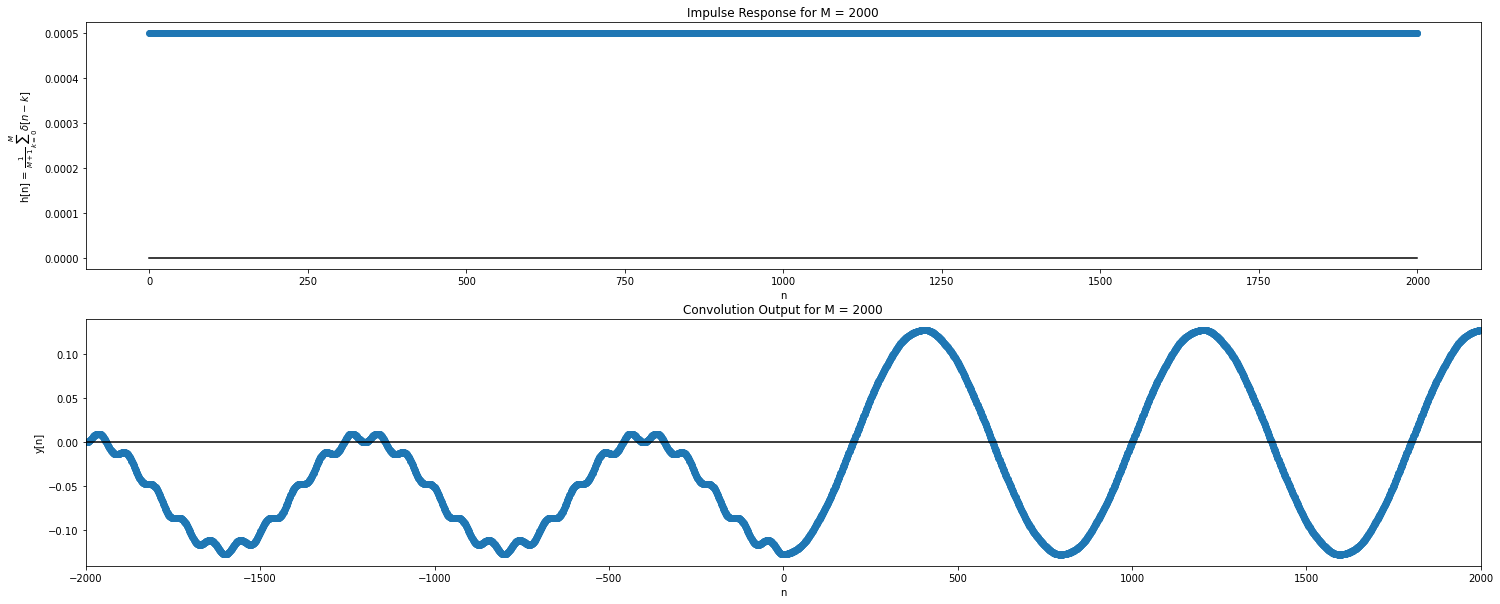




xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Backward Difference System:-



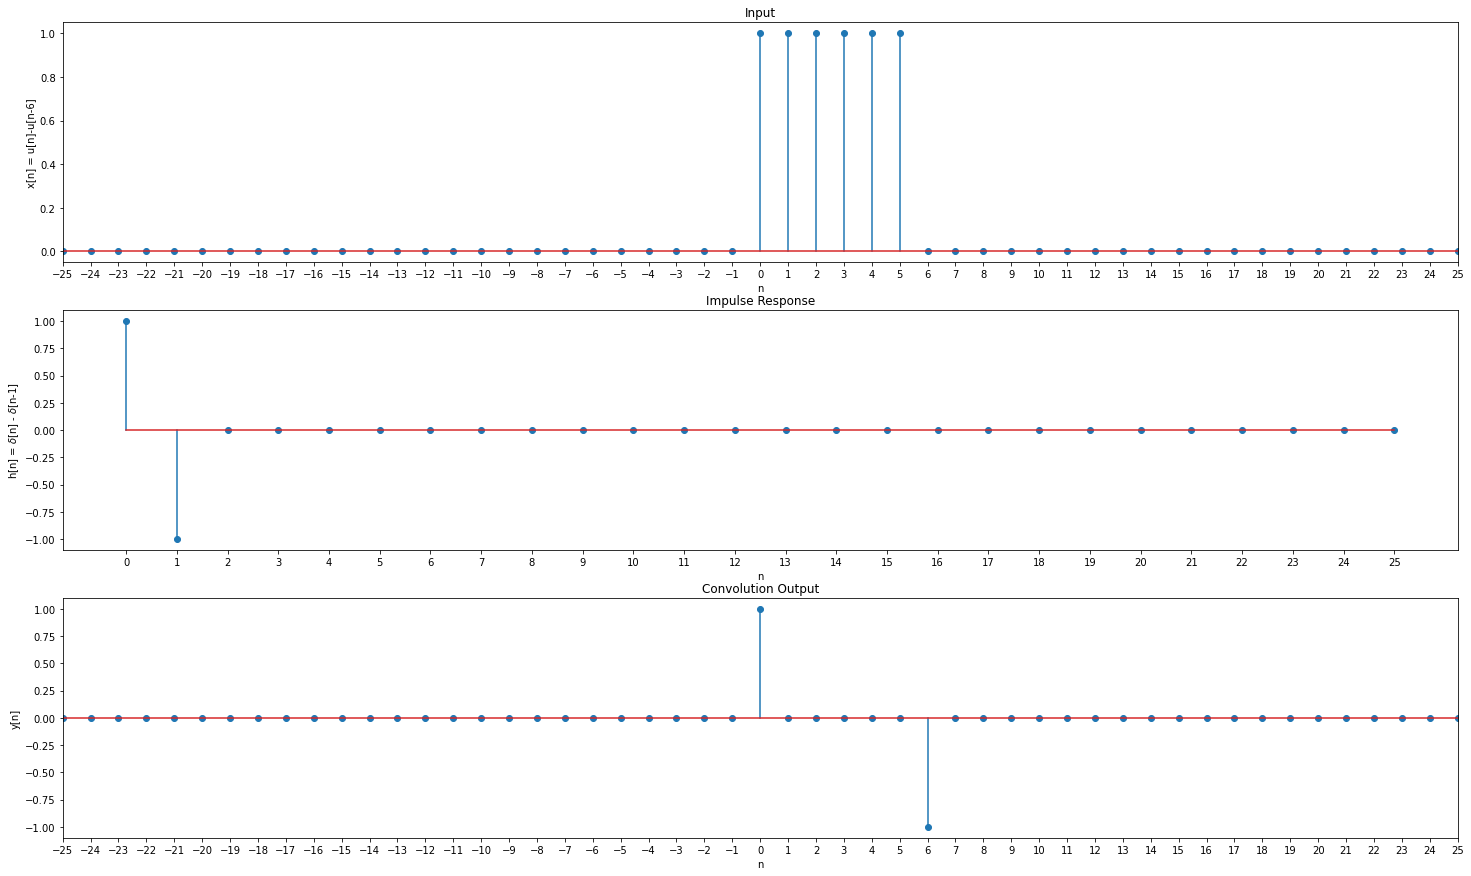

In [ ]:
######################################
#Write a function to compute the convolution sum of two sequences
######################################
def convol(x,nx,h,nh):
  ny = range(nx[0]+nh[0],nx[len(x)-1]+nh[len(h)-1]+1)

  if len(x)<len(h):
    x,h=h,x
  
  X,H = len(x),len(h)

  y=np.zeros(X+H-1)
  hfold = h[::-1]
  x=np.pad(x,pad_width=H-1)

  for i in range(0,X+H-1,1):
    sum = 0
    sum = np.sum(np.multiply(hfold,x[i:i+H]))
    
    y[i] = sum
  
  return y,np.array(ny)

######################################
#Ideal distortionless system
######################################
lim = 25

def inputx6(lim):
  n = range(-lim,lim+1)
  x=[]
  for i in range(len(n)):
    if (n[i]>=0 and n[i]<6):
      x.append(1)
    else:
      x.append(0)

  return np.array(x),np.array(n)

def delta(lim,p):
  n = range(0,lim+1)
  x=[]
  for i in range(len(n)):
    if (n[i]==p):
      x.append(1)
    else:
      x.append(0)

  return np.array(x),np.array(n)

x,nx = inputx6(lim)
h,nh = delta(lim,0)
y,ny = convol(x,nx,h,nh)


print("\n"+("x"*200)+"\n")
print("Ideal Distortionless System:-\n")
plt.figure(figsize=(25,15))
plt.subplot(3,1,1)
plt.stem(nx,x)
plt.xlabel("n")
plt.ylabel("x[n] = u[n]-u[n-6]")
plt.title("Input")
plt.xticks(nx)
plt.xlim([-lim,lim])
plt.subplot(3,1,2)
plt.stem(nh,h)
plt.xlabel("n")
plt.ylabel("h[n] = $\delta$[n]")
plt.title("Impulse Response")
plt.xticks(nh)
plt.subplot(3,1,3)
plt.stem(ny,y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Convolution Output")
plt.xticks(ny)
plt.xlim([-lim,lim])
plt.show()
print('\n')

######################################
#Ideal delay system
######################################
x,nx = inputx6(lim)
h,nh = delta(lim,1)
y,ny = convol(x,nx,h,nh)

print("\n"+("x"*200)+"\n")
print("Ideal Delay System:-\n")
plt.figure(figsize=(25,15))
plt.subplot(3,1,1)
plt.stem(nx,x)
plt.xlabel("n")
plt.ylabel("x[n] = u[n]-u[n-6]")
plt.title("Input")
plt.xticks(nx)
plt.xlim([-lim,lim])
plt.subplot(3,1,2)
plt.stem(nh,h)
plt.xlabel("n")
plt.ylabel("h[n] = $\delta$[n-1]")
plt.title("Impulse Response")
plt.xticks(nh)
plt.subplot(3,1,3)
plt.stem(ny,y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Convolution Output")
plt.xticks(ny)
plt.xlim([-lim,lim])
plt.show()
print('\n')

######################################
#Moving average system
######################################
lim=2000

def inputcx1(lim):
  n = range(-lim,lim+1)
  x=[]
  for i in range(len(n)):
      x.append(np.sin(2*np.pi*10/8000*n[i]))

  return np.array(x),np.array(n)

def inputcx2(lim):
  n = range(-lim,lim+1)
  x=[]
  for i in range(len(n)):
      x.append(np.sin(2*np.pi*100/8000*n[i]))

  return np.array(x),np.array(n)

cx1,n1 = inputcx1(lim)
cx2,n2 = inputcx2(lim)
x,nx = cx1+cx2,n1

print("\n"+("x"*200)+"\n")
print("Moving Average System:-\n")
plt.figure(figsize=(25,5))
markerline, stemlines, baseline = plt.stem(nx,x)
plt.setp(stemlines,linewidth=0)
baseline.set_color("k")
plt.xlabel("n")
plt.ylabel("x[n] = $x_1$[n] + $x_2$[n]")
plt.title("Input")
plt.xlim([-lim,lim])
plt.show()

print('\n')

for M in [10,100,200,250,500,1000,2000]:
  h = np.zeros(M+1)
  
  for k in range(0,M+1):
    temp,nh = delta(M,k)
    h = h + temp
  
  h = 1/(M+1)*h

  y,ny = convol(x,nx,h,nh)

  plt.figure(figsize=(25,10))
  plt.subplot(2,1,1)
  markerline, stemlines, baseline = plt.stem(nh,h)
  plt.setp(stemlines,linewidth=0)
  baseline.set_color("k")
  plt.xlabel("n")
  plt.ylabel(r"h[n] = $\frac{1}{M+1} \sum_{k=0}^M \delta[n-k]$")
  plt.title(f"Impulse Response for M = {M}")
  plt.subplot(2,1,2)
  markerline, stemlines, baseline = plt.stem(ny,y)
  plt.setp(stemlines,linewidth=0)
  baseline.set_color("k")
  plt.xlabel("n")
  plt.ylabel("y[n]")
  plt.title(f"Convolution Output for M = {M}")
  plt.xlim([-lim,lim])
  plt.show()
  print('\n')

######################################
#Backward difference system
######################################
lim=25

x,nx = inputx6(lim)
temp,nh = delta(lim,0)
temp1,nh = delta(lim,1)
h = temp-temp1
y,ny = convol(x,nx,h,nh)

print("\n"+("x"*200)+"\n")
print("Backward Difference System:-\n")
plt.figure(figsize=(25,15))
plt.subplot(3,1,1)
plt.stem(nx,x)
plt.xlabel("n")
plt.ylabel("x[n] = u[n]-u[n-6]")
plt.title("Input")
plt.xticks(nx)
plt.xlim([-lim,lim])
plt.subplot(3,1,2)
plt.stem(nh,h)
plt.xlabel("n")
plt.ylabel("h[n] = $\delta$[n] - $\delta$[n-1]")
plt.title("Impulse Response")
plt.xticks(nh)
plt.subplot(3,1,3)
plt.stem(ny,y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Convolution Output")
plt.xticks(ny)
plt.xlim([-lim,lim])
plt.show()
print('\n')

<h4> <b> Report your observations : </b>  

<dt> <h4> i. On convolving x[n] with $\delta[n]$, we observe that the output is x[n] itself which is like an ideal distortionless system.

When we convolve x[n] with $\delta[n-1]$, we observe that the output is x[n-1] which is like an ideal delay system with delay = 1.</h4> </dt>
<dt> <h4> ii. On convolving with the moving average system, we see that there is some behaviour of low-pass filtering and signal-smoothening. When we give an input as a sum of 2 sin waves with high and low frequencies, we see different levels of filtering depending on the window size, M.

When M=10, there is no filtering seen but as we increase M to 100,200,250 we see that the filtering gets better with larger M. Again at M = 500 and 1000, the filtering is lesser than M = 250. But at M = 2000, the LPF works perfectly and our output is a clean, smooth sine wave with the lower frequency and the higher frequency sine wave component is completely eliminated.</h4> </dt>


<dt> <h4> iii. On convolving with the back difference system, the output is x[n]-x[n-1], which gives the change points in the input signal as output.</h4> </dt>


<dt> <h4> iv. Again in the moving average system, wee see that the output convolution signal is distorted from -2000 to M, this is again because our input signal is constrained to a finite range instead of the actual infinite range.</h4> </dt>



#Question 4

<h4> <b> Part (4) : Processing natural signals through LTI systems : </b> 

<dt> <h4> In part(2) of the programming assignment, you have learned the concept of the convolution sum and verified it using a few discrete time systems operating on synthetic signals. In the current part, you need to extend the usage of the convolution sum to real-world examples i.e audio/speech signals or digital images. In this part, you are free to use the inbuilt convolution function (np.convolve()) to complete the tasks. You can refer to the previous programming assignment to get assistance in accessing audio, speech, and digital images. </h4> </dt> 



<h4> <b> Programming Questions : </b>  



<dt> <h4> b. Processing audio/speech signals using basic LTI systems    </h4> </dt> 

<dd> <h4> i. Load the audio/speech signal using the sound file module
 </h4> </dd> 
<dd> <h4> ii. Consider the audio/speech signal as the inputs of the following LTI system and compute the output using convolution sum </h4> </dd> 

<dt> <h4> <center> $\hspace{1cm}$ $h[n] = \frac{1}{M+1} \sum\limits_{k=0}^{M} \delta[n-k] $ </center> </dt> </h4>


<dd> <h4> iii. Listen to the output sequences of the LTI systems and report your observations. Clearly mention the impact of the moving average window size in your observations.  </h4> </dd> 

<dd> <h4> iv. Repeat the above experiments with the following impulse responce (i.e backward difference system ) </h4> </dd> 

<dt> <h4> <center> $\hspace{1cm}$ $h[n] = \delta[n] - \delta[n-1] $ </center> </dt> </h4>



<dt> <h4> a. Processing digital images using basic LTI systems    </h4> </dt> 

<dd> <h4> i. Load the digital images (Gray) into NumPy array using the image processing library (matplotlib.image, Pillow or OpenCV)  </h4> </dd> 

<dd> <h4> ii. Convolve the image with the given impulse response both horizontally and vertically. Plot the outputs of LTI systems in both the cases and report your observations. 
 </h4> </dd> 

 <dt> <h4> <center> $\hspace{1cm}$ $h[n] = \delta[n] - \delta[n-1] $ </center> </dt> </h4>

 <dd> <h4> iii. Let us consider two LTI systems. Pass the image to the first LTI system that convolves the input with the impulse response along the width and produces $y_{1}[n]$. Now consider $y_{1}[n]$ as input to the second LTI system that convolves the input with the impulse response along height and produces $y_{2}[n]$. Plot $y_{2}[n]$ and report your observations. Mention the impact of the moving average window size in your observations. </h4> </dd> 

 <dt> <h4> <center> $\hspace{1cm}$ $h[n] = \frac{1}{M+1} \sum\limits_{k=0}^{M} \delta[n-k] $ </center> </dt> </h4>

 <dd> <h4> NOTE: Convolving the image with the impulse response along the width refers to aligning the impulse response horizontally ( i.e $h[n] \in \mathcal{R}^{1 x M}$) and sliding over the image. Similarly, vertical convolution refers to the convolution of the image with the vertically aligned impulse response (i.e $h[n] \in \mathcal{R}^{Mx1})$ </h4> </dd>  










In [ ]:
######################################
#(a)
######################################
drive.mount('/content/drive',force_remount=True)
audio, srate = sf.read('/content/drive/MyDrive/DSP/PA02/music.wav')
print("Original Audio")
display(Audio("/content/drive/MyDrive/DSP/PA02/music.wav"))

def delta(lim,p):
  n = range(0,lim+1)
  x=[]
  for i in range(len(n)):
    if (n[i]==p):
      x.append(1)
    else:
      x.append(0)
  return np.array(x),np.array(n)

def mov_avg_delta(M):
  h = np.zeros(M+1)
  for k in range(0,M+1):
    temp,nh = delta(M,k)
    h = h + temp
  h = 1/(M+1)*h
  return h

for M in [1,10,50,100,250,500,1000]:
  h = mov_avg_delta(M)
  new_audio = np.convolve(audio,h)
  sf.write('new_audio.wav', new_audio, srate)
  print(f"Audio Signal in Moving Average System with M = {M}")
  display(Audio('new_audio.wav'))

print("\n"+("- "*50)+"\n")
################################################################
print("Original Audio")
display(Audio("/content/drive/MyDrive/DSP/PA02/music.wav"))

temp,nh = delta(1,0)
temp1,nh = delta(1,1)
h = temp-temp1

new_audio = np.convolve(audio,h)
sf.write('new_audio.wav', new_audio, srate)
print("Audio Signal in Back Difference System")
display(Audio('new_audio.wav'))

print("\n"+("x"*200)+"\n")

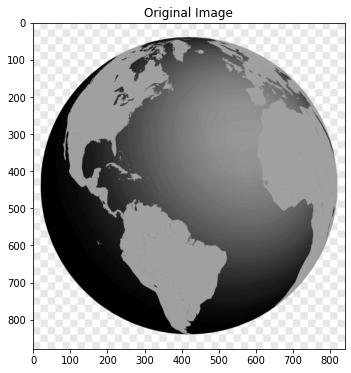

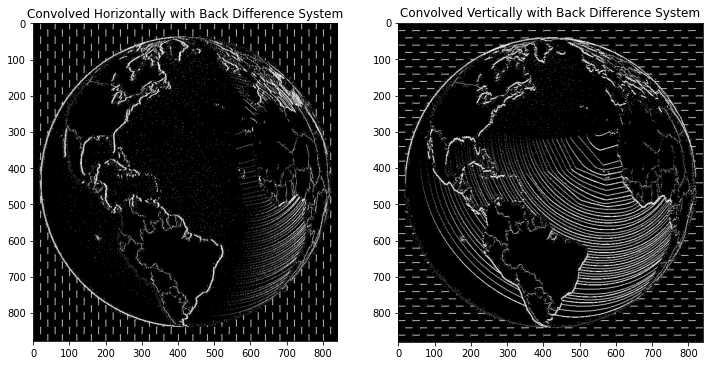



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

iii



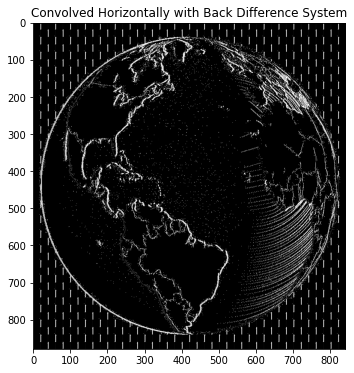

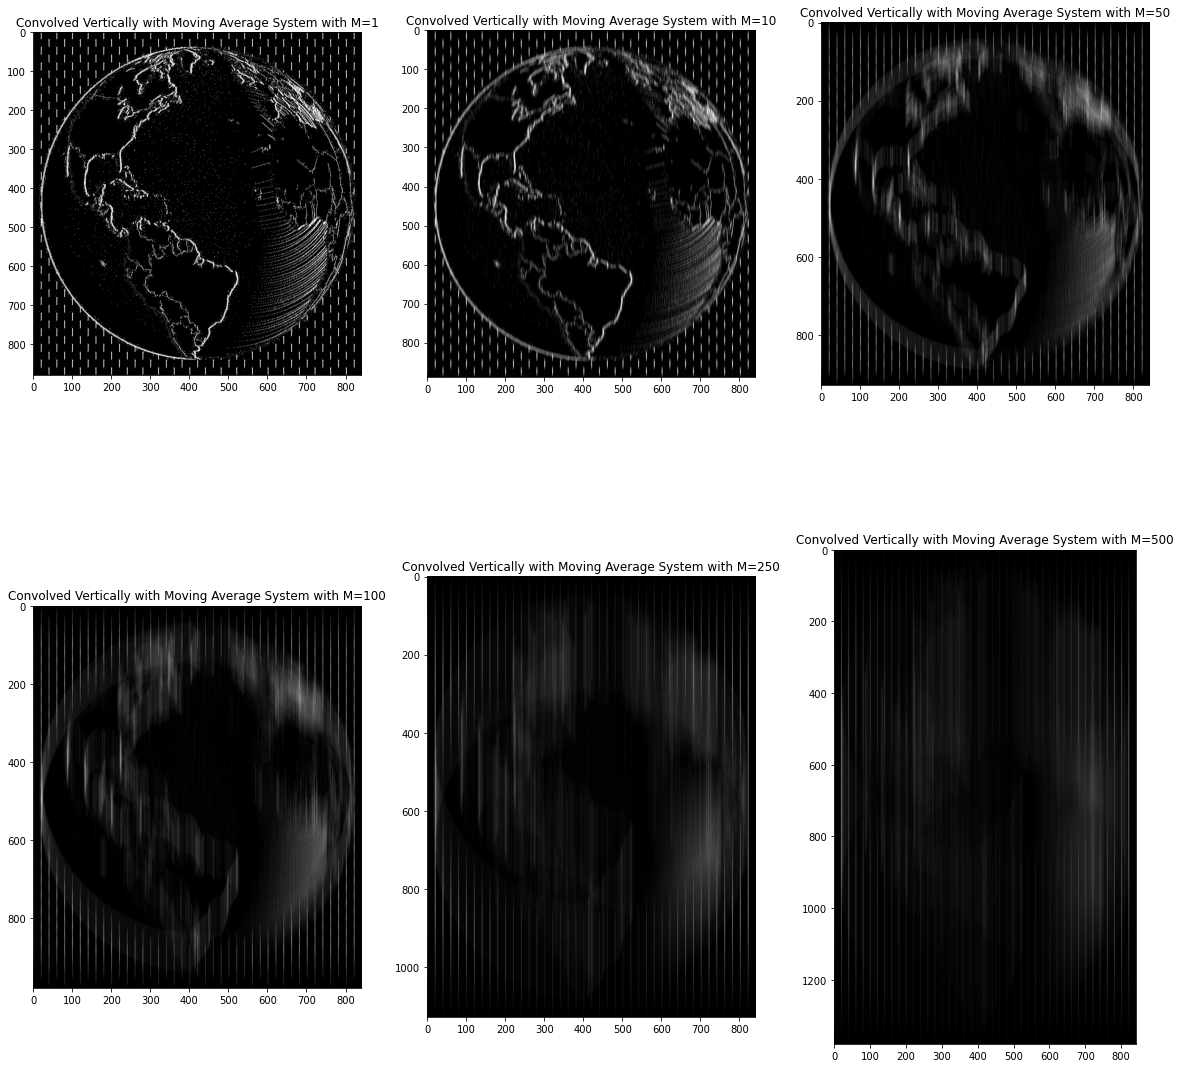

In [ ]:
######################################
#(b)
######################################
img = mpimg.imread("/content/drive/MyDrive/DSP/PA02/globe.jpg")
plt.figure(figsize=(6,6))
plt.imshow(img[:,:,0],cmap="gray")
plt.title("Original Image")
plt.show()
print('\n')

mat = img[:,:,0]
l = mat.shape[0]
b = mat[0].shape[0]

#Back-Difference System
temp,nh = delta(1,0)
temp1,nh = delta(1,1)
h = temp-temp1

mat1 = np.zeros((l,b+1),dtype = 'uint8')
for i in range(0,l):
  mat1[i] = np.convolve(mat[i],h)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(mat1,cmap="gray")
plt.title("Convolved Horizontally with Back Difference System")

mat = mat.T
mat2 = np.zeros((b,l+1),dtype = 'uint8')
for i in range(0,b):
  mat2[i] = np.convolve(mat[i],h)

mat2 = mat2.T
plt.subplot(1,2,2)
plt.imshow(mat2,cmap="gray")
plt.title("Convolved Vertically with Back Difference System")
plt.show()
print('\n')

print("-"*200,'\n')
print("iii\n")

plt.figure(figsize=(6,6))
plt.imshow(mat1,cmap="gray")
plt.title("Convolved Horizontally with Back Difference System")
plt.show()

plt.figure(figsize=(20,20))
p=1
mat1 = mat1.T
for M in [1,10,50,100,250,500]:
  mat3 = np.zeros((mat1.shape[0],mat1[0].shape[0]+M),dtype = 'uint8')
  h = mov_avg_delta(M)
  for i in range(0,mat1.shape[0]):
    mat3[i] = np.convolve(mat1[i],h)

  mat3 = mat3.T
  plt.subplot(2,3,p)
  p=p+1
  plt.imshow(mat3,cmap="gray")
  plt.title(f"Convolved Vertically with Moving Average System with M={M}")
plt.show()

<h4> <b> Report your observations : </b>  

<dt> <h4> i. When convolving the audio with the moving average system, the volume/amplitude of the signal falls as M increases. The output at smaller M is a smoother audio. It can be used for noise cancellation as heard in the speech signal.</h4> </dt>
<dt> <h4> ii. When convolving the audio with the back difference system, we observe that the echo is reduced or the bass is low. We can hear the overshoots in the signal slighlty louder but there is no significant change.</h4> </dt>
<dt> <h4> iii. On convolving the image with the back-difference system, we observe that we get the line-sketch of the image in some sense. When we do horizontal and vertical convolutions with back-difference system, we see that the features in the horizontal and vertical axes are more clearly seen respectively.

On convolcing with the moving-average sytem, we see that the image gets blurred in the direction in which we convolve. As M inceases, we can barely make out the image.</h4> </dt>

